In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/ibm_hr_dataset_com_features.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 65 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Age                            1000000 non-null  int64  
 1   Attrition                      1000000 non-null  object 
 2   BusinessTravel                 1000000 non-null  object 
 3   DailyRate                      1000000 non-null  int64  
 4   Department                     1000000 non-null  object 
 5   DistanceFromHome               1000000 non-null  int64  
 6   Education                      1000000 non-null  int64  
 7   EducationField                 1000000 non-null  object 
 8   EmployeeCount                  1000000 non-null  int64  
 9   EmployeeNumber                 1000000 non-null  int64  
 10  EnvironmentSatisfaction        1000000 non-null  int64  
 11  Gender                         1000000 non-null  object 
 12  HourlyRate     

# Preparando dados modelagem

In [18]:
cols_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df_processed = df.drop(columns=cols_to_drop)
df_processed = df_processed.sample(n=50_000, random_state=42)
label_encoder = LabelEncoder()
df_processed['Attrition'] = label_encoder.fit_transform(df_processed['Attrition'])
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 987231 to 120934
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            50000 non-null  int64  
 1   Attrition                      50000 non-null  int64  
 2   BusinessTravel                 50000 non-null  object 
 3   DailyRate                      50000 non-null  int64  
 4   Department                     50000 non-null  object 
 5   DistanceFromHome               50000 non-null  int64  
 6   Education                      50000 non-null  int64  
 7   EducationField                 50000 non-null  object 
 8   EnvironmentSatisfaction        50000 non-null  int64  
 9   Gender                         50000 non-null  object 
 10  HourlyRate                     50000 non-null  int64  
 11  JobInvolvement                 50000 non-null  int64  
 12  JobLevel                       50000 non-null

In [19]:
df_processed

Age  Attrition     BusinessTravel  DailyRate              Department  \
987231   22          0         Non-Travel       1336                   Sales   
79954    40          1  Travel_Frequently        990                   Sales   
567130   28          1      Travel_Rarely       1164                   Sales   
500891   37          0      Travel_Rarely        509  Research & Development   
55399    18          0      Travel_Rarely        981         Human Resources   
...     ...        ...                ...        ...                     ...   
662925   30          0      Travel_Rarely       1333  Research & Development   
649864   51          1  Travel_Frequently        927                   Sales   
331385   37          0  Travel_Frequently        483  Research & Development   
699967   31          0      Travel_Rarely       1474                   Sales   
120934   43          0      Travel_Rarely        460  Research & Development   

        DistanceFromHome  Education   EducationField  EnvironmentSatisfaction  \
987231                27          4  Human Resources                        4   
79954                 18          3        Marketing                        4   
567130                 3          2        Marketing                        3   
500891                 1          3  Human Resources                        4   
55399                 13          4    Life Sciences                        3   
...                  ...        ...              ...                      ...   
662925                 4          4            Other                        2   
649864                 6          3        Marketing                        3   
331385                 5          2        Marketing                        4   
699967                 9          4          Medical                        4   
120934                 1          3            Other                        1   

        Gender  ...  SalarioPorSatisf  PromotionsPerYear  CompaniesPerYear  \
987231    Male  ...       2713.000000           0.250000          0.200000   
79954     Male  ...       2843.727273           0.125000          0.142857   
567130    Male  ...       3104.333333           0.142857          0.090909   
500891    Male  ...       4250.250000           0.166667          0.058824   
55399     Male  ...       3070.285714           1.000000          0.000000   
...        ...  ...               ...                ...               ...   
662925  Female  ...       4623.000000           0.500000          0.384615   
649864    Male  ...       4193.000000           0.166667          0.290323   
331385    Male  ...       2766.900000           0.250000          0.000000   
699967    Male  ...       3010.363636           0.500000          0.000000   
120934  Female  ...       5715.000000           0.125000          0.363636   

       YearsInRolePercCompany  SatisfacaoGeral SatisfacaoPeloNivel  \
987231               0.750000             2.50            0.833333   
79954                0.190476             3.25            1.083333   
567130               0.454545             2.75            1.375000   
500891               0.777778             2.75            0.916667   
55399                0.000000             2.50            1.250000   
...                       ...              ...                 ...   
662925               0.750000             3.00            1.000000   
649864               0.875000             3.00            1.000000   
331385               0.250000             3.00            1.500000   
699967               0.727273             3.75            1.250000   
120934               0.400000             2.50            0.833333   

        EstavelNaEmpresa  TempoComGestorProporcao  SalarioPorSatisfacaoGeral  \
987231                 0                 0.750000                2325.428571   
79954                  0                 0.000000                2453.411765   
567130                 1                 0.181818       

In [20]:
numeric_features = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_processed.select_dtypes(include=['object']).columns.tolist()
numeric_features.remove('Attrition')
print(f"Features numéricas: {numeric_features}")
print(f"Features categóricas: {categorical_features}")
print(f"Target: {df_processed['Attrition'].value_counts(normalize=True)}")

Features numéricas: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'IncomePerYear', 'TotalSatisfaction', 'PromotionRate', 'LongTimeNoPromotion', 'AgeStartedWorking', 'YearsInOtherCompanies', 'CompanyChangeRate', 'AnosCargoSemPromocao', 'CargoAlto_HorasExtras', 'ScoreEstab_Carreira', 'ScoreEstabilidadeFormat', 'Burnout', 'PercAnoEmpresaAtual', 'SalarioPorTempodeCasa', 'TreinamentosPorTempodeCasa', 'TempoCargoAtualPeloNivel', 'TempSemPromoPorTempComManager', 'TempGestAtualPorTempodeCasa', 'SalarioPorKm', 'SalarioPorNivelEdu', 'SalarioPorSatisf', 'PromotionsPerYear', 'CompaniesPerYear', 'YearsInRole

## Encoding variaveris categoricas
    Nada mais que é que pivotar ou algo semelhantes
[Fonte](https://www.alura.com.br/artigos/get-dummies-vs-onehotencoder-qual-metodo-escolher?srsltid=AfmBOooISDT9teazV3qXdrefLnP1CgVy_TucfgQCg913rquY2FxTeyXF)

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    categorical_features),
    remainder='passthrough')
dados = one_hot_enc.fit_transform(df_processed)
df_encoded = pd.DataFrame(dados, columns=one_hot_enc.get_feature_names_out())

df_encoded.columns = df_encoded.columns.str.replace('onehotencoder__', '', regex=False)
df_encoded.columns = df_encoded.columns.str.replace('remainder__', '', regex=False)
df_encoded.columns = df_encoded.columns.str.strip('_')

df_encoded

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                            1.0                               0.0   
1                            0.0                               1.0   
2                            0.0                               0.0   
3                            0.0                               0.0   
4                            0.0                               0.0   
...                          ...                               ...   
49995                        0.0                               0.0   
49996                        0.0                               1.0   
49997                        0.0                               1.0   
49998                        0.0                               0.0   
49999                        0.0                               0.0   

       BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                               0.0                         0.0   
1                               0.0                         0.0   
2                               1.0                         0.0   
3                               1.0                         0.0   
4                               1.0                         1.0   
...                             ...                         ...   
49995                           1.0                         0.0   
49996                           0.0                         0.0   
49997                           0.0                         0.0   
49998                           1.0                         0.0   
49999                           1.0                         0.0   

       Department_Research & Development  Department_Sales  \
0                                    0.0               1.0   
1                                    0.0               1.0   
2                                    0.0               1.0   
3                                    1.0               0.0   
4                                    0.0               0.0   
...                                  ...               ...   
49995                                1.0               0.0   
49996                                0.0               1.0   
49997                                1.0               0.0   
49998                                0.0               1.0   
49999                                1.0               0.0   

       EducationField_Human Resources  EducationField_Life Sciences  \
0                                 1.0                           0.0   
1                                 0.0                           0.0   
2                                 0.0                           0.0   
3                                 1.0                           0.0   
4                                 0.0                           1.0   
...                               ...                           ...   
49995                             0.0                           0.0   
49996                             0.0                           0.0   
49997                             0.0                           0.0   
49998                             0.0                           0.0   
49999                             0.0                           0.0   

       EducationField_Marketing  EducationField_Medical  ...  \
0                           0.0                     0.0  ...   
1                           1.0                     0.0  ...   
2                           1.0                     0.0  ...   
3                           0.0                     0.0  ...   
4                           0.0                     0.0  ...   
...                         ...                     ...  ...   
49995                       0.0                     0.0  ...   
49996                       1.0                     0.0  ...   
49997                       1.0                     0.0  ...   
49998                       0.0                     1.0  ...   
49999                       0.0                     0.0  ..

### usar o pickle 

In [ ]:
import pickle
with open('modelo_onehotenc.pkl', 'wb') as file:
    pickle.dump(one_hot_enc, file)

In [ ]:
import pickle
modelo_onehotenc = pd.read_pickle('modelo_onehotenc.pkl')
dados = modelo_onehotenc.transform(df_processed)
df_encoded = pd.DataFrame(dados, columns=modelo_onehotenc.get_feature_names_out())
df_encoded.columns = df_encoded.columns.str.replace('onehotencoder__', '', regex=False)
df_encoded.columns = df_encoded.columns.str.replace('remainder__', '', regex=False)
df_encoded.columns = df_encoded.columns.str.strip('_')

df_encoded

## Divisão de treino e teste

In [22]:
X = df_encoded.drop('Attrition', axis=1) #features
y = df_encoded['Attrition'] #target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) #usando o stratify para manter a proporção de classes no conjunto de teste devido ao desbalanceamento
print(f"\nTamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")
print(f"Total de features: {X_train.shape[1]}")
print(f"Proporção Attrition no treino: {y_train.mean():.2%}")
print(f"Proporção Attrition no teste: {y_test.mean():.2%}")


Tamanho do conjunto de treino: (40000, 79)
Tamanho do conjunto de teste: (10000, 79)
Total de features: 79
Proporção Attrition no treino: 17.64%
Proporção Attrition no teste: 17.64%


In [23]:
X_train

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
23849                        0.0                               1.0   
19742                        0.0                               0.0   
26353                        0.0                               0.0   
47920                        0.0                               0.0   
9976                         0.0                               0.0   
...                          ...                               ...   
32058                        0.0                               0.0   
11310                        0.0                               0.0   
33437                        0.0                               0.0   
45331                        1.0                               0.0   
43259                        0.0                               0.0   

       BusinessTravel_Travel_Rarely  Department_Human Resources  \
23849                           0.0                         0.0   
19742                           1.0                         1.0   
26353                           1.0                         0.0   
47920                           1.0                         0.0   
9976                            1.0                         0.0   
...                             ...                         ...   
32058                           1.0                         0.0   
11310                           1.0                         0.0   
33437                           1.0                         0.0   
45331                           0.0                         0.0   
43259                           1.0                         0.0   

       Department_Research & Development  Department_Sales  \
23849                                0.0               1.0   
19742                                0.0               0.0   
26353                                1.0               0.0   
47920                                0.0               1.0   
9976                                 1.0               0.0   
...                                  ...               ...   
32058                                1.0               0.0   
11310                                1.0               0.0   
33437                                0.0               1.0   
45331                                0.0               1.0   
43259                                1.0               0.0   

       EducationField_Human Resources  EducationField_Life Sciences  \
23849                             0.0                           0.0   
19742                             0.0                           0.0   
26353                             0.0                           0.0   
47920                             0.0                           0.0   
9976                              0.0                           1.0   
...                               ...                           ...   
32058                             1.0                           0.0   
11310                             1.0                           0.0   
33437                             0.0                           0.0   
45331                             0.0                           0.0   
43259                             0.0                           0.0   

       EducationField_Marketing  EducationField_Medical  ...  \
23849                       0.0                     0.0  ...   
19742                       1.0                     0.0  ...   
26353                       0.0                     0.0  ...   
47920                       0.0                     0.0  ...   
9976                        0.0                     0.0  ...   
...                         ...                     ...  ...   
32058                       0.0                     0.0  ...   
11310                       0.0                     0.0  ...   
33437                       1.0                     0.0  ...   
45331                       0.0                     0.0  ...   
43259                       0.0                     1.0  ..

### Oversampling

#### SMOTE
    Cria exemplos sintéticos da classe minoritária combinando exemplos reais.

In [24]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train,)
y_train.value_counts(), y_train_over.value_counts()

(Attrition
 0.0    32942
 1.0     7058
 Name: count, dtype: int64,
 Attrition
 0.0    32942
 1.0    32942
 Name: count, dtype: int64)

In [26]:
print(f"Proporção Attrition no treino Over SMOTE: {y_train_over.mean():.2%}")
print(f"Proporção Attrition no teste: {y_test.mean():.2%}")

Proporção Attrition no treino Over SMOTE: 50.00%
Proporção Attrition no teste: 17.64%


#### ADASYN
    Parecido com SMOTE, mas gera mais exemplos em áreas de difícil classificação.

In [15]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
y_train.value_counts(),
y_train_adasyn.value_counts()

Attrition
1.0    6760
0.0    6564
Name: count, dtype: int64

In [16]:
print(f"Proporção Attrition no treino Over ADASYN: {y_train_adasyn.mean():.2%}")
print(f"Proporção Attrition no teste: {y_test.mean():.2%}")

Proporção Attrition no treino Over ADASYN: 50.74%
Proporção Attrition no teste: 17.95%


### Undersampling

#### RandomUnderSampler
    Remove exemplos da classe majoritária.

In [17]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
print(y_train.value_counts(), y_train_under.value_counts())

Attrition
0.0    6564
1.0    1436
Name: count, dtype: int64 Attrition
0.0    1436
1.0    1436
Name: count, dtype: int64


In [18]:
print(f"Proporção Attrition no treino under: {y_train_under.mean():.2%}")
print(f"Proporção Attrition no teste: {y_test.mean():.2%}")

Proporção Attrition no treino under: 50.00%
Proporção Attrition no teste: 17.95%


## Feature selection

### Baixa variancia

In [19]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
X_train_var = selector.fit_transform(X_train)
# Recupera os nomes das features mantidas
features_var = X_train.columns[selector.get_support()]
print("Top features após VarianceThreshold:")
print(features_var[:20])

Top features após VarianceThreshold:
Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive'],
      dtype='object')


### Correlação
    Faz uma correlação entre elas e tira as colunas que são mais reduntantes

In [20]:
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_cols = [column for column in upper.columns if any(upper[column] > 0.8)]
X_train_corr = X_train.drop(drop_cols, axis=1)
print("Features após remoção de correlação alta:")
print(X_train_corr.columns)

Features após remoção de correlação alta:
Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyRate', 'NumCompaniesWorked', 'Perce

In [21]:
len(X_train_corr.columns)
len(X_train.columns)
print(len(X_train.columns) - len(X_train_corr.columns))

14


### SelectKBest
    Usa teste estatístico (ANOVA, chi2) para escolher as variáveis mais relacionadas à target.

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=20)
X_train_best = selector.fit_transform(X_train, y_train)

features_best = X_train.columns[selector.get_support()]
print(features_best[:20])

Index(['OverTime_No', 'OverTime_Yes', 'Age', 'Education',
       'EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'TotalSatisfaction',
       'PromotionRate', 'AnosCargoSemPromocao', 'Burnout', 'SalarioPorKm',
       'SatisfacaoGeral', 'SatisfacaoPeloNivel', 'SalarioPorSatisfacaoGeral'],
      dtype='object')


### Features em comum entre todos os features selections

In [23]:
print(f'features em comum em todos os features selections: \
      \n {set(features_best) & set(features_var) & set(X_train_corr.columns)}')

features em comum em todos os features selections:       
 {'JobSatisfaction', 'OverTime_No', 'WorkLifeBalance', 'StockOptionLevel', 'JobLevel', 'Education', 'SalarioPorKm', 'YearsAtCompany', 'Burnout', 'TotalSatisfaction', 'PromotionRate', 'Age', 'EnvironmentSatisfaction', 'AnosCargoSemPromocao'}


## Normalização das features

### Analise de normalidade das features

#### Shapiro
* Teste estatístico para verificar se os dados vêm de uma distribuição normal.
* Retorna um p-value.
    * Se p < 0.05: rejeita normalidade (dados não são normais).
    * Se p ≥ 0.05: não rejeita normalidade (dados podem ser normais).

In [24]:
import pandas as pd
from scipy.stats import shapiro

resultados = []

for col in numeric_features:
    stat, p = shapiro(df[col].dropna())
    normal = 'Sim' if p >= 0.05 else 'Não'
    resultados.append({'feature': col, 'p_value': p, 'normal': normal})

df_normalidade = pd.DataFrame(resultados)
df_normalidade

feature        p_value normal
0                             Age   2.403655e-81    Não
1                       DailyRate  3.127623e-129    Não
2                DistanceFromHome  3.188439e-169    Não
3                       Education  8.575938e-153    Não
4         EnvironmentSatisfaction  3.633222e-167    Não
5                      HourlyRate  1.233381e-129    Não
6                  JobInvolvement  4.930583e-173    Não
7                        JobLevel  4.025323e-172    Não
8                 JobSatisfaction  3.172885e-167    Não
9                   MonthlyIncome   6.087930e-59    Não
10                    MonthlyRate  3.998952e-129    Não
11             NumCompaniesWorked  1.011441e-147    Não
12              PercentSalaryHike  1.037112e-154    Não
13              PerformanceRating  1.566976e-215    Não
14       RelationshipSatisfaction  3.499018e-167    Não
15               StockOptionLevel  3.187348e-166    Não
16              TotalWorkingYears   3.322650e-93    Não
17          TrainingTimesLastYear  8.534144e-134    Não
18                WorkLifeBalance  6.678801e-164    Não
19                 YearsAtCompany  1.309056e-130    Não
20             YearsInCurrentRole  1.020689e-145    Não
21        YearsSinceLastPromotion  8.589585e-150    Não
22           YearsWithCurrManager  1.196876e-158    Não
23                  IncomePerYear  5.651278e-217    Não
24              TotalSatisfaction  1.447766e-125    Não
25                  PromotionRate  1.049478e-145    Não
26            LongTimeNoPromotion  8.301273e-216    Não
27              AgeStartedWorking  6.379612e-159    Não
28          YearsInOtherCompanies  2.446242e-157    Não
29              CompanyChangeRate  3.838754e-169    Não
30           AnosCargoSemPromocao  4.150837e-188    Não
31          CargoAlto_HorasExtras  1.260636e-225    Não
32            ScoreEstab_Carreira  1.506686e-136    Não
33        ScoreEstabilidadeFormat  1.866411e-157    Não
34                        Burnout  6.595825e-235    Não
35            PercAnoEmpresaAtual  4.532432e-144    Não
36          SalarioPorTempodeCasa  1.786338e-197    Não
37     TreinamentosPorTempodeCasa  7.900933e-201    Não
38       TempoCargoAtualPeloNivel  6.592790e-148    Não
39  TempSemPromoPorTempComManager  3.125347e-183    Não
40    TempGestAtualPorTempodeCasa  3.770769e-159    Não
41                   SalarioPorKm  5.752116e-182    Não
42             SalarioPorNivelEdu  5.458386e-179    Não
43               SalarioPorSatisf  1.530923e-137    Não
44              PromotionsPerYear  1.208475e-183    Não
45               CompaniesPerYear  3.838754e-169    Não
46         YearsInRolePercCompany  5.467264e-146    Não
47                SatisfacaoGeral  2.432870e-118    Não
48            SatisfacaoPeloNivel  2.086317e-165    Não
49               EstavelNaEmpresa  3.357225e-209    Não
50        TempoComGestorProporcao  3.770769e-159    Não
51      SalarioPorSatisfacaoGeral   1.206915e-85    Não
52        SalarioAjustadoPorCargo   2.090900e-71    Não

In [25]:
df_normalidade['normal'].value_counts()

normal
Não    53
Name: count, dtype: int64

#### Sobre os graficos
* KDE (Kernel Density Estimation)
     * Linha suave que estima a “densidade” da distribuição dos dados
     * Um KDE em formato de sino sugere normalidade.
     * Serve para visualizar “degraus”, caudas, etc. com mais clareza que o histograma.
* Q-Q Plot (Quantile-Quantile Plot)
     * Gráfico que compara os quantis dos seus dados com os quantis esperados de uma normal.
     * Se os pontos seguem a linha reta: distribuição normal.
     * Se há desvios sistemáticos: caudas pesadas, assimetria, ou não normal.
     * Ótimo para ver se só as extremidades (“caudas”) quebram a normalidade.


Age: p-value = 0.00000 (Não normal)
Age: p-value = 0.00000 (Não normal)


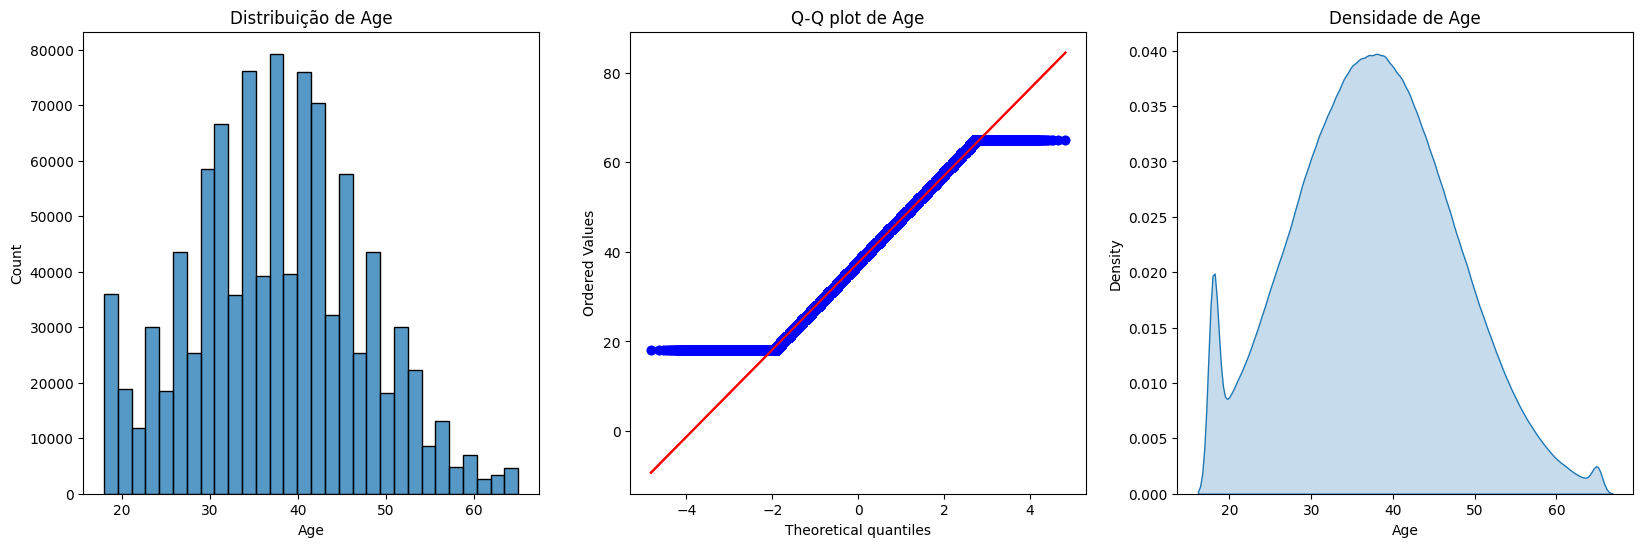

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import scipy.stats as stats

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
col = 'Age'

sns.histplot(df[col].dropna(), bins=30, ax=axes[0])
axes[0].set_title(f'Distribuição de {col}')

stats.probplot(df[col].dropna(), dist="norm", plot=axes[1])
axes[1].set_title(f'Q-Q plot de {col}')


stat, p = shapiro(df[col].dropna())
print(f"{col}: p-value = {p:.5f} {'(Normal)' if p >= 0.05 else '(Não normal)'}")


stats.probplot(df[col].dropna(), dist="norm", plot=axes[1])
axes[1].set_title(f'Q-Q plot de {col}')


stat, p = shapiro(df[col].dropna())
print(f"{col}: p-value = {p:.5f} {'(Normal)' if p >= 0.05 else '(Não normal)'}")

sns.kdeplot(df[col].dropna(), shade=True, ax=axes[2])
axes[2].set_title(f'Densidade de {col}')
plt.show()


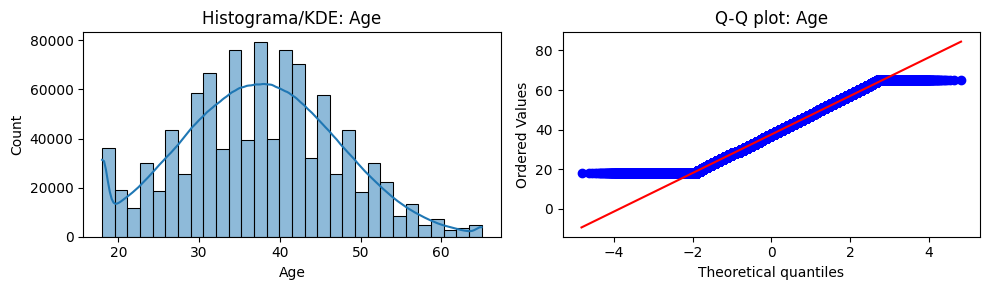

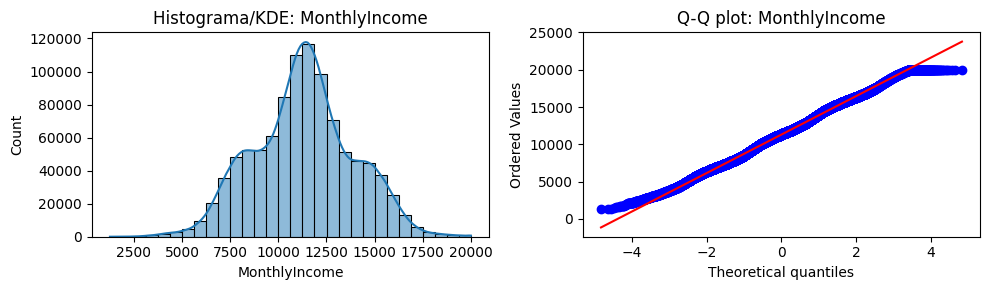

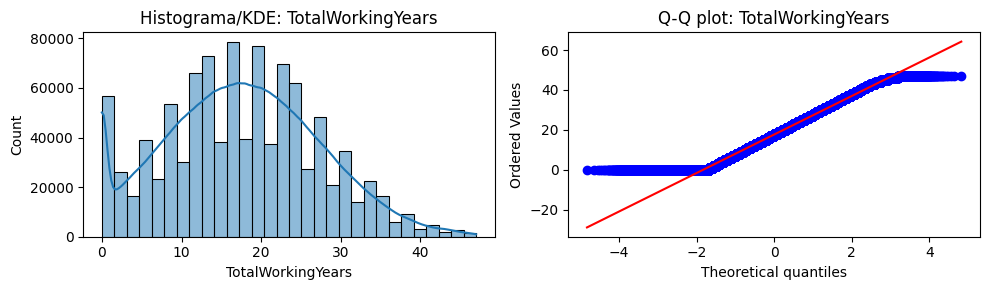

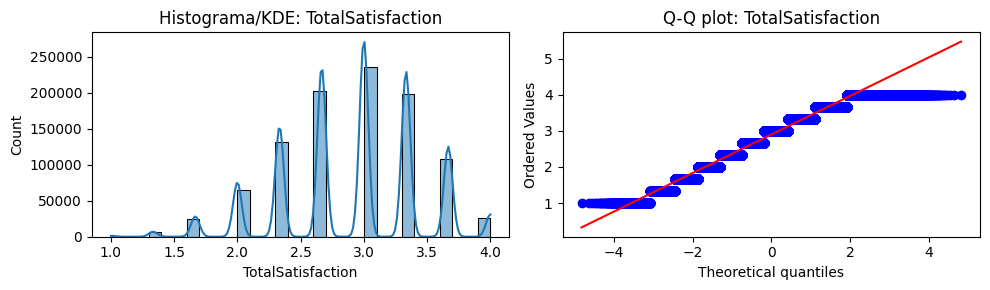

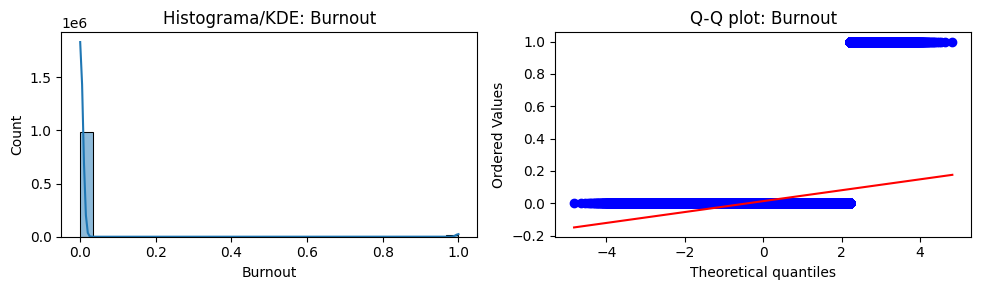

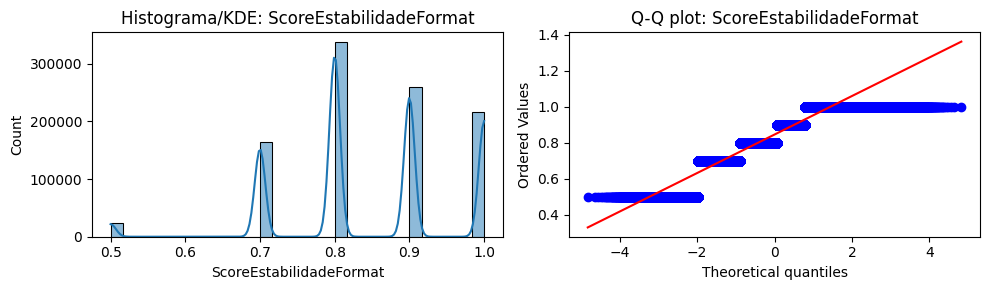

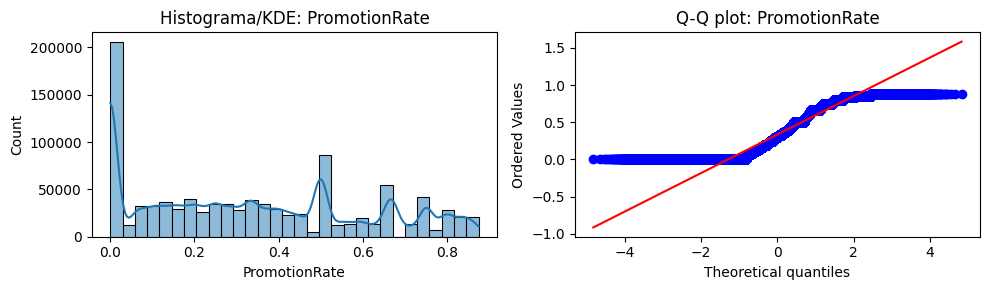

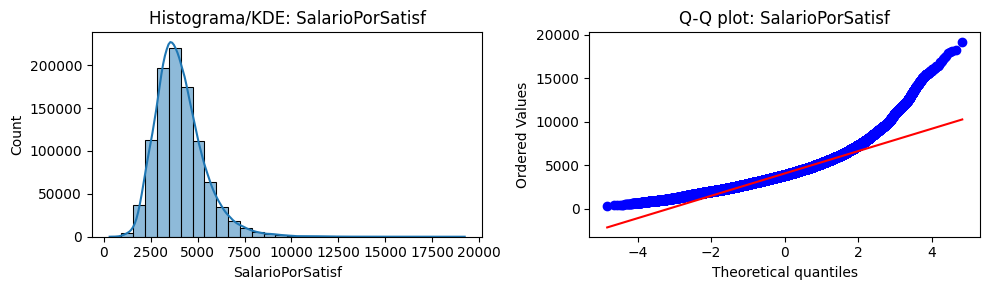

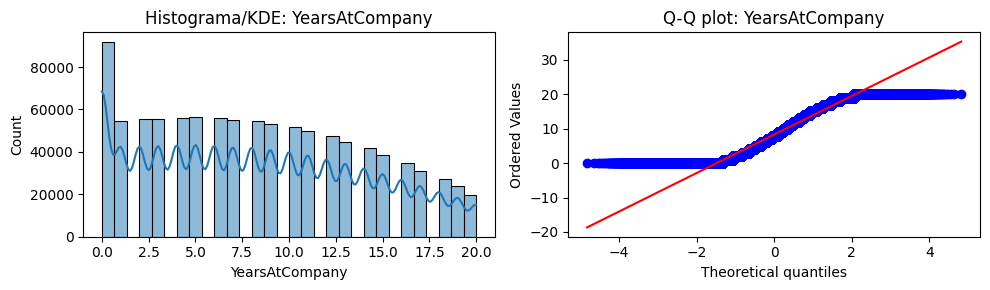

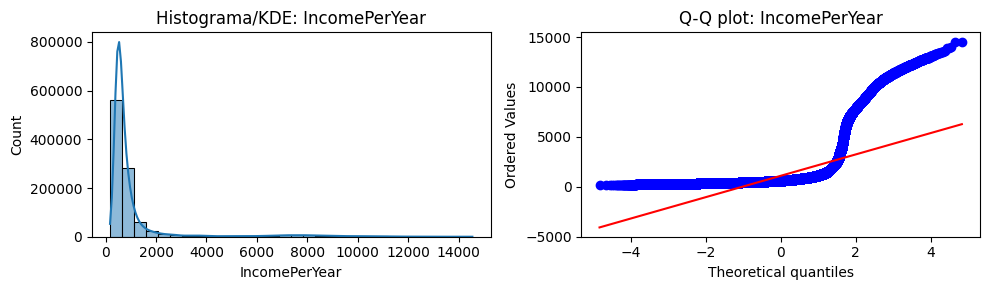

In [28]:
top10 = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'TotalSatisfaction', 'Burnout', 'ScoreEstabilidadeFormat', 'PromotionRate', 'SalarioPorSatisf', 'YearsAtCompany', 'IncomePerYear'] 

for col in top10:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f'Histograma/KDE: {col}')
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q plot: {col}')
    plt.tight_layout()
    plt.show()

### StandardScaler
    Normalmente para dados que são normal curva de sino (guassiana) ou que são < 0.05

In [134]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_over)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.35793764, -0.53630497,  0.70246676, ..., -0.39690247,
         1.17435583, -0.036976  ],
       [-0.35793764, -0.53630497,  0.70246676, ..., -1.08995166,
         0.11979596,  1.0168484 ],
       [ 3.21147531, -0.53630497, -1.63617395, ...,  0.62228752,
         2.1011505 ,  1.5970791 ],
       ...,
       [-0.35793764, -0.53630497,  0.70246676, ...,  2.0287697 ,
         1.19822955,  0.01025397],
       [-0.35793764,  0.68826054, -0.366021  , ...,  0.49925471,
        -0.09340784, -0.0640787 ],
       [ 1.59314523, -0.53630497, -0.57586161, ...,  0.49126453,
        -0.10476382, -0.34753392]], shape=(1313854, 79))

### Normalizer
    Para dados não é normal
    Normalize age reescalando os dados por exemplos/linhas e não por colunas, ou seja, o Normalizer levará em contas os atributos idade, salário e bonus e reescalar os valores com base nesses três valores

In [36]:
from sklearn.preprocessing import Normalizer
X_train_normalize = Normalizer().fit_transform(X_train_over)
X_test_normalize = Normalizer().fit_transform(X_test)
X_train_normalize

array([[0.00000000e+00, 4.18002937e-05, 0.00000000e+00, ...,
        2.32223854e-06, 1.55261044e-01, 1.31971887e-01],
       [0.00000000e+00, 0.00000000e+00, 7.95538633e-05, ...,
        0.00000000e+00, 1.85313705e-01, 1.96895812e-01],
       [0.00000000e+00, 0.00000000e+00, 4.06320442e-05, ...,
        1.62528177e-05, 1.19761596e-01, 1.12276496e-01],
       ...,
       [3.32012371e-05, 0.00000000e+00, 1.96215761e-05, ...,
        2.11291253e-05, 1.89960261e-01, 1.70808967e-01],
       [0.00000000e+00, 0.00000000e+00, 5.81742748e-05, ...,
        1.14167011e-05, 1.20129473e-01, 1.60172631e-01],
       [0.00000000e+00, 0.00000000e+00, 3.79038461e-05, ...,
        1.65186056e-05, 1.11013572e-01, 1.05967694e-01]],
      shape=(65884, 79))

### MinMax Scaler
    para dados não normais
    o cálculo da reescala é feito de forma independente entre cada coluna, de tal forma que a nova escala se dará entre 0 e 1 (ou -1 e 1 se houver valores negativos no dataset)
    valor = ( valor — Coluna.min) / (Coluna.max — Coluna.min)

In [27]:
from sklearn.preprocessing import MinMaxScaler
X_train_minmax = MinMaxScaler().fit_transform(X_train_over)
X_test_minmax = MinMaxScaler().fit_transform(X_test)
X_train_minmax

array([[0.        , 1.        , 0.        , ..., 0.06349206, 0.46939322,
        0.66045016],
       [0.        , 0.        , 1.        , ..., 0.        , 0.26075038,
        0.45153881],
       [0.        , 0.        , 1.        , ..., 0.45714286, 0.353861  ,
        0.53981014],
       ...,
       [0.62853974, 0.        , 0.37146026, ..., 0.45714286, 0.45159011,
        0.68385275],
       [0.        , 0.        , 1.        , ..., 0.22428571, 0.22091542,
        0.5367705 ],
       [0.        , 0.        , 1.        , ..., 0.49806044, 0.35105198,
        0.54974664]], shape=(65884, 79))

## Feature importance

### RandomForestClassifier

### com features sclar

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_quick = RandomForestClassifier(n_estimators=100, random_state=42)
rf_quick.fit(X_train_over, y_train_over)

feature_importance = pd.DataFrame({
    'feature': X_train_over.columns,
    'importance': rf_quick.feature_importances_
}).sort_values('importance', ascending=False).head(20)

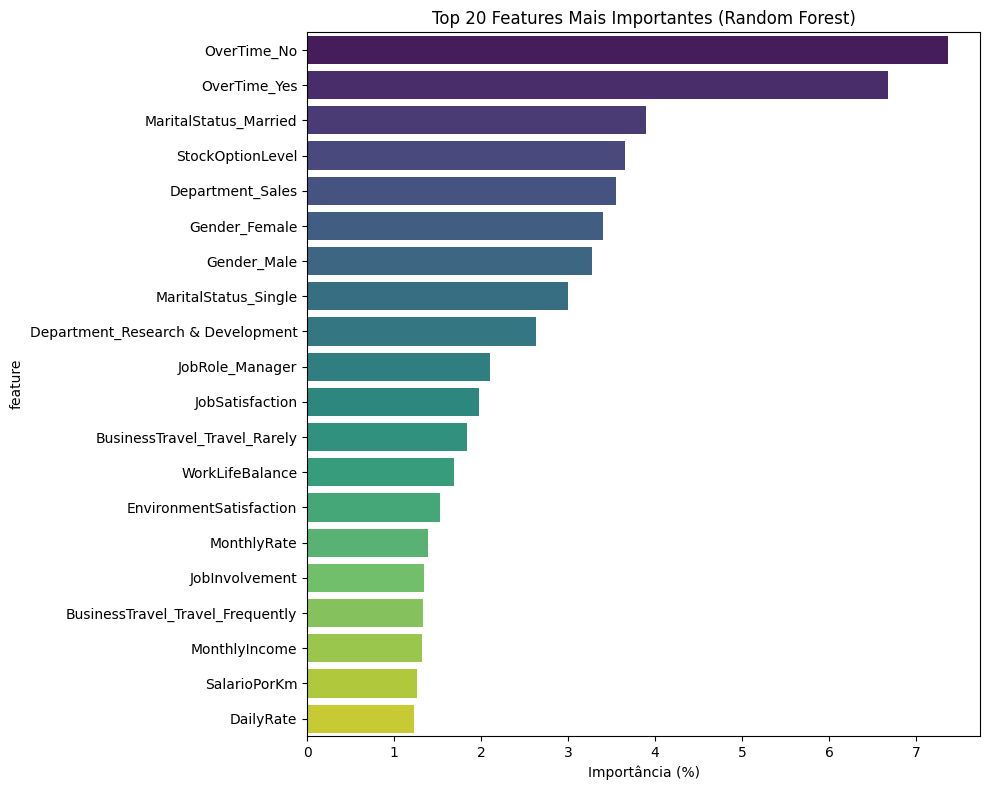

In [30]:
plt.figure(figsize=(10, 8))
feature_importance['importance_pct'] = feature_importance['importance'] * 100
sns.barplot(data=feature_importance, x='importance_pct', y='feature', palette='viridis')
plt.title('Top 20 Features Mais Importantes (Random Forest)')
plt.xlabel('Importância (%)')
plt.tight_layout()
plt.show()

### COm features normalizade

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_quick = RandomForestClassifier(n_estimators=100, random_state=42)
rf_quick.fit(X_train_normalize, y_train_over)

feature_importance = pd.DataFrame({
    'feature': X_train_over.columns,
    'importance': rf_quick.feature_importances_
}).sort_values('importance', ascending=False).head(20)

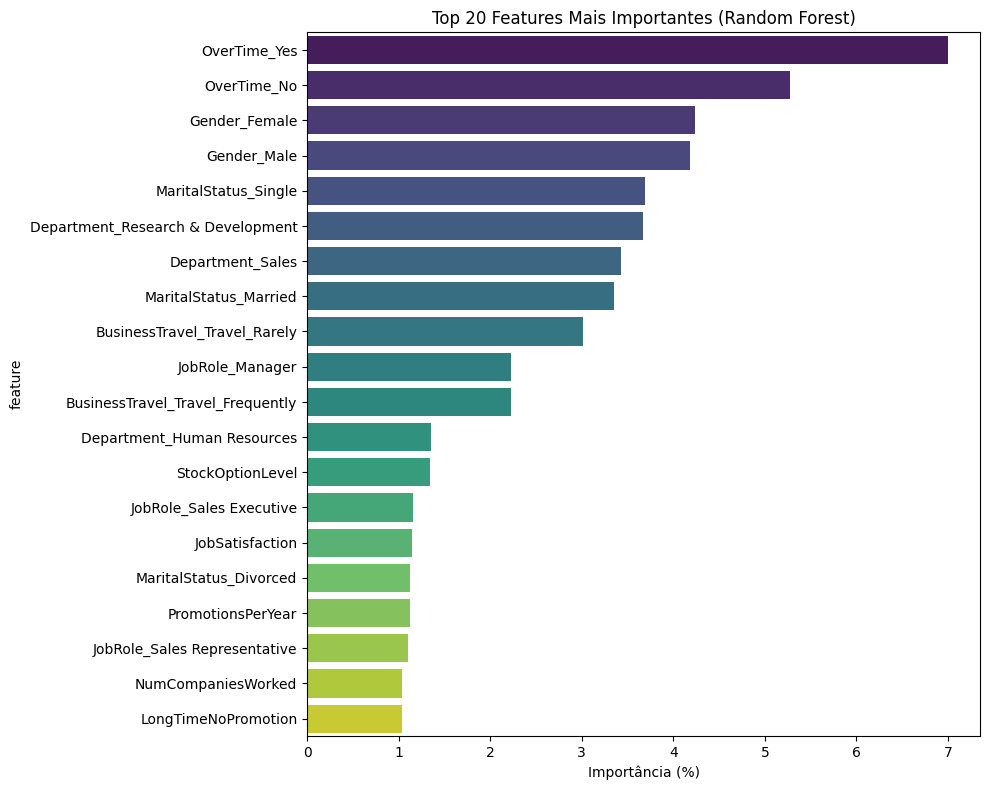

In [39]:
plt.figure(figsize=(10, 8))
feature_importance['importance_pct'] = feature_importance['importance'] * 100
sns.barplot(data=feature_importance, x='importance_pct', y='feature', palette='viridis')
plt.title('Top 20 Features Mais Importantes (Random Forest)')
plt.xlabel('Importância (%)')
plt.tight_layout()
plt.show()

### Com features minMax

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_quick = RandomForestClassifier(n_estimators=100, random_state=42)
rf_quick.fit(X_train_minmax, y_train_over)

feature_importance = pd.DataFrame({
    'feature': X_train_over.columns,
    'importance': rf_quick.feature_importances_
}).sort_values('importance', ascending=False).head(20)

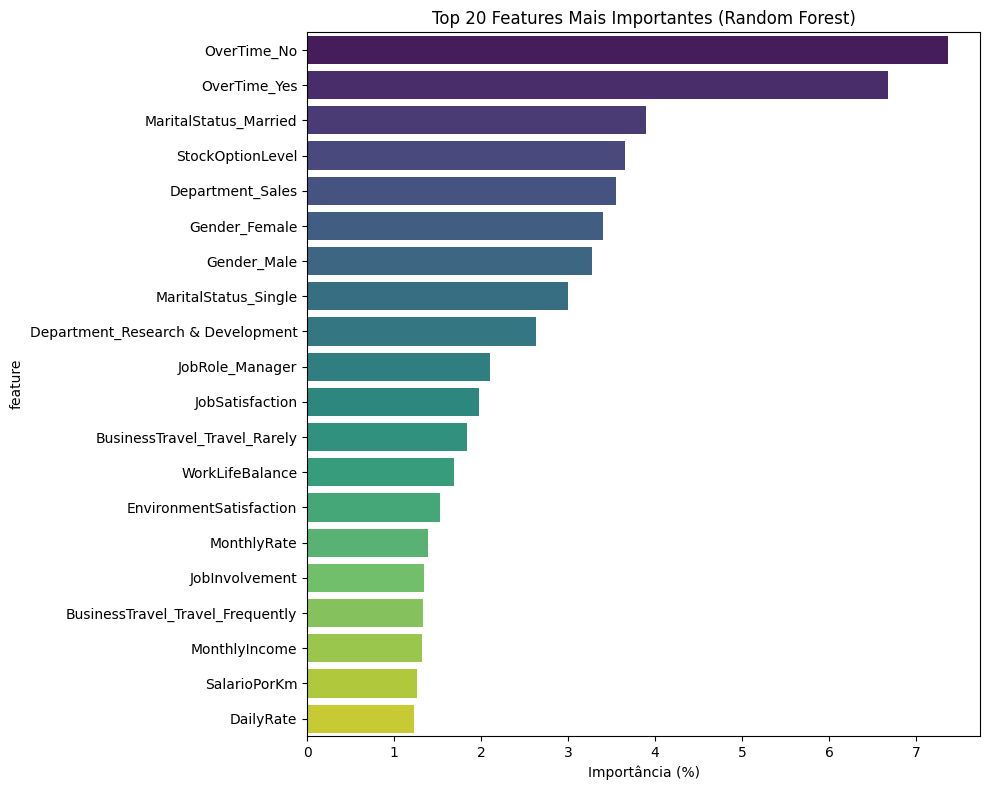

In [41]:
plt.figure(figsize=(10, 8))
feature_importance['importance_pct'] = feature_importance['importance'] * 100
sns.barplot(data=feature_importance, x='importance_pct', y='feature', palette='viridis')
plt.title('Top 20 Features Mais Importantes (Random Forest)')
plt.xlabel('Importância (%)')
plt.tight_layout()
plt.show()

### Permutation importance
    Mede quanto a métrica do modelo cai quando uma feature é embaralhada. pois considera até correlações entre features.

In [42]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf_quick, X_test_minmax, y_test, n_repeats=10, random_state=42)
imp_df = pd.DataFrame({'feature': X_train.columns, 'importance': result.importances_mean}).sort_values('importance', ascending=False)
imp_df

feature  importance
24                   OverTime_No     0.00339
25                  OverTime_Yes     0.00320
13                   Gender_Male     0.00144
5               Department_Sales     0.00112
12                 Gender_Female     0.00102
..                           ...         ...
63    TreinamentosPorTempodeCasa    -0.00013
78       SalarioAjustadoPorCargo    -0.00013
21        MaritalStatus_Divorced    -0.00014
76       TempoComGestorProporcao    -0.00017
2   BusinessTravel_Travel_Rarely    -0.00025

[79 rows x 2 columns]

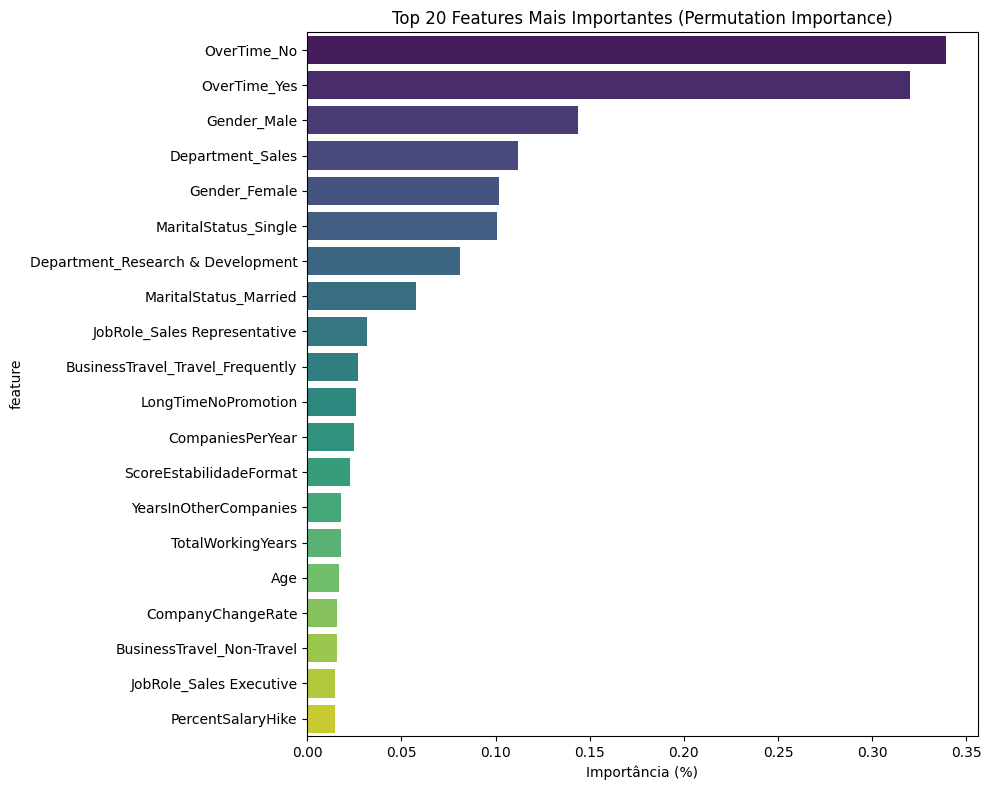

In [43]:
plt.figure(figsize=(10, 8))
imp_df['importance_pct'] = imp_df['importance'] * 100
sns.barplot(data=imp_df.head(20), x='importance_pct', y='feature', palette='viridis')
plt.title('Top 20 Features Mais Importantes (Permutation Importance)')
plt.xlabel('Importância (%)')
plt.tight_layout()
plt.show()

### SHAP

In [45]:
import shap
explainer = shap.TreeExplainer(rf_quick)
amostra = 1_000
X_sample = X_test[:amostra]
shap_values = explainer.shap_values(X_sample)
print(np.shape(shap_values))

(1000, 79, 2)


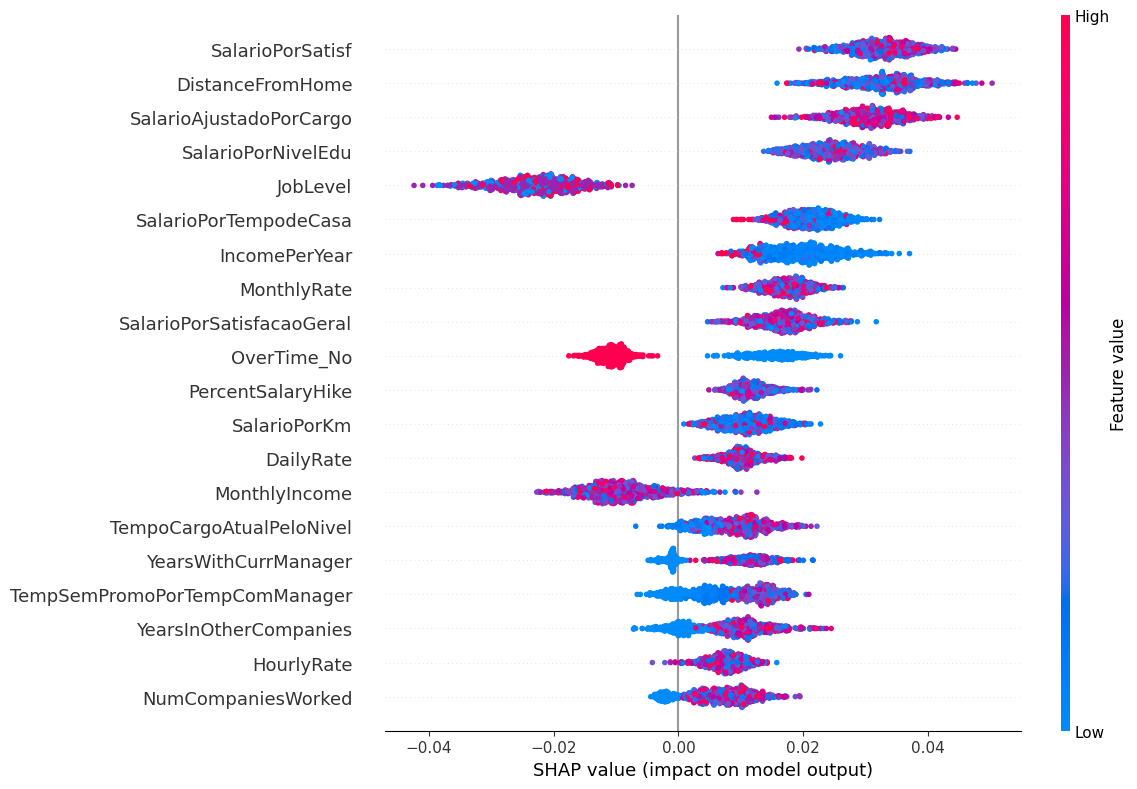

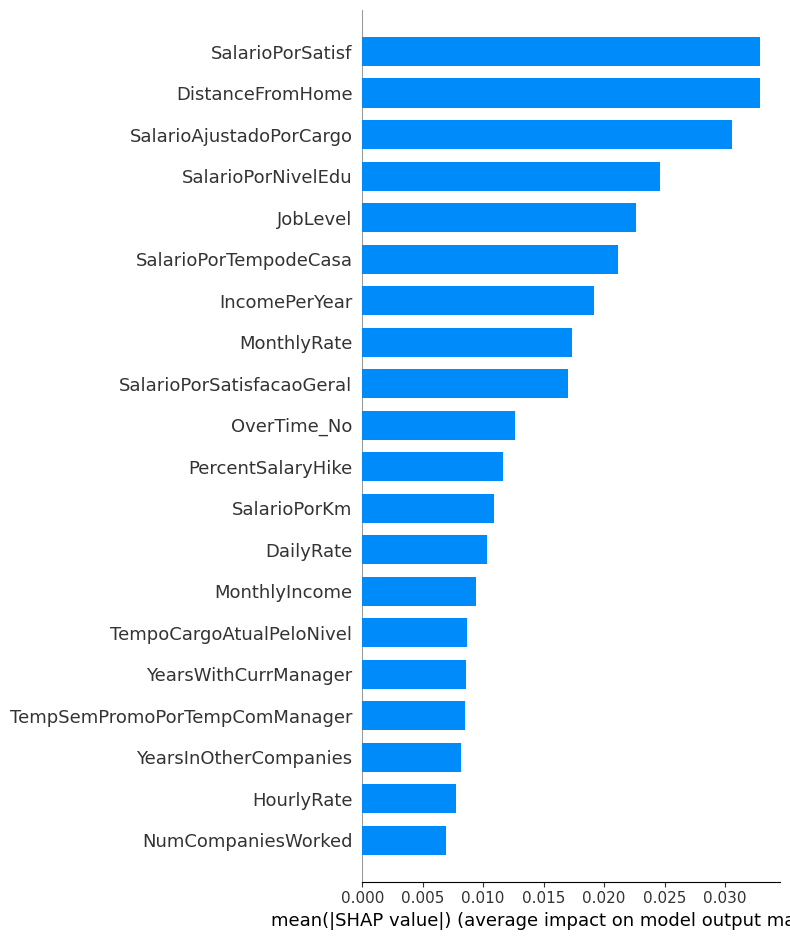

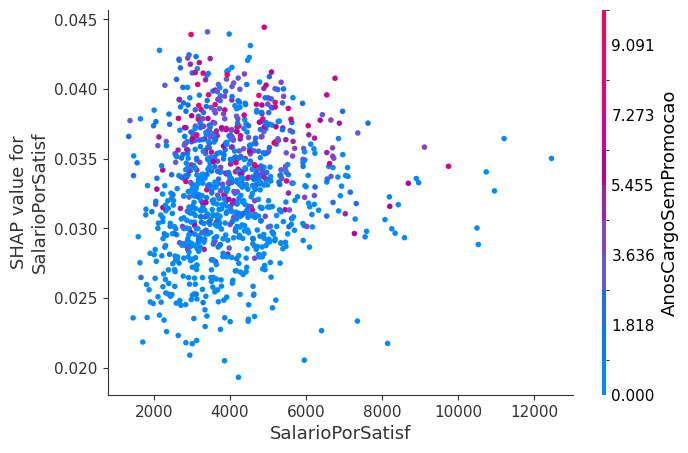

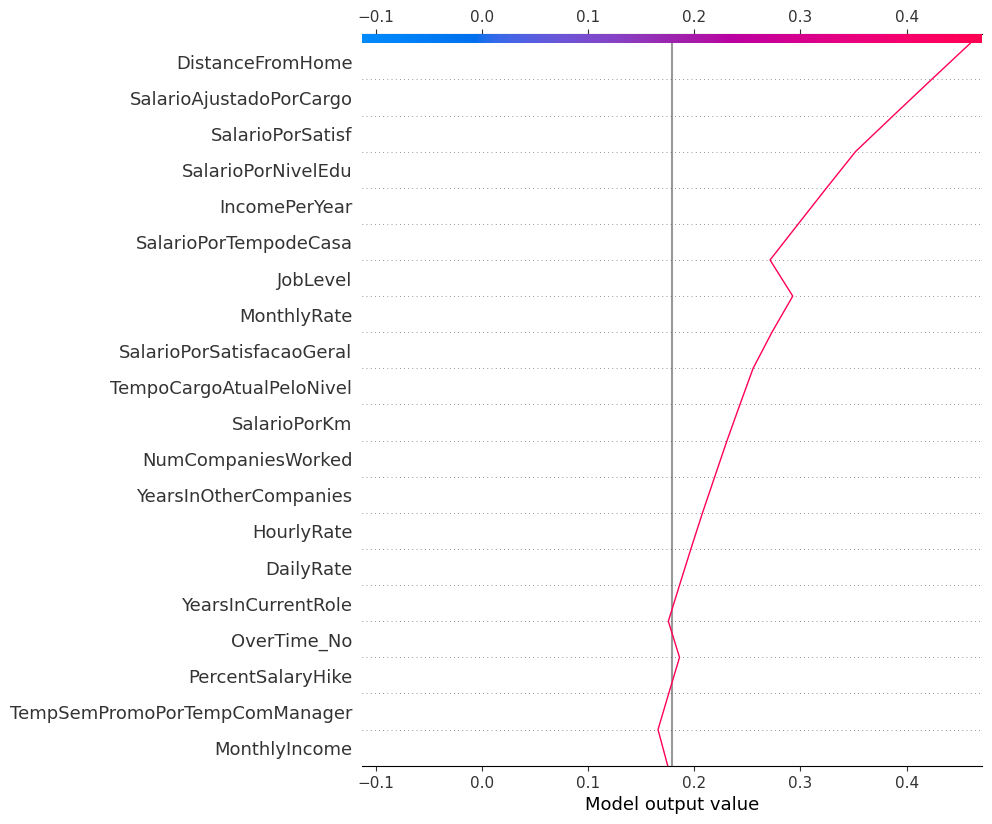

In [46]:
shap_values_plot = shap_values[:, :, 1] # 1 para a classe Attrition
shap.summary_plot(shap_values_plot, X_sample, plot_size=(12, 8))

shap.summary_plot(shap_values_plot, X_sample, plot_type="bar")

shap.dependence_plot("SalarioPorSatisf", shap_values_plot, X_sample)

shap.decision_plot(explainer.expected_value[1], shap_values_plot[0, :], X_sample.columns)

## Treinamento dos modelos

### Func avaliacao modelo

* Matriz de Confusão
    * 0 = classe negativa (ficou), 1 = classe positiva (saiu)
    * Linhas = Valor Real, Colunas = Predito
        * [0,0] (Topo esquerdo): Verdadeiros Negativos (acertou quem ficou)
        * [0,1] (Topo direito): Falsos Positivos (errou, previu que saiu mas ficou) 
        * [1,0] (Baixo esquerdo): Falsos Negativos (errou, previu que ficou mas saiu) 
        * [1,1] (Baixo direito): Verdadeiros Positivos (acertou quem saiu)
* Curva ROC e AUC
    * ROC = Receiver Operating Characteristic
        * Eixo X: Falso Positivo (FP rate)
        * Eixo Y: Verdadeiro Positivo (TP rate)

    * AUC: Área sob a curva ROC. Mede a capacidade do modelo distinguir as classes.
        * AUC = 0.5 → Modelo aleatório (sem poder preditivo)
        * AUC = 1.0 → Modelo perfeito
* Curva Precision-Recall
    * Precision (Precisão): Dos que o modelo disse que “saiu”, quantos saíram de verdade?
    * Recall (Sensibilidade): Dos que saíram de verdade, quantos o modelo encontrou?
    * Curva: Mostra o trade-off entre tentar acertar todos (recall alto) e não errar muito (precision alto).

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

def avaliar_modelo(modelo, X_train, X_test, y_train, y_test, nome='Modelo'):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else modelo.decision_function(X_test)

    print(f"\n{nome}\n", "="*40)
    print(classification_report(y_test, y_pred, digits=3))
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Matriz de Confusão - {nome}')
    axes[0].set_xlabel('Predito')
    axes[0].set_ylabel('Real')

    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    sns.lineplot(x=fpr, y=tpr, ax=axes[1],  label=f'AUC = {roc_auc:.3f}')
    axes[1].plot([0,1],[0,1],'k--')
    axes[1].set_title(f'Curva ROC - {nome}')
    axes[1].set_xlabel('Falso Positivo')
    axes[1].set_ylabel('Verdadeiro Positivo')
    axes[1].legend()
    
    # Curva Precision-Recall
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    sns.lineplot(x=recall, y=precision, ax=axes[2])
    axes[2].set_title(f'Precision-Recall Curve - {nome}')
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    plt.show()

### xgboost

In [137]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


XGBoost
              precision    recall  f1-score   support

         0.0      0.822     0.997     0.901    164232
         1.0      0.435     0.010     0.020     35768

    accuracy                          0.821    200000
   macro avg      0.629     0.504     0.461    200000
weighted avg      0.753     0.821     0.744    200000



KeyboardInterrupt: 

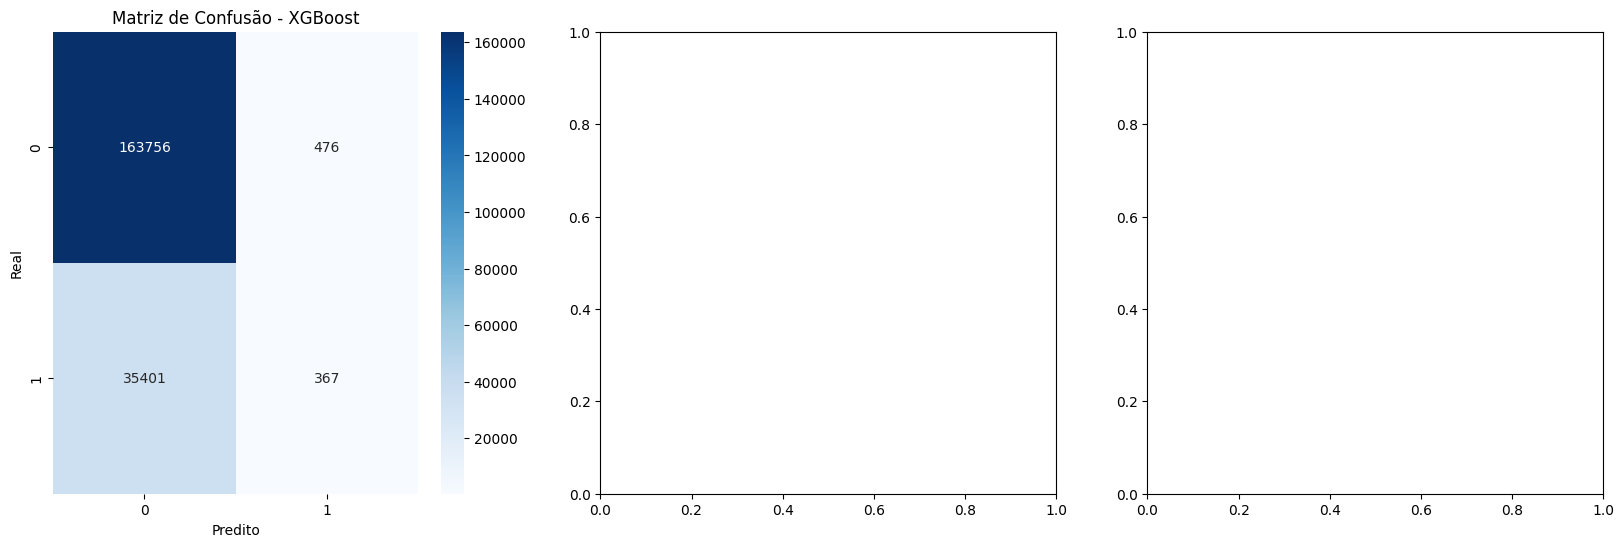

In [147]:
avaliar_modelo(xgb_model, X_train_minmax, X_test_minmax, y_train_over, y_test, nome='XGBoost')

#### Hiperparamtros

##### GridSearchCV
    Testa todas as combinações de parâmetros que você definir.

In [59]:
from sklearn.model_selection import GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                        param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)
grid_xgb.fit(X_train_minmax, y_train)
print("GridSearchCV XGB:", grid_xgb.best_params_)

/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:02:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:02:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:02:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: User

GridSearchCV XGB: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}



XGBoost (Grid)
              precision    recall  f1-score   support

         0.0      0.826     0.951     0.884      1641
         1.0      0.270     0.084     0.128       359

    accuracy                          0.795      2000
   macro avg      0.548     0.517     0.506      2000
weighted avg      0.726     0.795     0.748      2000



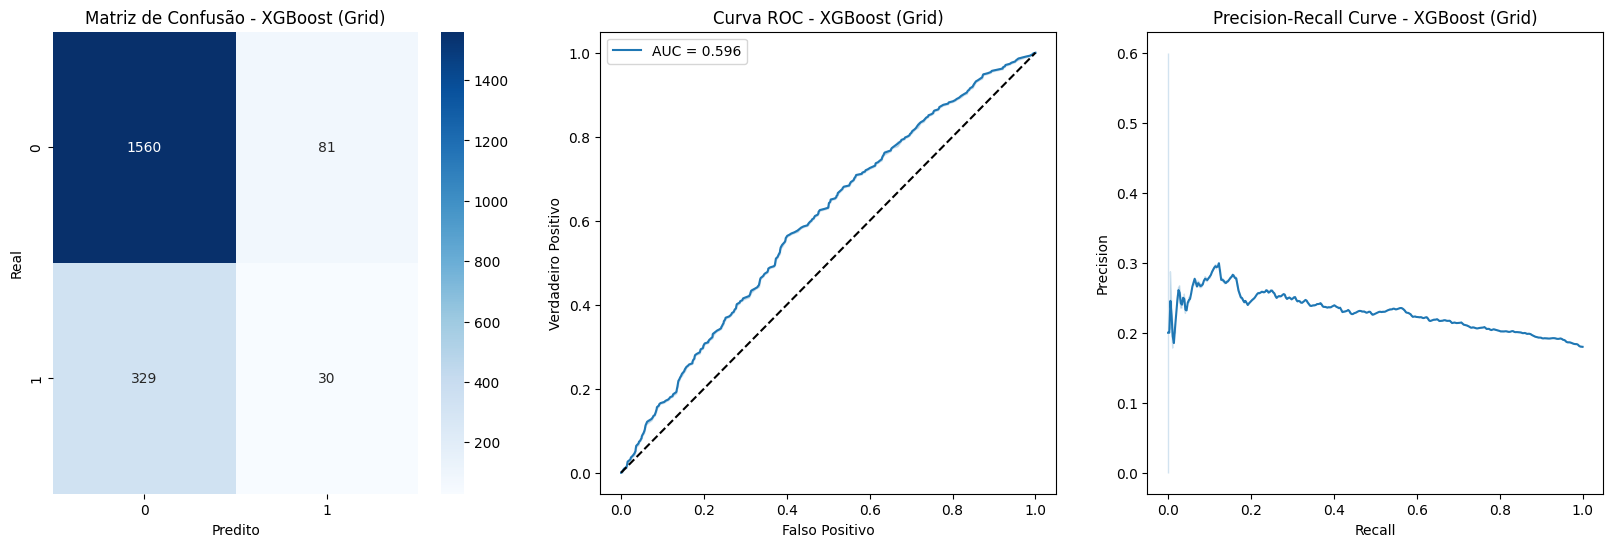

In [60]:
avaliar_modelo(grid_xgb.best_estimator_, X_train_minmax, X_test_minmax, y_train, y_test, nome='XGBoost (Grid)')

##### RandomizedSearchCV
    Testa combinações aleatórias dos parâmetros (mais rápido quando tem muitas opções).

In [141]:
from sklearn.model_selection import  RandomizedSearchCV

param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}
rnd_xgb = RandomizedSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                             param_distributions=param_dist_xgb, n_iter=10, cv=3, scoring='f1', n_jobs=-1)
rnd_xgb.fit(X_train_minmax, y_train_over)
print("RandomizedSearchCV XGB:", rnd_xgb.best_params_)

/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:08:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:08:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [16:08:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: User

RandomizedSearchCV XGB: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}



XGBoost (Random)
              precision    recall  f1-score   support

         0.0      0.822     0.999     0.902    164232
         1.0      0.484     0.005     0.011     35768

    accuracy                          0.821    200000
   macro avg      0.653     0.502     0.456    200000
weighted avg      0.761     0.821     0.742    200000



KeyboardInterrupt: 

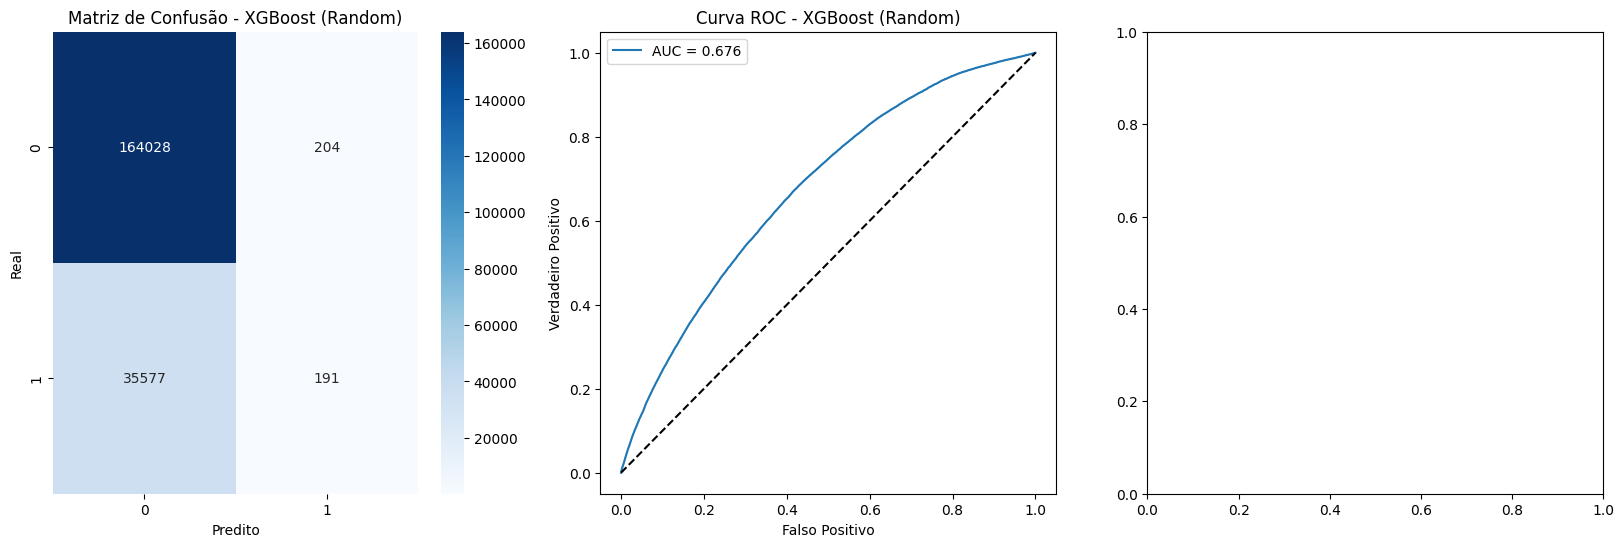

In [142]:
avaliar_modelo(rnd_xgb.best_estimator_, X_train_minmax, X_test_minmax, y_train_over, y_test, nome='XGBoost (Random)')

##### Otimização bayesiana
    A otimização bayesiana é uma técnica baseada no teorema de Bayes, que descreve a probabilidade de ocorrência de um evento relacionado ao conhecimento atual

In [64]:
from skopt import BayesSearchCV

search_spaces_xgb = {
    'n_estimators': (100, 300),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'subsample': (0.8, 1.0)
}
opt_xgb = BayesSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    search_spaces=search_spaces_xgb,
    n_iter=20,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    random_state=42
)
opt_xgb.fit(X_train_minmax, y_train)
print("BayesSearchCV XGB:", opt_xgb.best_params_)

/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:05:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:05:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:05:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: User

BayesSearchCV XGB: OrderedDict({'learning_rate': 0.29999999999999993, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8})



XGBoost (Bayes)
              precision    recall  f1-score   support

         0.0      0.825     0.937     0.878      1641
         1.0      0.243     0.092     0.133       359

    accuracy                          0.785      2000
   macro avg      0.534     0.515     0.505      2000
weighted avg      0.721     0.785     0.744      2000



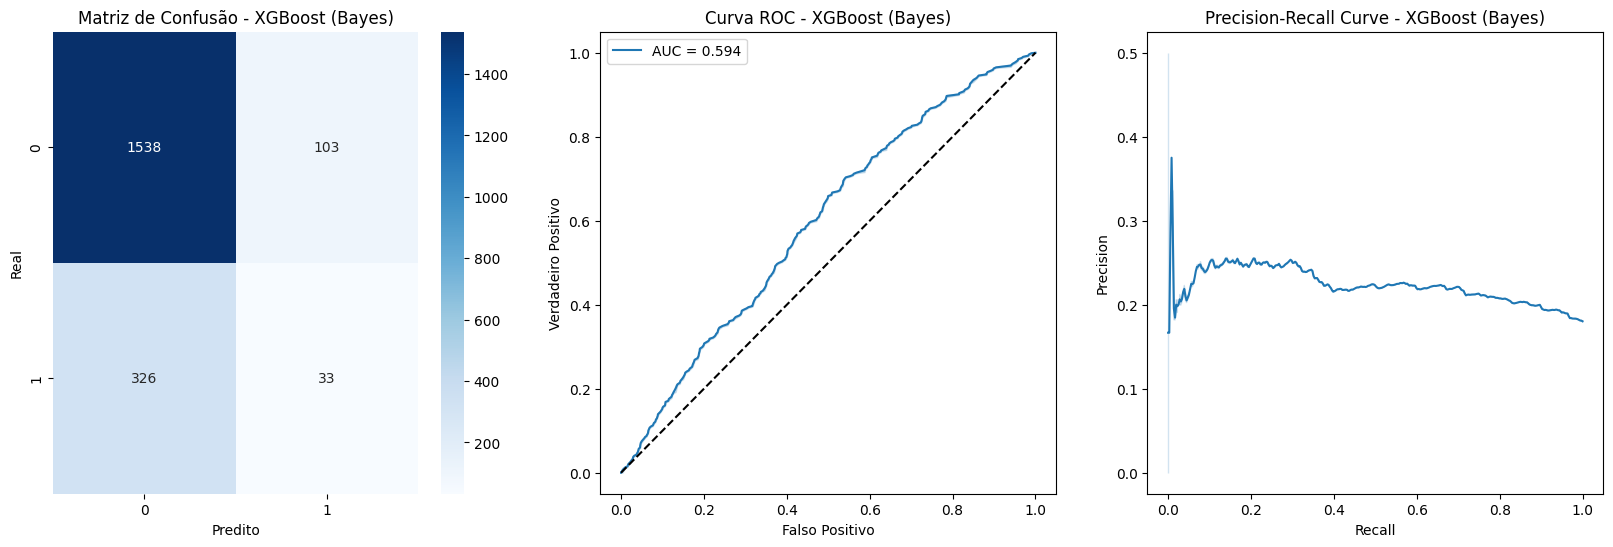

In [65]:
avaliar_modelo(opt_xgb.best_estimator_, X_train_minmax, X_test_minmax, y_train, y_test, nome='XGBoost (Bayes)')

##### Optuna
    é um dos frameworks mais modernos para hyperparameter tuning, super flexível e fácil de usar.
    Ele funciona diferente: você define uma função de objetivo, e o Optuna faz os testes.

In [66]:
import optuna
from sklearn.model_selection import cross_val_score

def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.8, 1.0),
        'use_label_encoder': False,
        'eval_metric': 'logloss',
        'random_state': 42
    }
    model = xgb.XGBClassifier(**params)
    score = cross_val_score(model, X_train_minmax, y_train, cv=3, scoring='f1').mean()
    return score

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=20)
print("Optuna XGB:", study_xgb.best_params)
best_xgb_optuna = xgb.XGBClassifier(**study_xgb.best_params)
best_xgb_optuna.fit(X_train_minmax, y_train)

[I 2025-07-15 14:06:23,922] A new study created in memory with name: no-name-dd06713b-e0d5-4aab-9db0-736ccd028a47
[I 2025-07-15 14:06:25,409] Trial 0 finished with value: 0.08288852621913882 and parameters: {'n_estimators': 241, 'max_depth': 7, 'learning_rate': 0.04319464072810648, 'subsample': 0.8433471040812413}. Best is trial 0 with value: 0.08288852621913882.
[I 2025-07-15 14:06:27,219] Trial 1 finished with value: 0.09314627679567984 and parameters: {'n_estimators': 221, 'max_depth': 10, 'learning_rate': 0.11857431584569962, 'subsample': 0.8180979888596002}. Best is trial 1 with value: 0.09314627679567984.
[I 2025-07-15 14:06:29,318] Trial 2 finished with value: 0.09325033345973106 and parameters: {'n_estimators': 296, 'max_depth': 9, 'learning_rate': 0.13179453970216173, 'subsample': 0.9887268491958457}. Best is trial 2 with value: 0.09325033345973106.
[I 2025-07-15 14:06:29,871] Trial 3 finished with value: 0.12372886933863392 and parameters: {'n_estimators': 197, 'max_depth': 3

Optuna XGB: {'n_estimators': 136, 'max_depth': 3, 'learning_rate': 0.2999393571488057, 'subsample': 0.9346744112314663}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2999393571488057, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=136, n_jobs=None,
              num_parallel_tree=None, ...)


XGBoost (Optuna)
              precision    recall  f1-score   support

         0.0      0.827     0.975     0.895      1641
         1.0      0.369     0.067     0.113       359

    accuracy                          0.812      2000
   macro avg      0.598     0.521     0.504      2000
weighted avg      0.745     0.812     0.755      2000



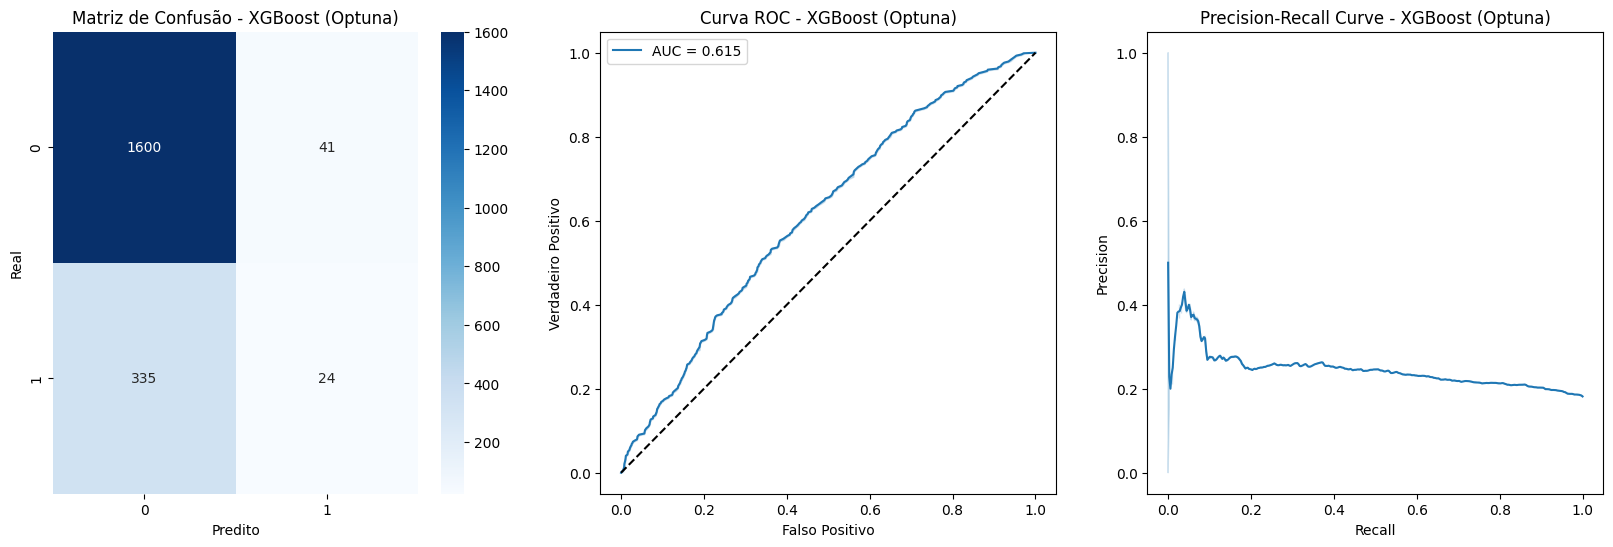

In [67]:
avaliar_modelo(best_xgb_optuna, X_train_minmax, X_test_minmax, y_train, y_test, nome='XGBoost (Optuna)')

### random forest

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


Random Forest
              precision    recall  f1-score   support

         0.0      0.821     0.999     0.901      1641
         1.0      0.500     0.003     0.006       359

    accuracy                          0.821      2000
   macro avg      0.660     0.501     0.453      2000
weighted avg      0.763     0.821     0.741      2000



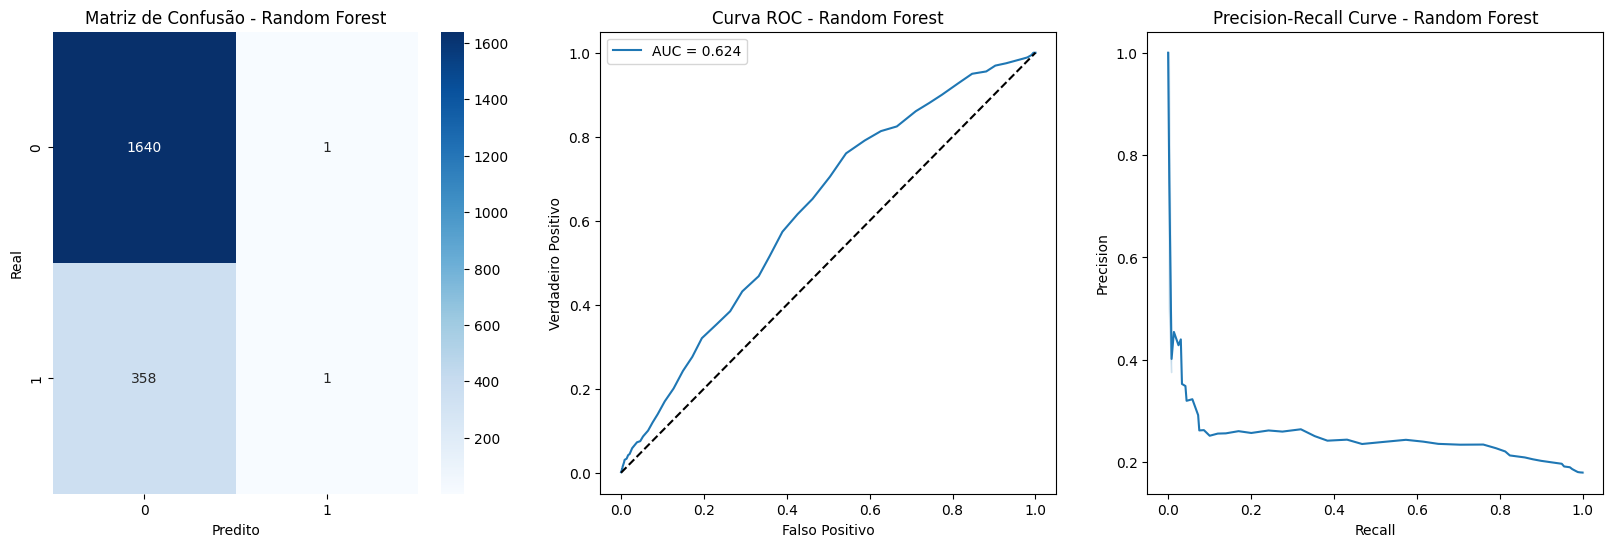

In [70]:
avaliar_modelo(rf_model, X_train_minmax, X_test_minmax, y_train, y_test, nome='Random Forest')

#### Hiperparamtros

##### GridSearchCV
    Testa todas as combinações de parâmetros que você definir.

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', n_jobs=-1)
grid.fit(X_train_minmax, y_train)
print("Melhores parâmetros:", grid.best_params_)
best_rf = grid.best_estimator_

Melhores parâmetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}



Random Forest (GridSearchCV)
              precision    recall  f1-score   support

         0.0      0.822     0.999     0.902      1641
         1.0      0.750     0.008     0.017       359

    accuracy                          0.822      2000
   macro avg      0.786     0.504     0.459      2000
weighted avg      0.809     0.822     0.743      2000



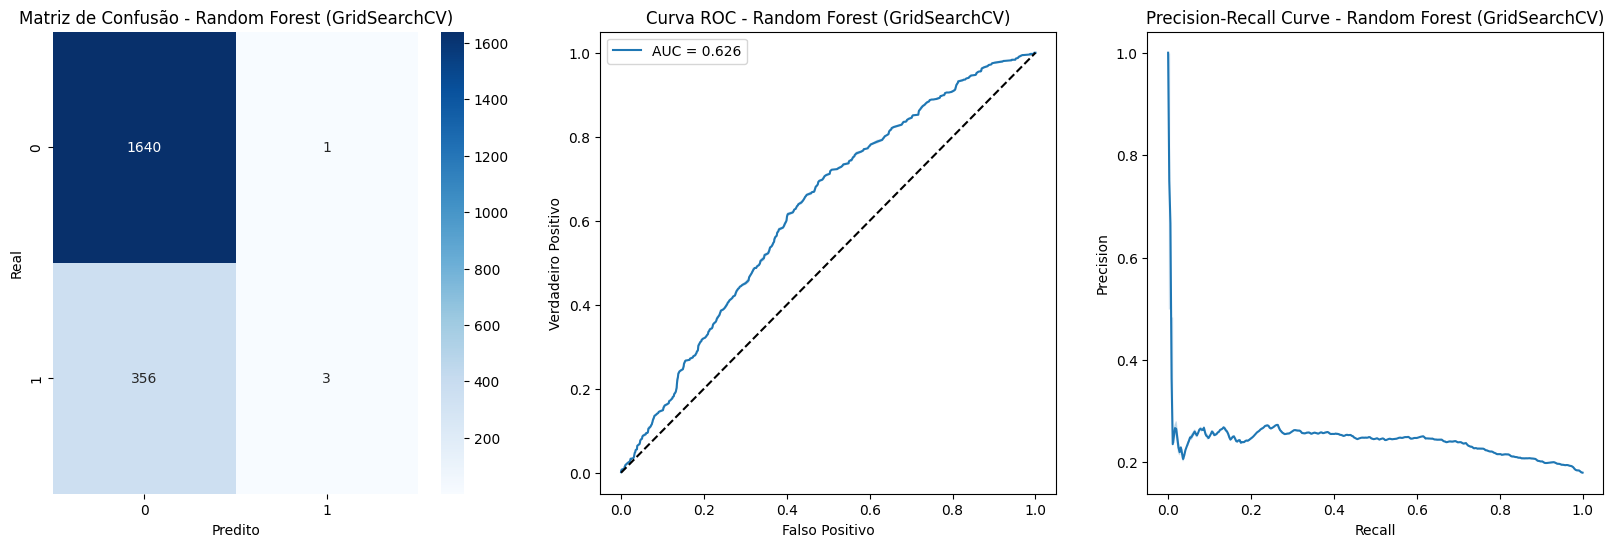

In [72]:
avaliar_modelo(best_rf, X_train_minmax, X_test_minmax, y_train, y_test, nome='Random Forest (GridSearchCV)')

##### RandomizedSearchCV
    Testa combinações aleatórias dos parâmetros (mais rápido quando tem muitas opções).

In [73]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'max_depth': [3, 5, 7, None],
    'n_estimators': [50, 100, 200, 300],
    'min_samples_split': [2, 5, 10]
}
rnd = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
rnd.fit(X_train_minmax, y_train)
print("Melhores parâmetros:", rnd.best_params_)
best_rf_rnd = rnd.best_estimator_

Melhores parâmetros: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': None}



Random Forest (RandomizedSearchCV)
              precision    recall  f1-score   support

         0.0      0.820     0.993     0.898      1641
         1.0      0.083     0.003     0.005       359

    accuracy                          0.816      2000
   macro avg      0.452     0.498     0.452      2000
weighted avg      0.688     0.816     0.738      2000



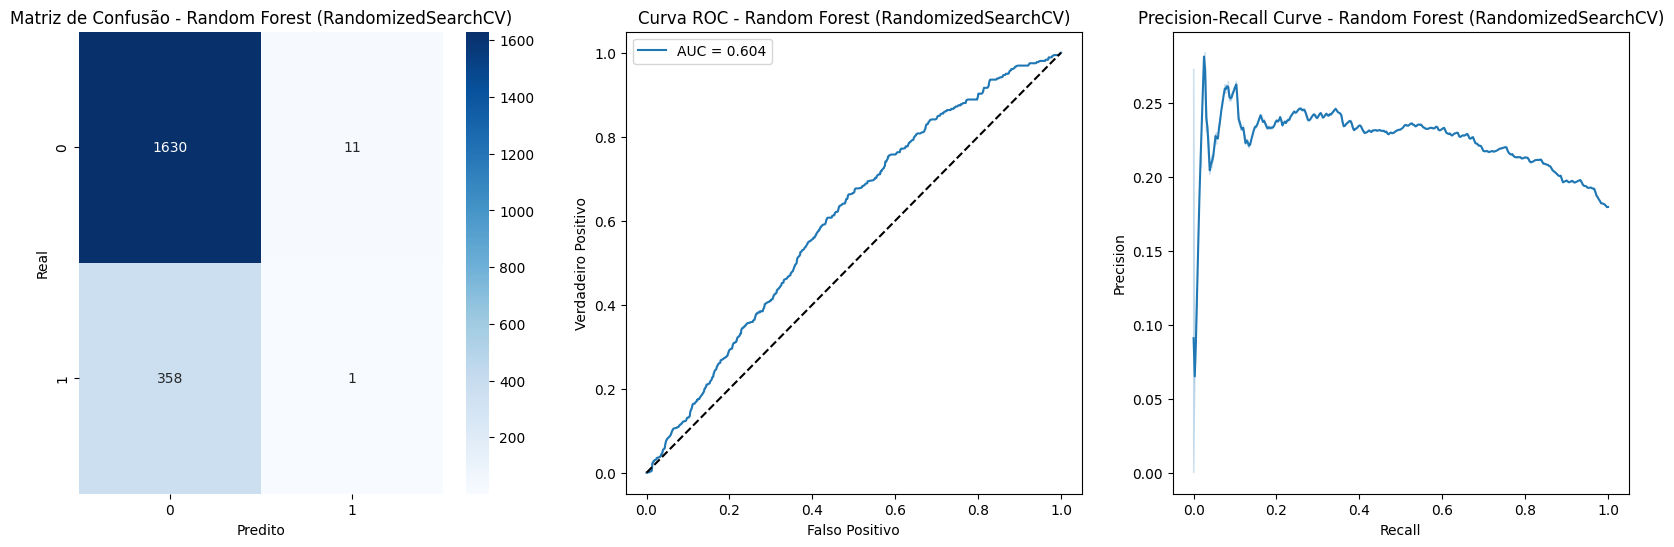

In [74]:
avaliar_modelo(best_rf_rnd, X_train_minmax, X_test_minmax, y_train, y_test, nome='Random Forest (RandomizedSearchCV)')

##### Otimização bayesiana
    A otimização bayesiana é uma técnica baseada no teorema de Bayes, que descreve a probabilidade de ocorrência de um evento relacionado ao conhecimento atual

In [75]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier

search_spaces = {
    'max_depth': (3, 30),  # valores inteiros entre 3 e 30
    'n_estimators': (50, 500),
    'min_samples_split': (2, 20)
}

opt = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    search_spaces=search_spaces,
    n_iter=20,  # número de avaliações de combinações
    scoring='f1',
    cv=3,
    n_jobs=-1,
    random_state=42
)

opt.fit(X_train_minmax, y_train)
print("Melhores parâmetros (Bayesian):", opt.best_params_)
best_rf_bayes = opt.best_estimator_


Melhores parâmetros (Bayesian): OrderedDict({'max_depth': 29, 'min_samples_split': 6, 'n_estimators': 319})



Random Forest (BayesSearchCV)
              precision    recall  f1-score   support

         0.0      0.821     0.999     0.901      1641
         1.0      0.500     0.003     0.006       359

    accuracy                          0.821      2000
   macro avg      0.660     0.501     0.453      2000
weighted avg      0.763     0.821     0.741      2000



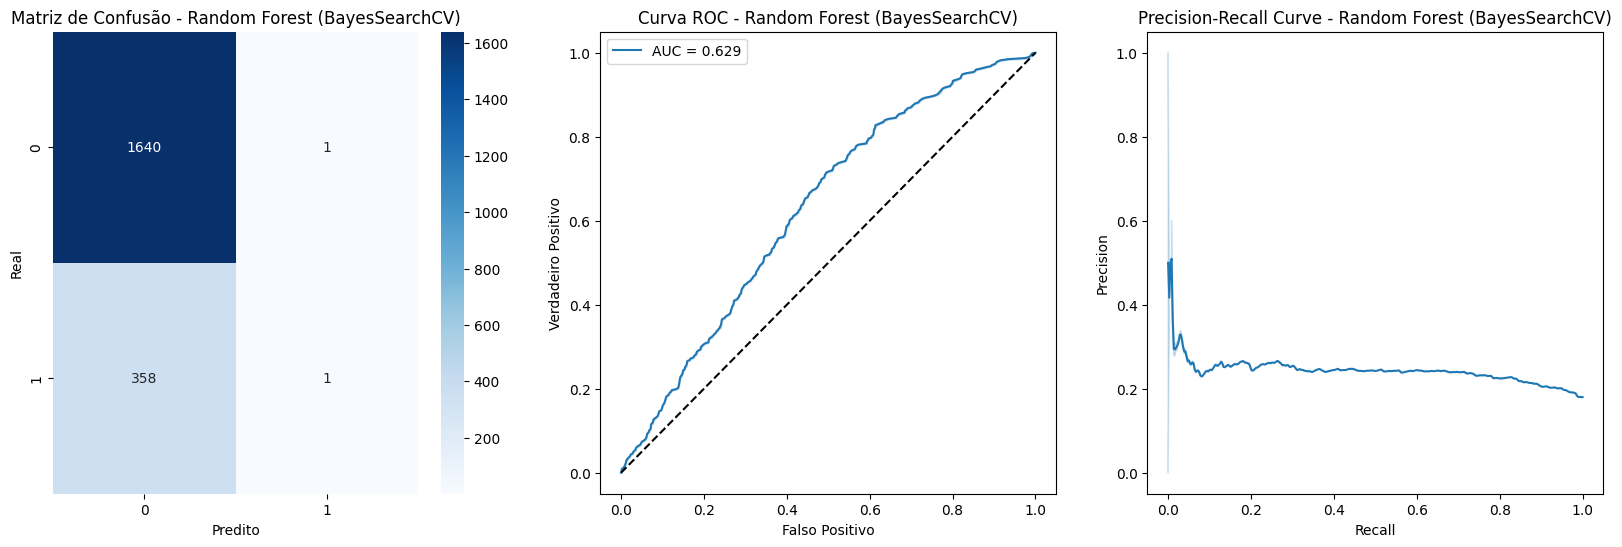

In [76]:
avaliar_modelo(best_rf_bayes, X_train_minmax, X_test_minmax, y_train, y_test, nome='Random Forest (BayesSearchCV)')

##### Optuna
    é um dos frameworks mais modernos para hyperparameter tuning, super flexível e fácil de usar.
    Ele funciona diferente: você define uma função de objetivo, e o Optuna faz os testes.

In [77]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 3, 30)
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    
    clf = RandomForestClassifier(
        max_depth=max_depth,
        n_estimators=n_estimators,
        min_samples_split=min_samples_split,
        random_state=42,
        n_jobs=-1
    )
    score = cross_val_score(clf, X_train_minmax, y_train, cv=3, scoring='f1').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # aumenta n_trials para tunagem mais longa

print("Melhores parâmetros (Optuna):", study.best_params)
best_rf_optuna = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)
best_rf_optuna.fit(X_train_minmax, y_train)


[I 2025-07-15 14:23:18,725] A new study created in memory with name: no-name-4173c3e0-84fe-42d6-8528-d99c40d33bf1


[I 2025-07-15 14:23:20,223] Trial 0 finished with value: 0.0027749143126095457 and parameters: {'max_depth': 12, 'n_estimators': 321, 'min_samples_split': 12}. Best is trial 0 with value: 0.0027749143126095457.
[I 2025-07-15 14:23:22,561] Trial 1 finished with value: 0.004135272673121587 and parameters: {'max_depth': 26, 'n_estimators': 493, 'min_samples_split': 9}. Best is trial 1 with value: 0.004135272673121587.
[I 2025-07-15 14:23:23,776] Trial 2 finished with value: 0.0013717421124828533 and parameters: {'max_depth': 23, 'n_estimators': 254, 'min_samples_split': 4}. Best is trial 1 with value: 0.004135272673121587.
[I 2025-07-15 14:23:24,549] Trial 3 finished with value: 0.0 and parameters: {'max_depth': 3, 'n_estimators': 290, 'min_samples_split': 9}. Best is trial 1 with value: 0.004135272673121587.
[I 2025-07-15 14:23:25,212] Trial 4 finished with value: 0.0 and parameters: {'max_depth': 3, 'n_estimators': 242, 'min_samples_split': 16}. Best is trial 1 with value: 0.00413527267

Melhores parâmetros (Optuna): {'max_depth': 17, 'n_estimators': 53, 'min_samples_split': 9}


RandomForestClassifier(max_depth=17, min_samples_split=9, n_estimators=53,
                       n_jobs=-1, random_state=42)


Random Forest (Optuna)
              precision    recall  f1-score   support

         0.0      0.820     0.996     0.899      1641
         1.0      0.000     0.000     0.000       359

    accuracy                          0.817      2000
   macro avg      0.410     0.498     0.450      2000
weighted avg      0.673     0.817     0.738      2000



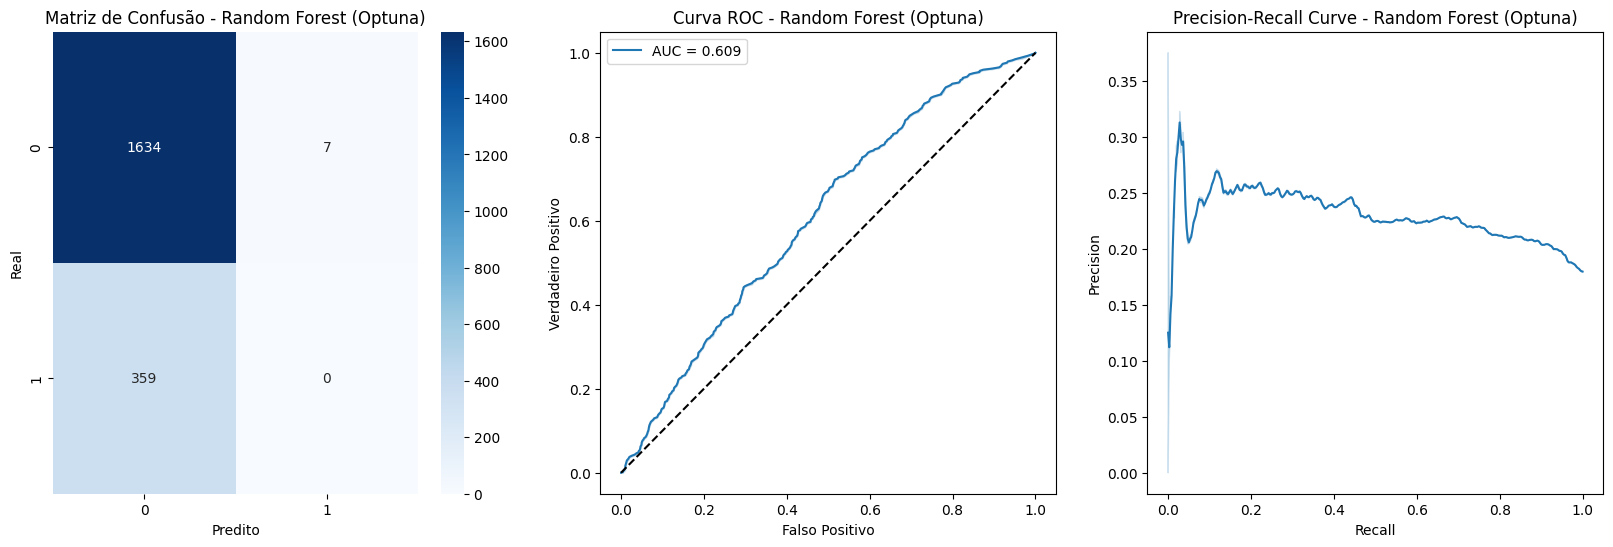

In [78]:
avaliar_modelo(best_rf_optuna, X_train_minmax, X_test_minmax, y_train, y_test, nome='Random Forest (Optuna)')

### Logistic Regression
    

In [79]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)



Logistic Regression
              precision    recall  f1-score   support

         0.0      0.821     0.996     0.900      1641
         1.0      0.300     0.008     0.016       359

    accuracy                          0.819      2000
   macro avg      0.561     0.502     0.458      2000
weighted avg      0.728     0.819     0.741      2000



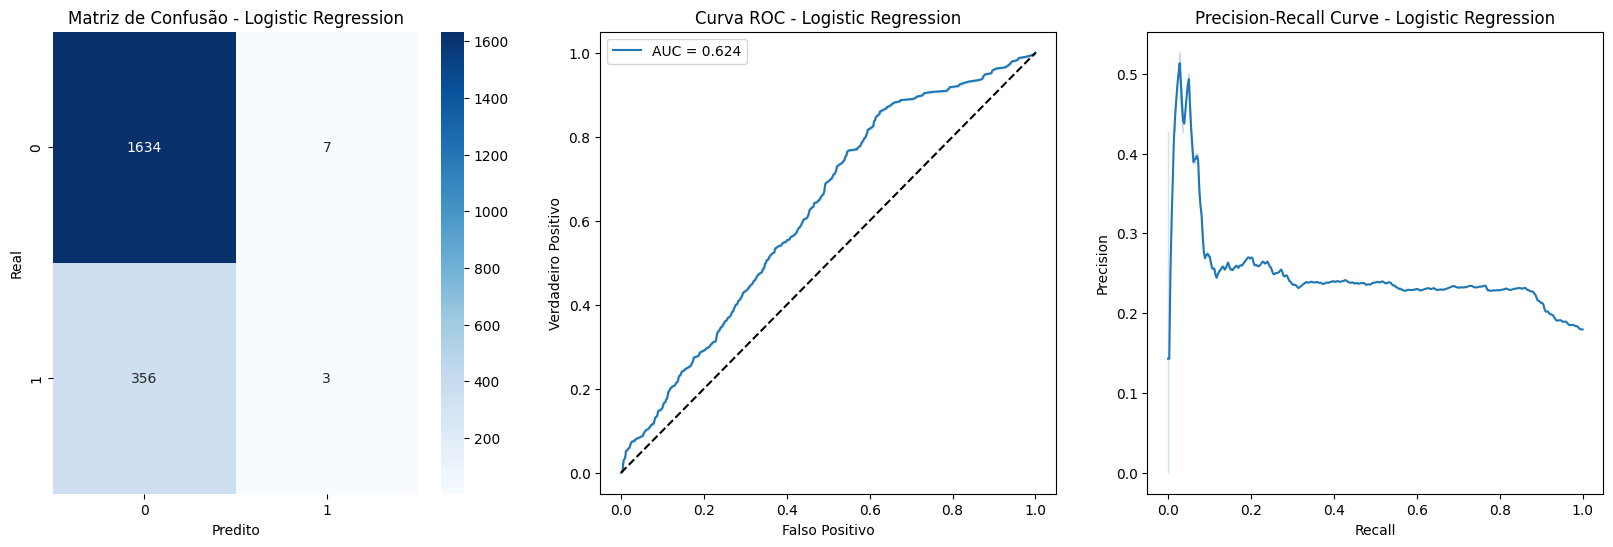

In [80]:
avaliar_modelo(lr_model, X_train_minmax, X_test_minmax, y_train, y_test, nome='Logistic Regression')

#### Hiperparamtros

##### GridSearchCV
    Testa todas as combinações de parâmetros que você definir.

In [81]:
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'], # use 'l1' se solver='liblinear'
    'solver': ['lbfgs']
}
# Grid
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_lr, cv=3, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train_minmax, y_train)
print("GridSearchCV LR:", grid_lr.best_params_)


/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/linear_model/_lin

GridSearchCV LR: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}



Logistic Regression (Grid)
              precision    recall  f1-score   support

         0.0      0.821     0.995     0.900      1641
         1.0      0.308     0.011     0.022       359

    accuracy                          0.818      2000
   macro avg      0.565     0.503     0.461      2000
weighted avg      0.729     0.818     0.742      2000



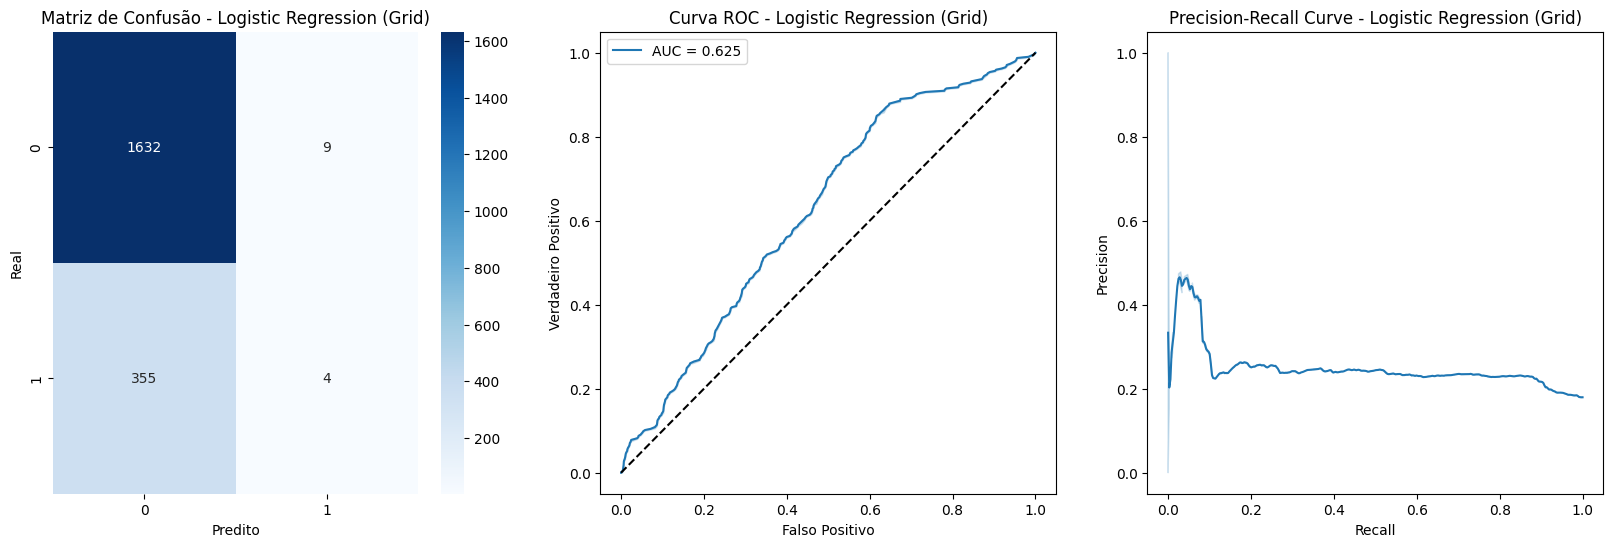

In [82]:
avaliar_modelo(grid_lr.best_estimator_, X_train_minmax, X_test_minmax, y_train, y_test, nome='Logistic Regression (Grid)')

##### RandomizedSearchCV
    Testa combinações aleatórias dos parâmetros (mais rápido quando tem muitas opções).

In [83]:

param_randomized_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'], # use 'l1' se solver='liblinear'
    'solver': ['lbfgs']
}
random_lr = RandomizedSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_randomized_lr, cv=3, scoring='f1', n_jobs=-1)
random_lr.fit(X_train_minmax, y_train)
print("RandomizedSearchCV LR:", random_lr.best_params_)

/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packag

RandomizedSearchCV LR: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}



Logistic Regression (Randomized)
              precision    recall  f1-score   support

         0.0      0.821     0.995     0.900      1641
         1.0      0.308     0.011     0.022       359

    accuracy                          0.818      2000
   macro avg      0.565     0.503     0.461      2000
weighted avg      0.729     0.818     0.742      2000



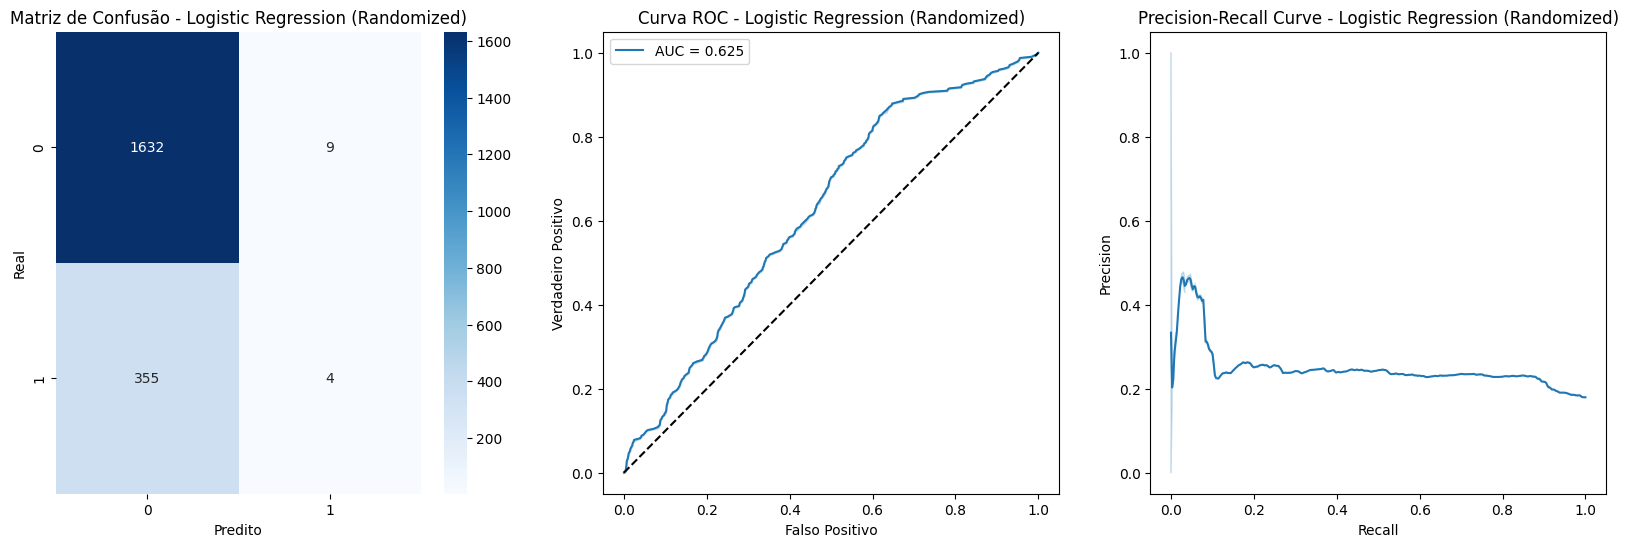

In [84]:
avaliar_modelo(random_lr.best_estimator_, X_train_minmax, X_test_minmax, y_train, y_test, nome='Logistic Regression (Randomized)')

##### Otimização bayesiana
    A otimização bayesiana é uma técnica baseada no teorema de Bayes, que descreve a probabilidade de ocorrência de um evento relacionado ao conhecimento atual

In [85]:
from skopt import BayesSearchCV
from sklearn.linear_model import LogisticRegression

search_spaces_lr = {
    'C': (0.001, 10.0, 'log-uniform'),
    'solver': ['lbfgs', 'liblinear'],
}
bayes_lr = BayesSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    search_spaces=search_spaces_lr,
    n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42
)
bayes_lr.fit(X_train_minmax, y_train)
print("BayesSearchCV LR:", bayes_lr.best_params_)

/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/util

BayesSearchCV LR: OrderedDict({'C': 6.6360850776123375, 'solver': 'liblinear'})



Logistic Regression (Bayes)
              precision    recall  f1-score   support

         0.0      0.821     0.995     0.900      1641
         1.0      0.273     0.008     0.016       359

    accuracy                          0.818      2000
   macro avg      0.547     0.502     0.458      2000
weighted avg      0.723     0.818     0.741      2000



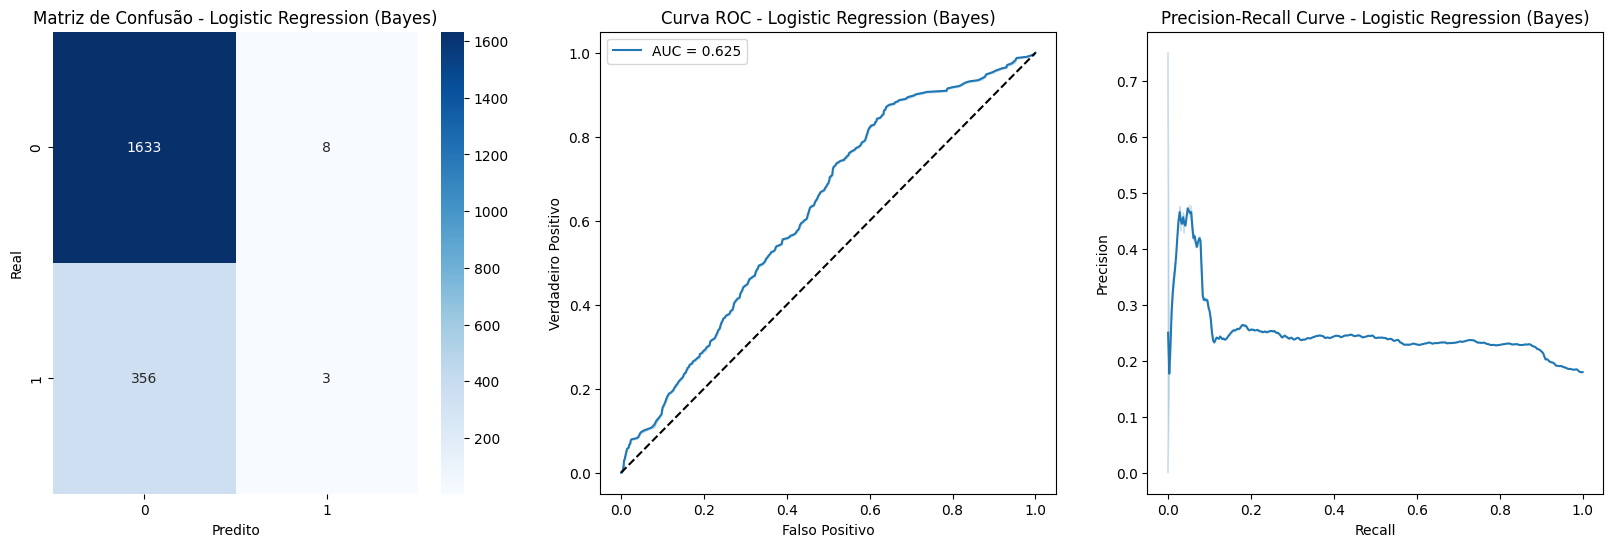

In [86]:
avaliar_modelo(bayes_lr.best_estimator_, X_train_minmax, X_test_minmax, y_train, y_test, nome='Logistic Regression (Bayes)')

##### Optuna
    é um dos frameworks mais modernos para hyperparameter tuning, super flexível e fácil de usar.
    Ele funciona diferente: você define uma função de objetivo, e o Optuna faz os testes.

In [87]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def objective_lr(trial):
    C = trial.suggest_loguniform('C', 0.001, 10.0)
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear'])
    model = LogisticRegression(C=C, solver=solver, max_iter=1000, random_state=42)
    score = cross_val_score(model, X_train_minmax, y_train, cv=3, scoring='f1').mean()
    return score

study_lr = optuna.create_study(direction='maximize')
study_lr.optimize(objective_lr, n_trials=10)
print("Optuna LR:", study_lr.best_params)
best_lr_optuna = LogisticRegression(**study_lr.best_params, max_iter=1000, random_state=42)
best_lr_optuna.fit(X_train_minmax, y_train)


[I 2025-07-15 14:24:45,657] A new study created in memory with name: no-name-113a7d14-b985-48cf-b0d2-836174d24ca6
[I 2025-07-15 14:24:45,692] Trial 0 finished with value: 0.0 and parameters: {'C': 0.0032873612035885964, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.0.
[I 2025-07-15 14:24:45,709] Trial 1 finished with value: 0.0 and parameters: {'C': 0.0033702906769983174, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.0.
[I 2025-07-15 14:24:45,822] Trial 2 finished with value: 0.01754280872352062 and parameters: {'C': 0.24179108407039304, 'solver': 'liblinear'}. Best is trial 2 with value: 0.01754280872352062.
[I 2025-07-15 14:24:45,858] Trial 3 finished with value: 0.0 and parameters: {'C': 0.012364909244207224, 'solver': 'liblinear'}. Best is trial 2 with value: 0.01754280872352062.
[I 2025-07-15 14:24:46,017] Trial 4 finished with value: 0.037272291165914434 and parameters: {'C': 9.488431536489719, 'solver': 'liblinear'}. Best is trial 4 with value: 0.037272291165914434.
[I 2

Optuna LR: {'C': 9.488431536489719, 'solver': 'liblinear'}


LogisticRegression(C=9.488431536489719, max_iter=1000, random_state=42,
                   solver='liblinear')


Logistic Regression (Optuna)
              precision    recall  f1-score   support

         0.0      0.821     0.995     0.899      1641
         1.0      0.250     0.008     0.016       359

    accuracy                          0.818      2000
   macro avg      0.535     0.501     0.458      2000
weighted avg      0.718     0.818     0.741      2000



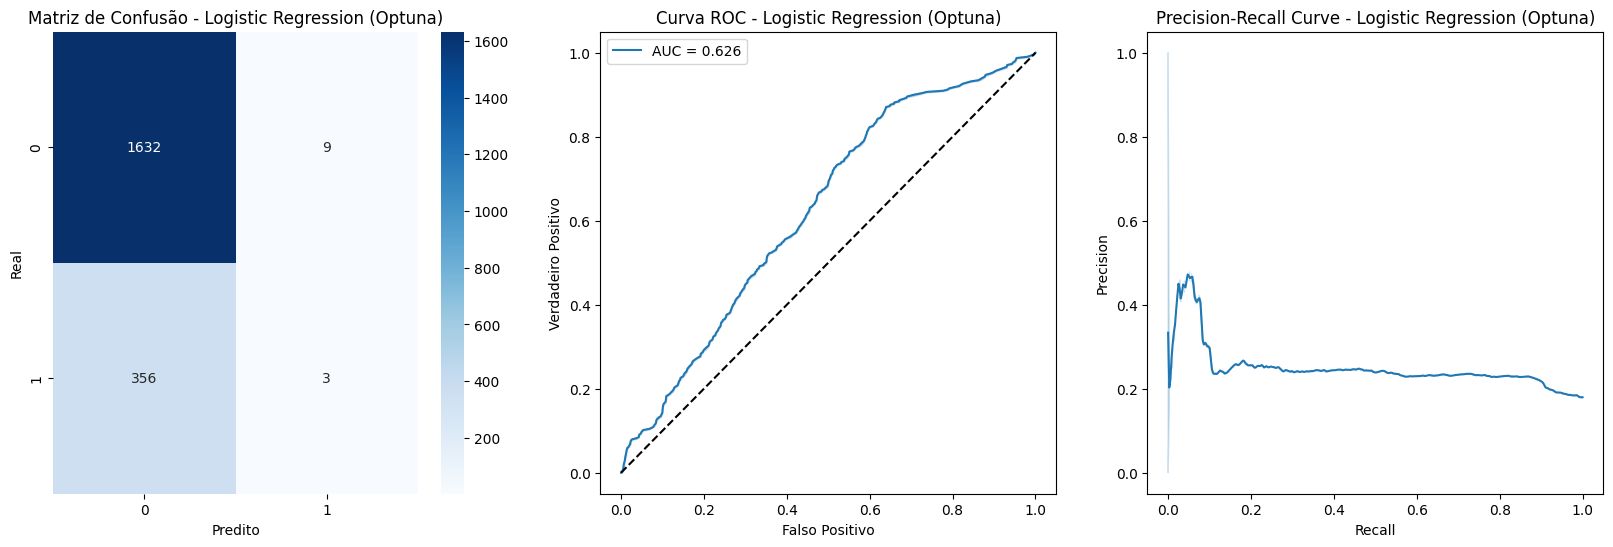

In [88]:
avaliar_modelo(best_lr_optuna, X_train_minmax, X_test_minmax, y_train, y_test, nome='Logistic Regression (Optuna)')

### Decision Tree Classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)


Decision Tree
              precision    recall  f1-score   support

         0.0      0.827     0.804     0.815      1641
         1.0      0.205     0.231     0.217       359

    accuracy                          0.701      2000
   macro avg      0.516     0.517     0.516      2000
weighted avg      0.715     0.701     0.708      2000



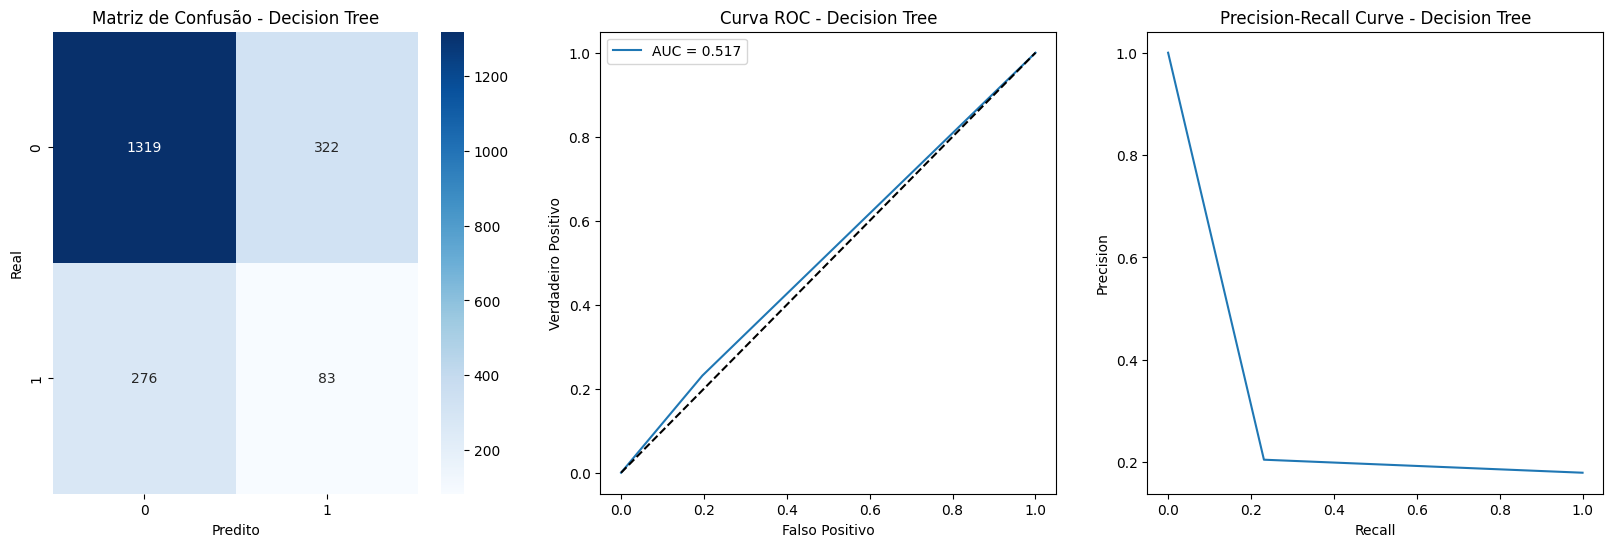

In [90]:
avaliar_modelo(dt_model, X_train_minmax, X_test_minmax, y_train, y_test, nome='Decision Tree')

#### Hiperparamtros

##### GridSearchCV
    Testa todas as combinações de parâmetros que você definir.

In [91]:
param_grid_dt = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, scoring='f1', n_jobs=-1)
grid_dt.fit(X_train_minmax, y_train)
print("GridSearchCV DT:", grid_dt.best_params_)

GridSearchCV DT: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5}



Decision Tree (Grid)
              precision    recall  f1-score   support

         0.0      0.826     0.823     0.825      1641
         1.0      0.203     0.206     0.205       359

    accuracy                          0.713      2000
   macro avg      0.515     0.515     0.515      2000
weighted avg      0.714     0.713     0.713      2000



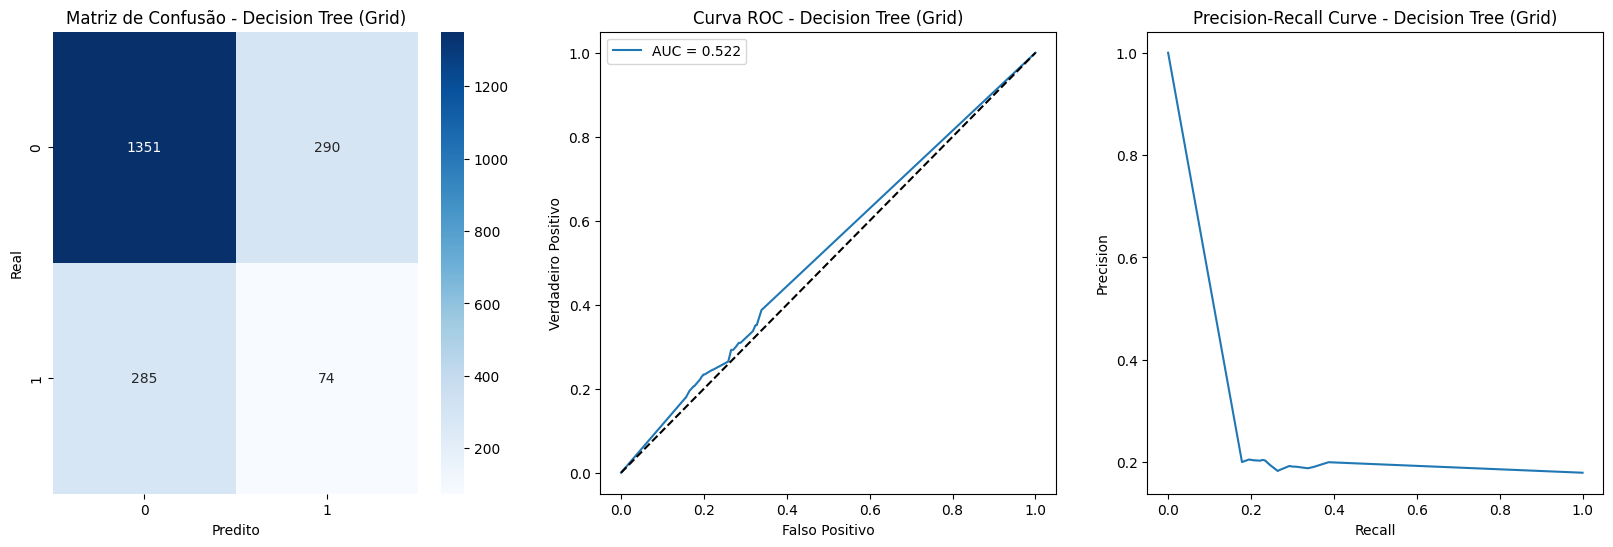

In [92]:
avaliar_modelo(grid_dt.best_estimator_, X_train_minmax, X_test_minmax, y_train, y_test, nome='Decision Tree (Grid)')

##### RandomizedSearchCV
    Testa combinações aleatórias dos parâmetros (mais rápido quando tem muitas opções).

In [93]:
param_dist_dt = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rnd_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_dist_dt, cv=3, scoring='f1', n_jobs=-1)
rnd_dt.fit(X_train_minmax, y_train)
print("RandomizedSearchCV DT:", rnd_dt.best_params_)

RandomizedSearchCV DT: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}



Decision Tree (Randomized)
              precision    recall  f1-score   support

         0.0      0.826     0.823     0.825      1641
         1.0      0.203     0.206     0.205       359

    accuracy                          0.713      2000
   macro avg      0.515     0.515     0.515      2000
weighted avg      0.714     0.713     0.713      2000



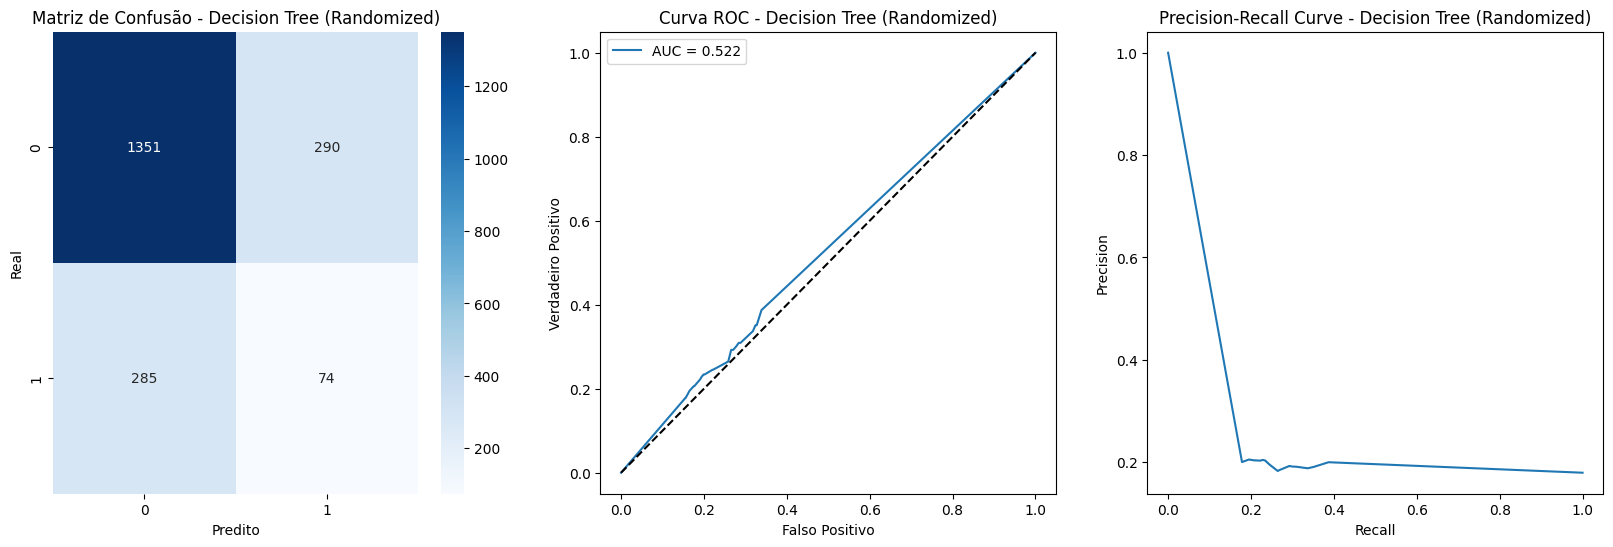

In [94]:
avaliar_modelo(rnd_dt.best_estimator_, X_train_minmax, X_test_minmax, y_train, y_test, nome='Decision Tree (Randomized)')

##### Otimização bayesiana
    A otimização bayesiana é uma técnica baseada no teorema de Bayes, que descreve a probabilidade de ocorrência de um evento relacionado ao conhecimento atual

In [95]:
from skopt import BayesSearchCV

search_spaces_dt = {
    'max_depth': (3, 20),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}
bayes_dt = BayesSearchCV(
    DecisionTreeClassifier(random_state=42),
    search_spaces=search_spaces_dt,
    n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42
)
bayes_dt.fit(X_train_minmax, y_train)
print("BayesSearchCV DT:", bayes_dt.best_params_)

BayesSearchCV DT: OrderedDict({'max_depth': 17, 'min_samples_leaf': 4, 'min_samples_split': 4})



Decision Tree (Bayes)
              precision    recall  f1-score   support

         0.0      0.821     0.862     0.841      1641
         1.0      0.183     0.142     0.160       359

    accuracy                          0.733      2000
   macro avg      0.502     0.502     0.501      2000
weighted avg      0.707     0.733     0.719      2000



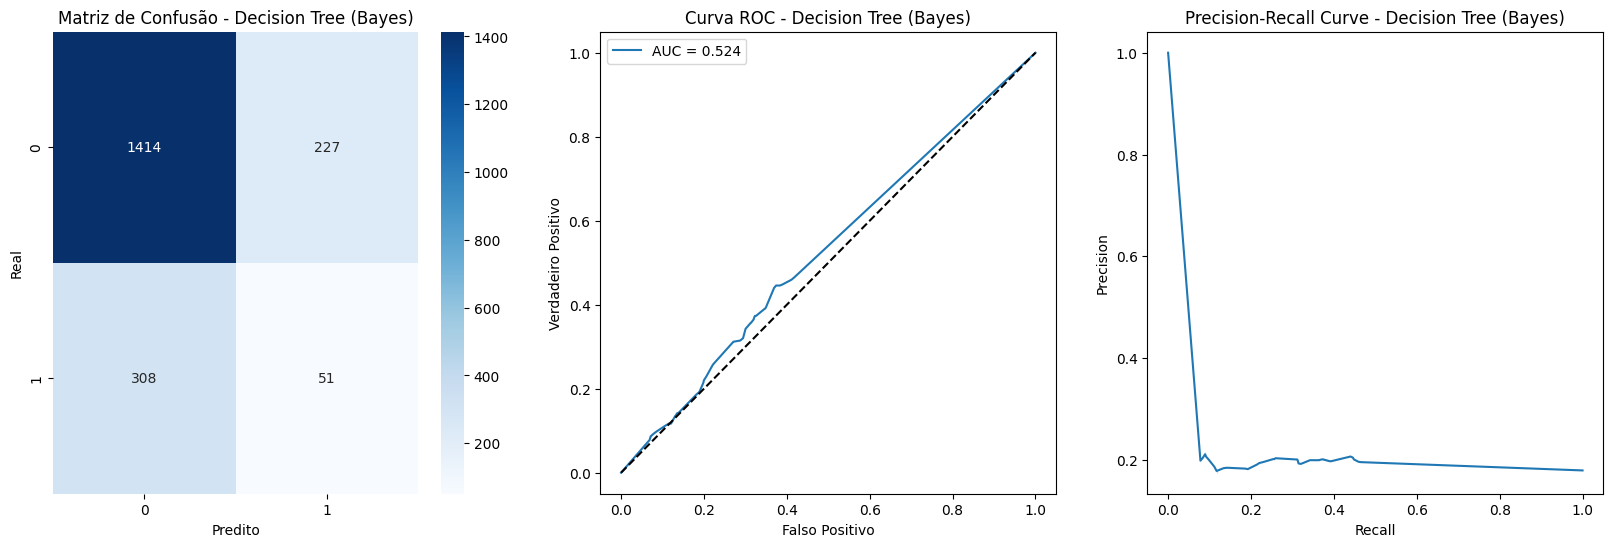

In [96]:
avaliar_modelo(bayes_dt.best_estimator_, X_train_minmax, X_test_minmax, y_train, y_test, nome='Decision Tree (Bayes)')

##### Optuna
    é um dos frameworks mais modernos para hyperparameter tuning, super flexível e fácil de usar.
    Ele funciona diferente: você define uma função de objetivo, e o Optuna faz os testes.

In [97]:
def objective_dt(trial):
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    score = cross_val_score(model, X_train_minmax, y_train, cv=3, scoring='f1').mean()
    return score

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=10)
print("Optuna DT:", study_dt.best_params)
best_dt_optuna = DecisionTreeClassifier(**study_dt.best_params, random_state=42)
best_dt_optuna.fit(X_train_minmax, y_train)

[I 2025-07-15 14:26:43,036] A new study created in memory with name: no-name-8292d662-4f8e-44fb-b33c-85d0b2fec313
[I 2025-07-15 14:26:43,250] Trial 0 finished with value: 0.14158742977599317 and parameters: {'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.14158742977599317.
[I 2025-07-15 14:26:43,491] Trial 1 finished with value: 0.1822603119630947 and parameters: {'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.1822603119630947.
[I 2025-07-15 14:26:43,637] Trial 2 finished with value: 0.07404020295574106 and parameters: {'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.1822603119630947.
[I 2025-07-15 14:26:43,847] Trial 3 finished with value: 0.1366470075244083 and parameters: {'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.1822603119630947.
[I 2025-07-15 14:26:43,948] Trial 4 finished with value: 0.06

Optuna DT: {'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 4}


DecisionTreeClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=7,
                       random_state=42)


Decision Tree (Optuna)
              precision    recall  f1-score   support

         0.0      0.822     0.874     0.847      1641
         1.0      0.191     0.136     0.159       359

    accuracy                          0.742      2000
   macro avg      0.507     0.505     0.503      2000
weighted avg      0.709     0.742     0.724      2000



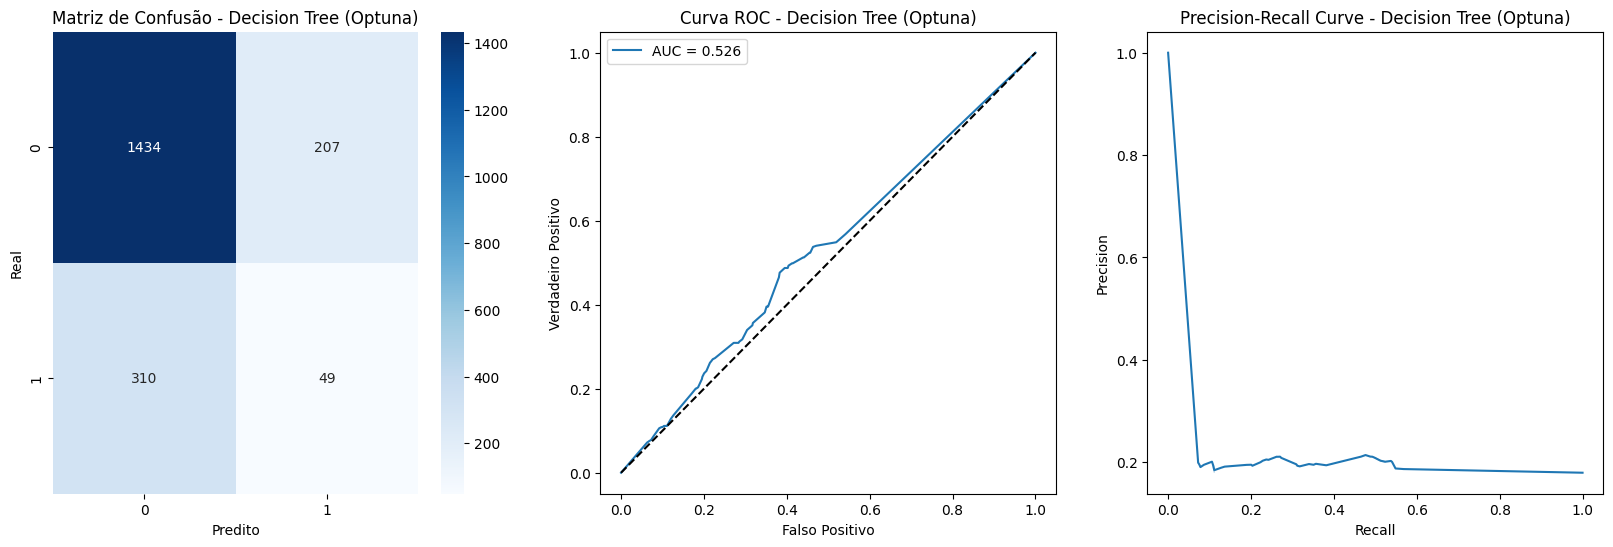

In [98]:
avaliar_modelo(best_dt_optuna, X_train_minmax, X_test_minmax, y_train, y_test, nome='Decision Tree (Optuna)')

### K-Nearest Neighbors (KNN)

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)


KNN
              precision    recall  f1-score   support

         0.0      0.820     0.959     0.884      1641
         1.0      0.163     0.036     0.059       359

    accuracy                          0.793      2000
   macro avg      0.491     0.498     0.472      2000
weighted avg      0.702     0.793     0.736      2000



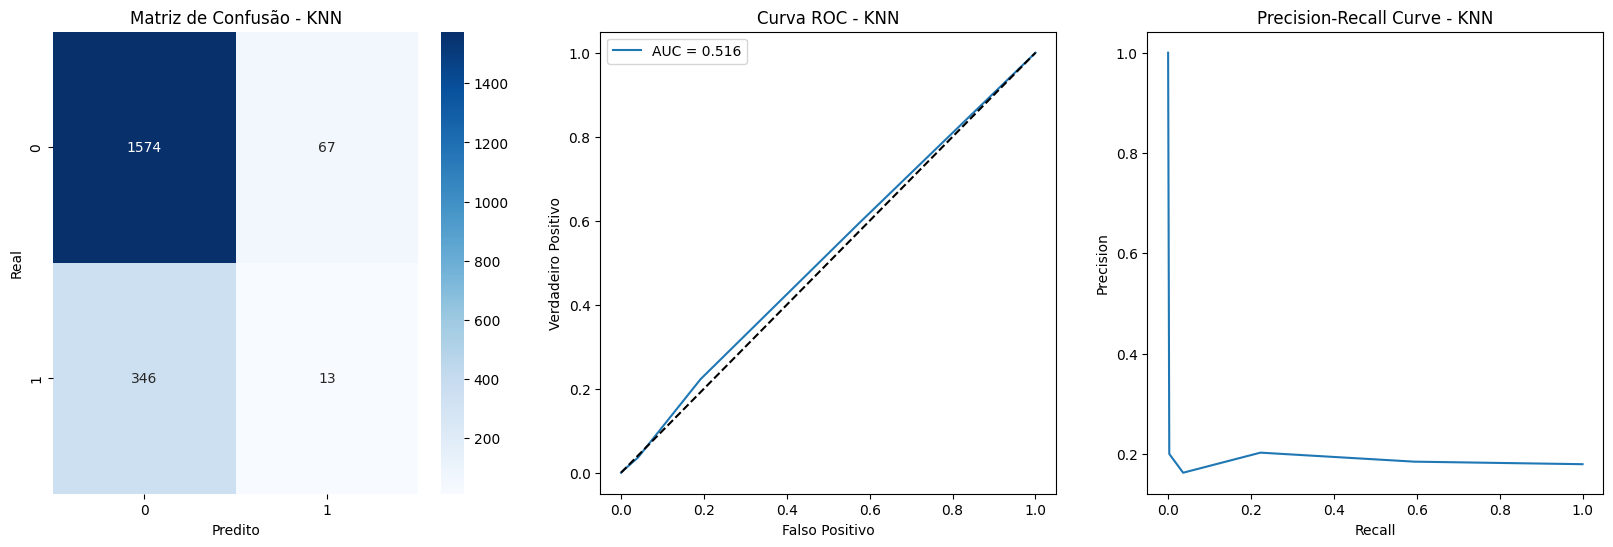

In [100]:
avaliar_modelo(knn_model, X_train_minmax, X_test_minmax, y_train, y_test, nome='KNN')

#### Hiperparamtros

##### GridSearchCV
    Testa todas as combinações de parâmetros que você definir.

In [101]:
param_grid_knn = {
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] # 1=Manhattan, 2=Euclidiana
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train_minmax, y_train)
print("GridSearchCV KNN:", grid_knn.best_params_)

GridSearchCV KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}



KNN (Grid)
              precision    recall  f1-score   support

         0.0      0.823     0.921     0.869      1641
         1.0      0.209     0.095     0.130       359

    accuracy                          0.773      2000
   macro avg      0.516     0.508     0.500      2000
weighted avg      0.713     0.773     0.737      2000



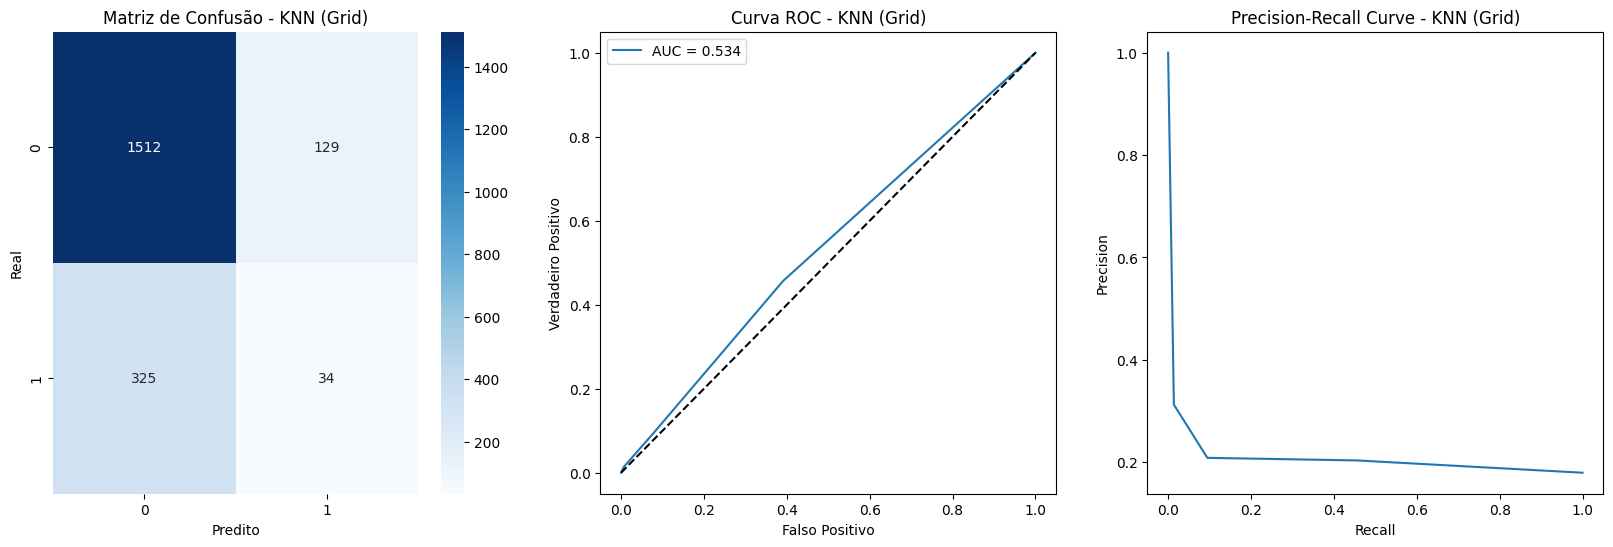

In [102]:
avaliar_modelo(grid_knn.best_estimator_, X_train_minmax, X_test_minmax, y_train, y_test, nome='KNN (Grid)')

##### RandomizedSearchCV
    Testa combinações aleatórias dos parâmetros (mais rápido quando tem muitas opções).

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist_knn = {
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
rnd_knn = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_dist_knn,
    n_iter=6, cv=3, scoring='f1', n_jobs=-1
)
rnd_knn.fit(X_train_minmax, y_train)
print("RandomizedSearchCV KNN:", rnd_knn.best_params_)

RandomizedSearchCV KNN: {'weights': 'distance', 'p': 1, 'n_neighbors': 3}



KNN (Random)
              precision    recall  f1-score   support

         0.0      0.823     0.921     0.869      1641
         1.0      0.209     0.095     0.130       359

    accuracy                          0.773      2000
   macro avg      0.516     0.508     0.500      2000
weighted avg      0.713     0.773     0.737      2000



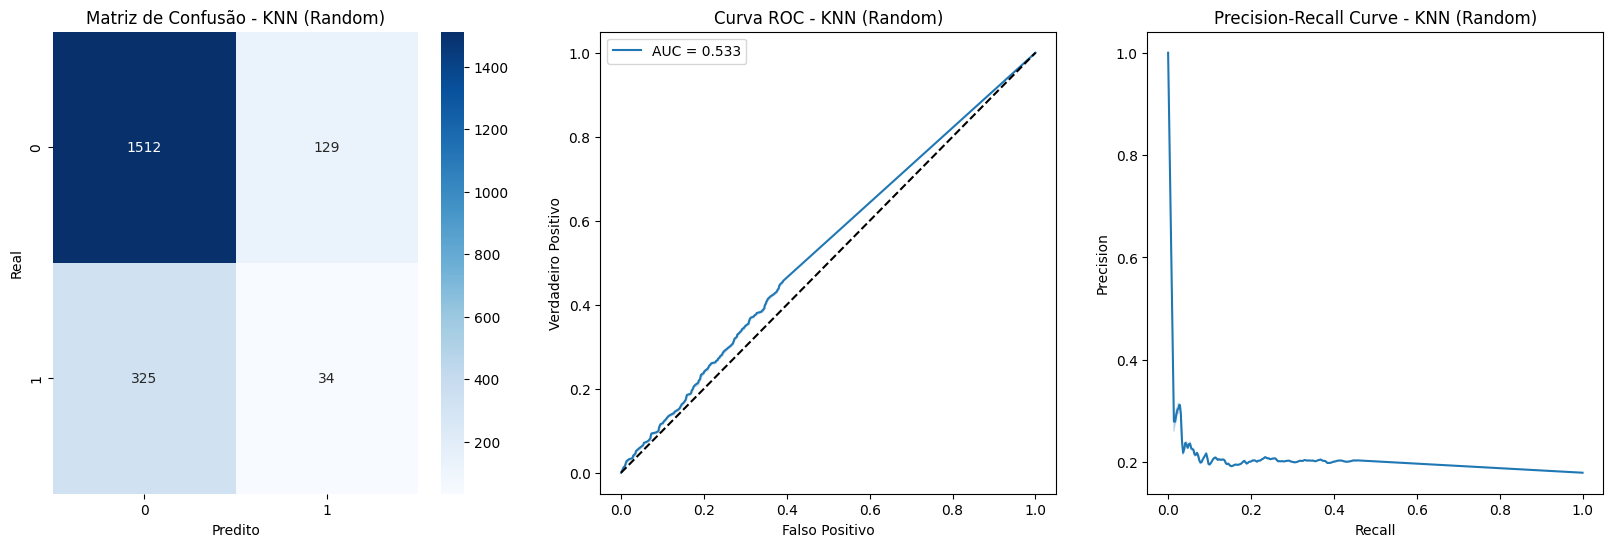

In [104]:
avaliar_modelo(rnd_knn.best_estimator_, X_train_minmax, X_test_minmax, y_train, y_test, nome='KNN (Random)')

##### Otimização bayesiana
    A otimização bayesiana é uma técnica baseada no teorema de Bayes, que descreve a probabilidade de ocorrência de um evento relacionado ao conhecimento atual

In [105]:
from skopt import BayesSearchCV

search_spaces_knn = {
    'n_neighbors': (3, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
bayes_knn = BayesSearchCV(
    KNeighborsClassifier(),
    search_spaces=search_spaces_knn,
    n_iter=8, cv=3, scoring='f1', n_jobs=-1, random_state=42
)
bayes_knn.fit(X_train_minmax, y_train)
print("BayesSearchCV KNN:", bayes_knn.best_params_)


BayesSearchCV KNN: OrderedDict({'n_neighbors': 10, 'p': 2, 'weights': 'distance'})



KNN (Bayes)
              precision    recall  f1-score   support

         0.0      0.822     0.990     0.898      1641
         1.0      0.304     0.019     0.037       359

    accuracy                          0.816      2000
   macro avg      0.563     0.505     0.467      2000
weighted avg      0.729     0.816     0.744      2000



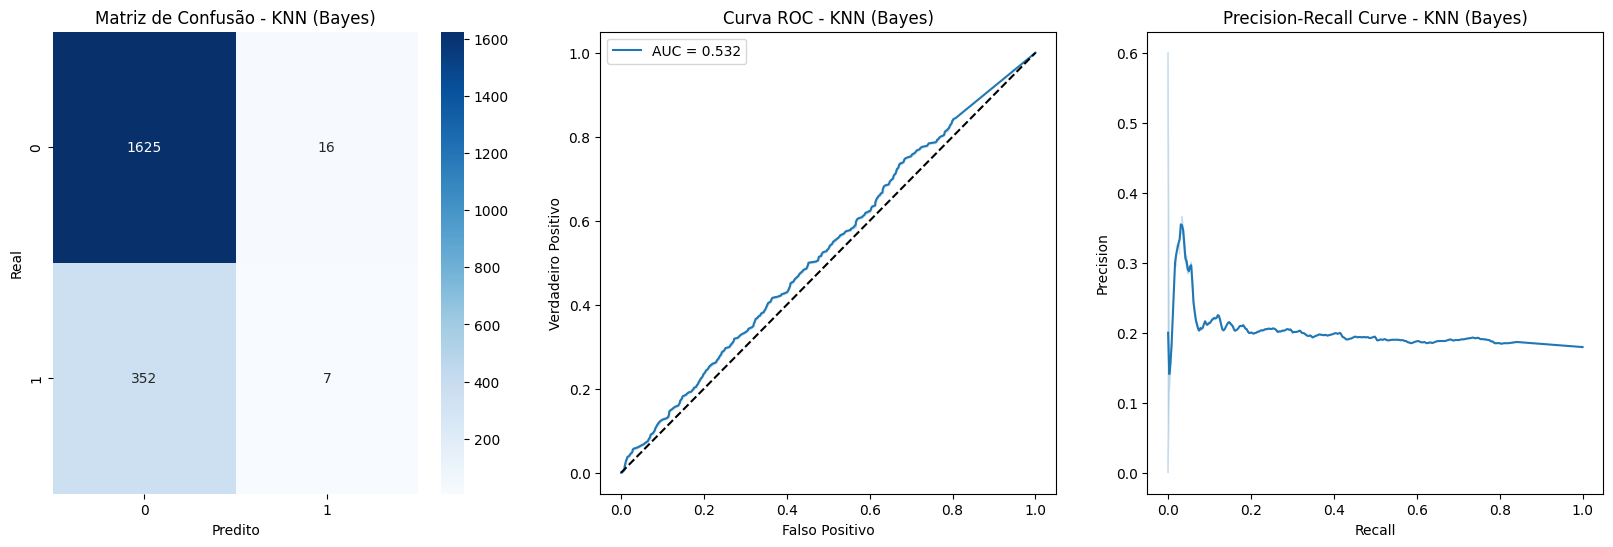

In [106]:
avaliar_modelo(bayes_knn.best_estimator_, X_train_minmax, X_test_minmax, y_train, y_test, nome='KNN (Bayes)')

##### Optuna
    é um dos frameworks mais modernos para hyperparameter tuning, super flexível e fácil de usar.
    Ele funciona diferente: você define uma função de objetivo, e o Optuna faz os testes.

In [107]:
def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 3, 20)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    p = trial.suggest_int('p', 1, 2)
    model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        p=p
    )
    score = cross_val_score(model, X_train_minmax, y_train, cv=3, scoring='f1').mean()
    return score

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=8)
print("Optuna KNN:", study_knn.best_params)
best_knn_optuna = KNeighborsClassifier(**study_knn.best_params)
best_knn_optuna.fit(X_train_minmax, y_train)

[I 2025-07-15 14:28:18,283] A new study created in memory with name: no-name-df574347-11a5-47a7-9be2-b59be4f45336
[I 2025-07-15 14:28:18,393] Trial 0 finished with value: 0.02627784175199444 and parameters: {'n_neighbors': 10, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 0.02627784175199444.
[I 2025-07-15 14:28:18,663] Trial 1 finished with value: 0.008230522655491327 and parameters: {'n_neighbors': 17, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.02627784175199444.
[I 2025-07-15 14:28:18,728] Trial 2 finished with value: 0.08892133650287636 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'p': 2}. Best is trial 2 with value: 0.08892133650287636.
[I 2025-07-15 14:28:18,963] Trial 3 finished with value: 0.03849689226562409 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'p': 1}. Best is trial 2 with value: 0.08892133650287636.
[I 2025-07-15 14:28:19,204] Trial 4 finished with value: 0.00824460603349145 and parameters: {'n_neighbors': 18,

Optuna KNN: {'n_neighbors': 6, 'weights': 'distance', 'p': 2}


KNeighborsClassifier(n_neighbors=6, weights='distance')


KNN (Optuna)
              precision    recall  f1-score   support

         0.0      0.822     0.959     0.885      1641
         1.0      0.202     0.047     0.077       359

    accuracy                          0.795      2000
   macro avg      0.512     0.503     0.481      2000
weighted avg      0.710     0.795     0.740      2000



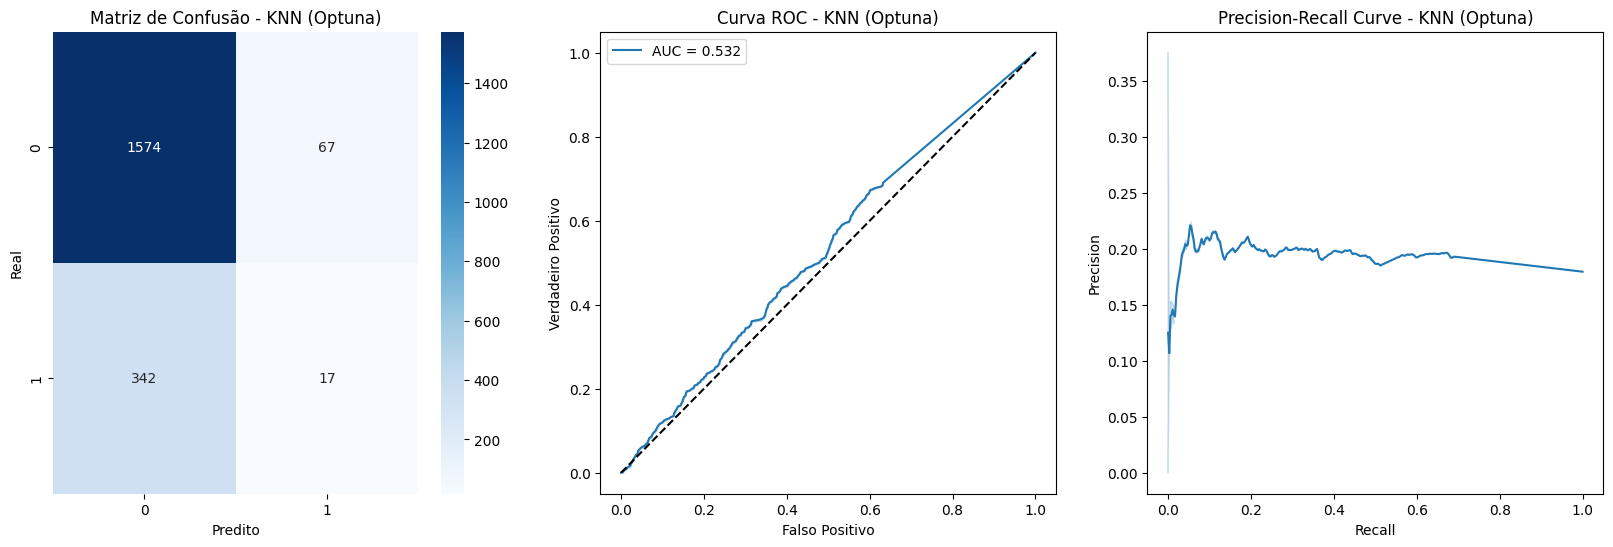

In [108]:
avaliar_modelo(best_knn_optuna, X_train_minmax, X_test_minmax, y_train, y_test, nome='KNN (Optuna)')

### Comparando varios de uma vez

In [45]:
def tune_model(model, search_type, param_grid, X, y, n_iter=20, scoring='f1'):
    """
    search_type: 'grid', 'random', 'bayes', 'optuna'
    """
    if search_type == 'grid':
        search = GridSearchCV(model, param_grid, cv=3, scoring=scoring, n_jobs=-1)
        search.fit(X, y)
        best = search.best_estimator_
        best_score = search.best_score_
        best_params = search.best_params_
    elif search_type == 'random':
        search = RandomizedSearchCV(model, param_grid, n_iter=n_iter, cv=3, scoring=scoring, n_jobs=-1, random_state=42)
        search.fit(X, y)
        best = search.best_estimator_
        best_score = search.best_score_
        best_params = search.best_params_
    elif search_type == 'bayes':
        search = BayesSearchCV(model, param_grid, n_iter=n_iter, cv=3, scoring=scoring, n_jobs=-1, random_state=42)
        search.fit(X, y)
        best = search.best_estimator_
        best_score = search.best_score_
        best_params = search.best_params_
    elif search_type == 'optuna':
        def objective(trial):
            param_suggest = {}
            for param, space in param_grid.items():
                if isinstance(space, tuple) and len(space) == 3 and space[2] == 'log-uniform':
                    param_suggest[param] = trial.suggest_loguniform(param, space[0], space[1])
                elif isinstance(space, tuple) and len(space) == 2 and isinstance(space[0], float):
                    param_suggest[param] = trial.suggest_uniform(param, space[0], space[1])
                elif isinstance(space, tuple) and len(space) == 2 and isinstance(space[0], int):
                    param_suggest[param] = trial.suggest_int(param, space[0], space[1])
                elif isinstance(space, list):
                    param_suggest[param] = trial.suggest_categorical(param, space)
                else:
                    raise ValueError("Tipo de espaço de busca não suportado.")
            model.set_params(**param_suggest)
            return cross_val_score(model, X, y, cv=3, scoring=scoring).mean()
        study = optuna.create_study(direction='maximize')
        study.optimize(objective, n_trials=n_iter)
        best_params = study.best_params
        model.set_params(**best_params)
        best = model.fit(X, y)
        best_score = cross_val_score(model, X, y, cv=3, scoring=scoring).mean()
    else:
        raise ValueError('Tipo de busca não reconhecido!')
    return best, best_params, best_score
    

In [46]:
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')

Rodando Random Forest - random

Random Forest_random
              precision    recall  f1-score   support

         0.0      0.824     1.000     0.903      8236
         1.0      0.000     0.000     0.000      1764

    accuracy                          0.824     10000
   macro avg      0.412     0.500     0.452     10000
weighted avg      0.678     0.824     0.744     10000



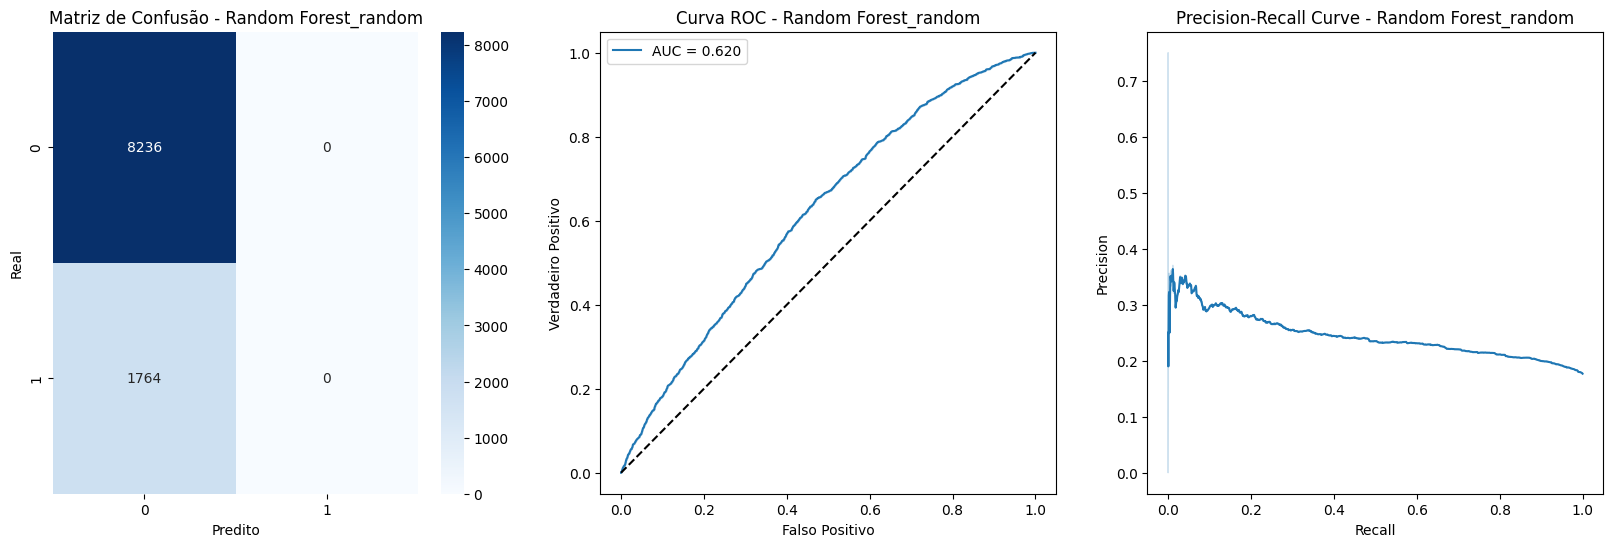

Rodando Random Forest - bayes

Random Forest_bayes
              precision    recall  f1-score   support

         0.0      0.824     1.000     0.903      8236
         1.0      0.000     0.000     0.000      1764

    accuracy                          0.824     10000
   macro avg      0.412     0.500     0.452     10000
weighted avg      0.678     0.824     0.744     10000



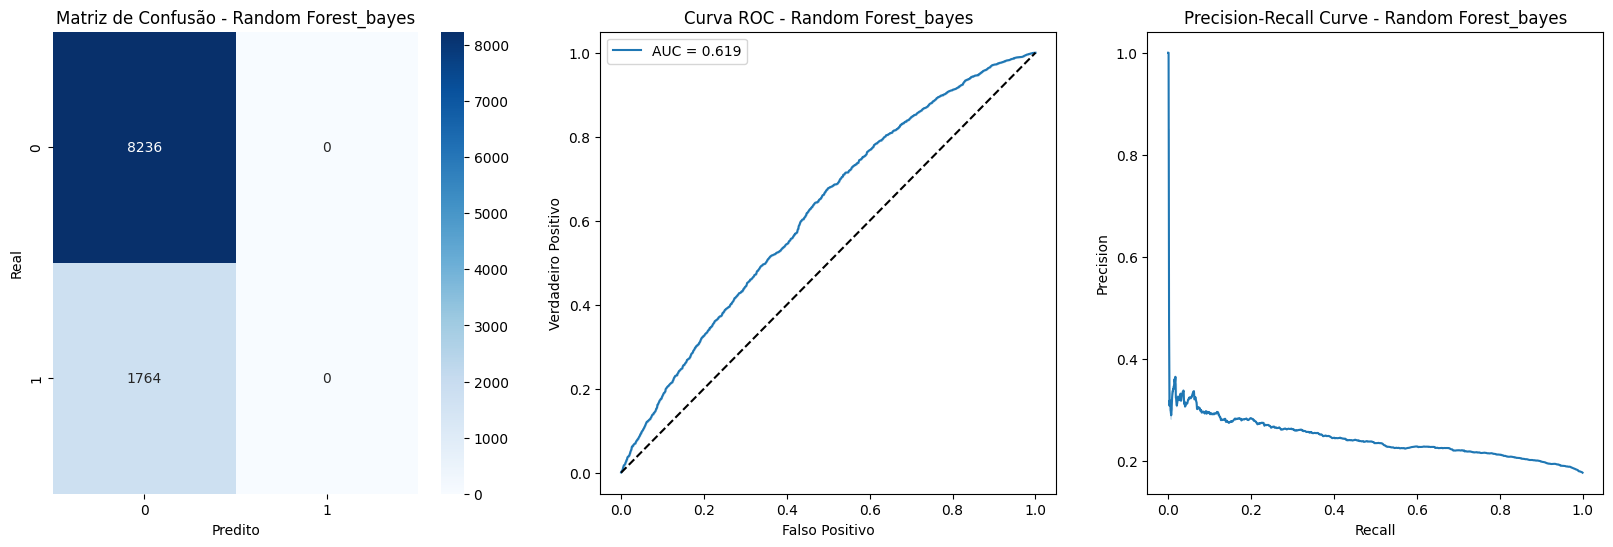

[I 2025-07-15 18:59:09,206] A new study created in memory with name: no-name-2549074f-0974-4fca-833a-9847035e8c77


Rodando Random Forest - optuna


[I 2025-07-15 18:59:35,619] Trial 0 finished with value: 0.8393666173526707 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 5}. Best is trial 0 with value: 0.8393666173526707.
[I 2025-07-15 19:00:28,780] Trial 1 finished with value: 0.8404997157962267 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10}. Best is trial 1 with value: 0.8404997157962267.
[I 2025-07-15 19:00:41,468] Trial 2 finished with value: 0.8008455962676075 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 10}. Best is trial 1 with value: 0.8404997157962267.
[I 2025-07-15 19:01:01,511] Trial 3 finished with value: 0.8386162101125575 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}. Best is trial 1 with value: 0.8404997157962267.
[I 2025-07-15 19:01:28,210] Trial 4 finished with value: 0.8033677382903212 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 2}. Best is trial 1 with value: 


Random Forest_optuna
              precision    recall  f1-score   support

         0.0      0.824     1.000     0.903      8236
         1.0      0.000     0.000     0.000      1764

    accuracy                          0.824     10000
   macro avg      0.412     0.500     0.452     10000
weighted avg      0.678     0.824     0.744     10000



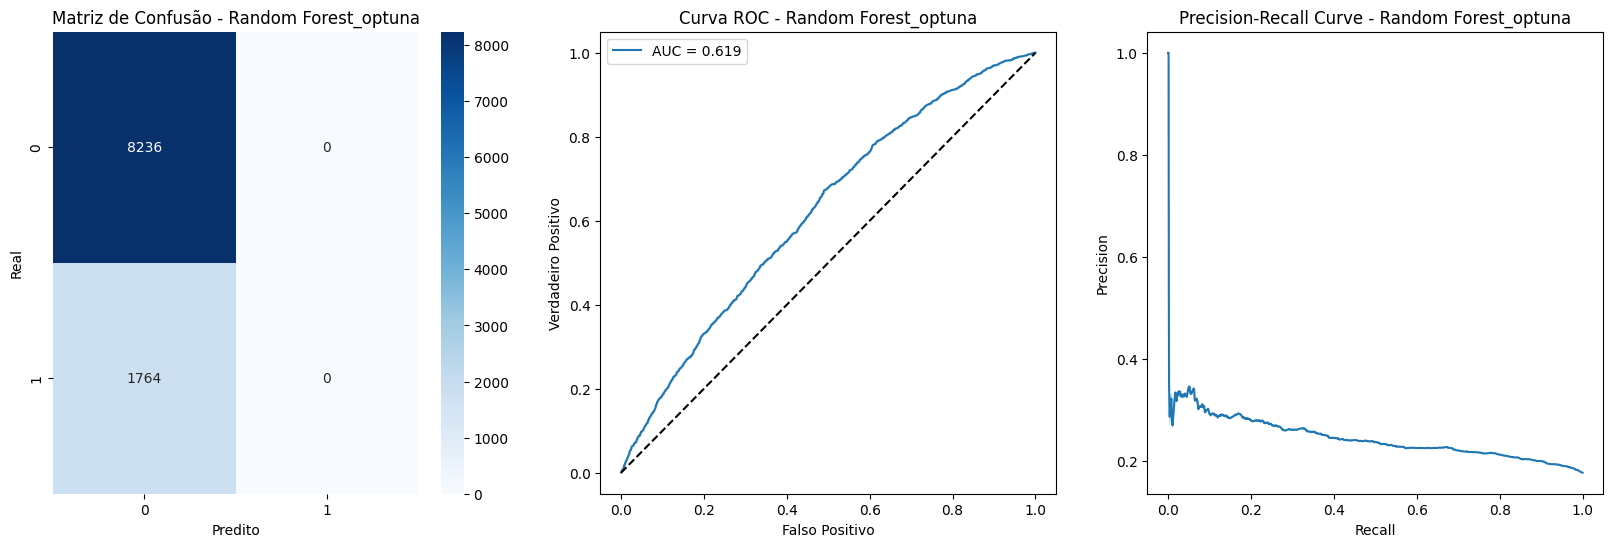

Rodando Logistic Regression - random


/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packag


Logistic Regression_random
              precision    recall  f1-score   support

         0.0      0.876     0.558     0.682      8236
         1.0      0.235     0.633     0.342      1764

    accuracy                          0.571     10000
   macro avg      0.556     0.595     0.512     10000
weighted avg      0.763     0.571     0.622     10000



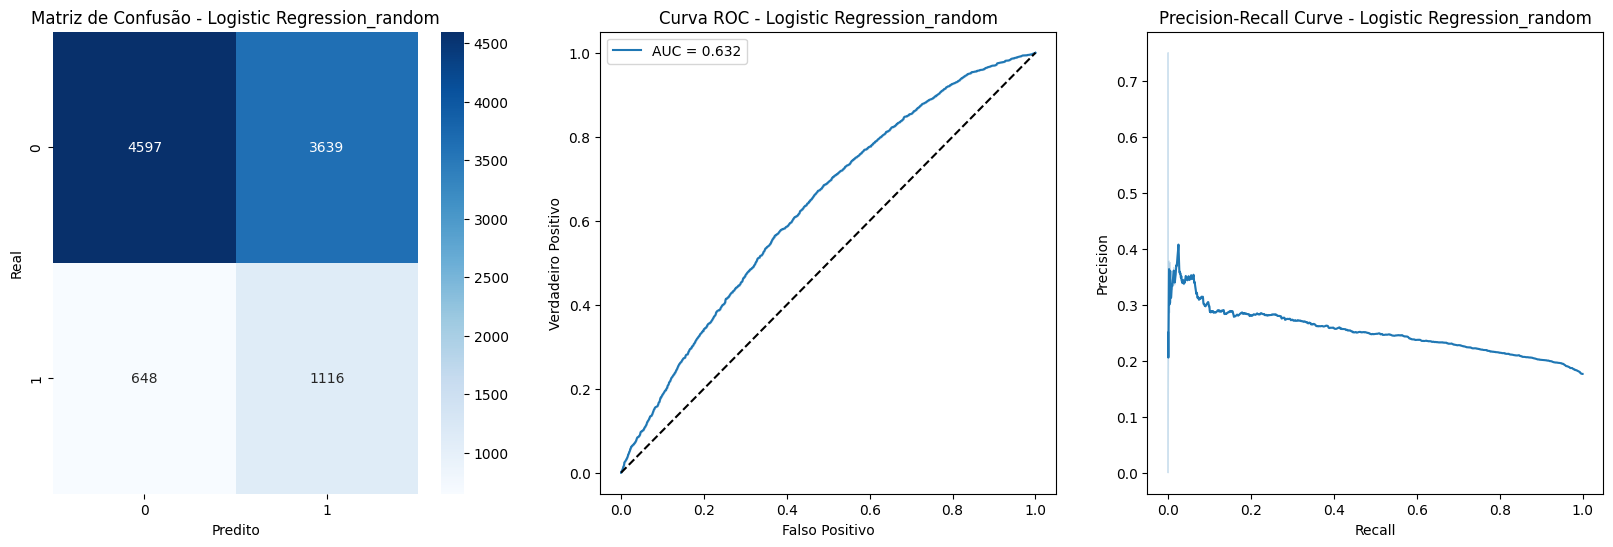

Rodando Logistic Regression - bayes


/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/sklearn/util


Logistic Regression_bayes
              precision    recall  f1-score   support

         0.0      0.874     0.570     0.690      8236
         1.0      0.235     0.617     0.341      1764

    accuracy                          0.579     10000
   macro avg      0.555     0.594     0.516     10000
weighted avg      0.762     0.579     0.629     10000



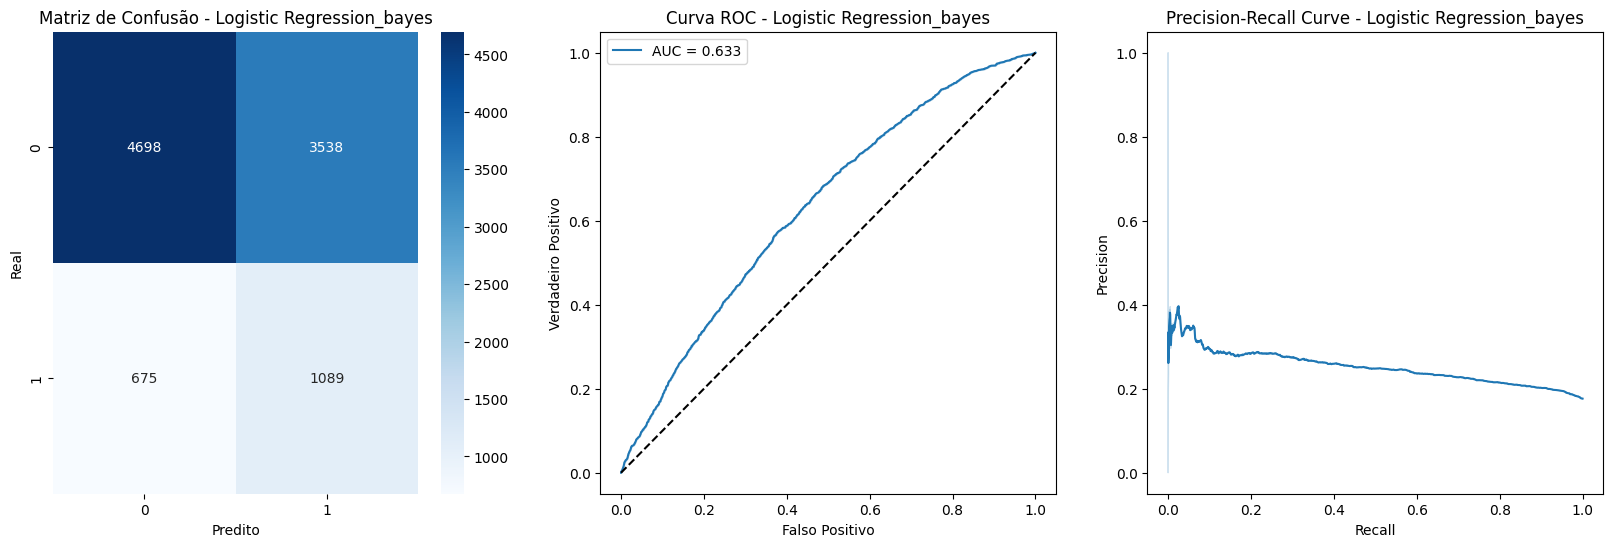

[I 2025-07-15 19:06:24,150] A new study created in memory with name: no-name-e627b3f7-777c-4d92-81ef-3c6aa0a06bce


Rodando Logistic Regression - optuna


[I 2025-07-15 19:06:24,698] Trial 0 finished with value: 0.6205544256436506 and parameters: {'C': 0.008084015662457231, 'solver': 'liblinear'}. Best is trial 0 with value: 0.6205544256436506.
[I 2025-07-15 19:06:25,690] Trial 1 finished with value: 0.6281329521809348 and parameters: {'C': 0.21278036696183666, 'solver': 'liblinear'}. Best is trial 1 with value: 0.6281329521809348.
[I 2025-07-15 19:06:25,907] Trial 2 finished with value: 0.6217800101107157 and parameters: {'C': 0.003666637197905271, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.6281329521809348.
[I 2025-07-15 19:06:26,474] Trial 3 finished with value: 0.6295219935891222 and parameters: {'C': 0.8571922390052277, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.6295219935891222.
[I 2025-07-15 19:06:26,610] Trial 4 finished with value: 0.6156879182455306 and parameters: {'C': 0.001106138547888017, 'solver': 'lbfgs'}. Best is trial 3 with value: 0.6295219935891222.
[I 2025-07-15 19:06:26,992] Trial 5 finished with value


Logistic Regression_optuna
              precision    recall  f1-score   support

         0.0      0.873     0.586     0.701      8236
         1.0      0.237     0.601     0.340      1764

    accuracy                          0.589     10000
   macro avg      0.555     0.594     0.521     10000
weighted avg      0.761     0.589     0.638     10000



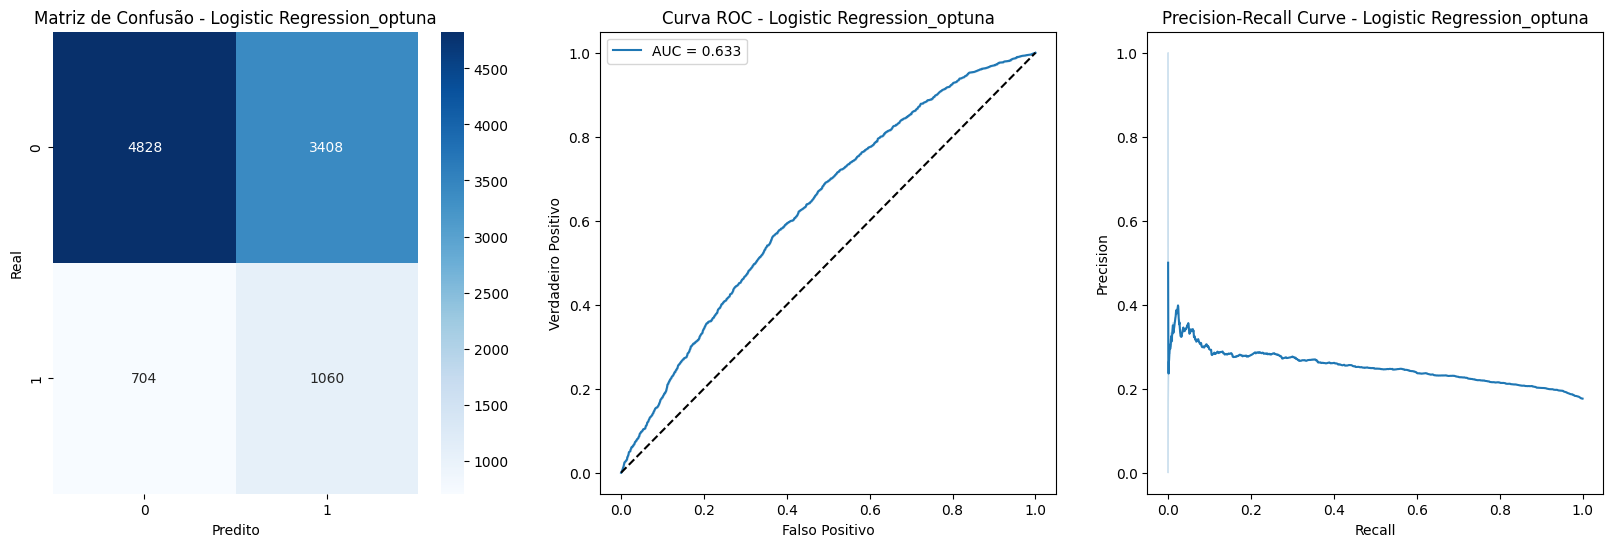

Rodando Decision Tree - random

Decision Tree_random
              precision    recall  f1-score   support

         0.0      0.829     0.872     0.850      8236
         1.0      0.209     0.158     0.180      1764

    accuracy                          0.746     10000
   macro avg      0.519     0.515     0.515     10000
weighted avg      0.719     0.746     0.731     10000



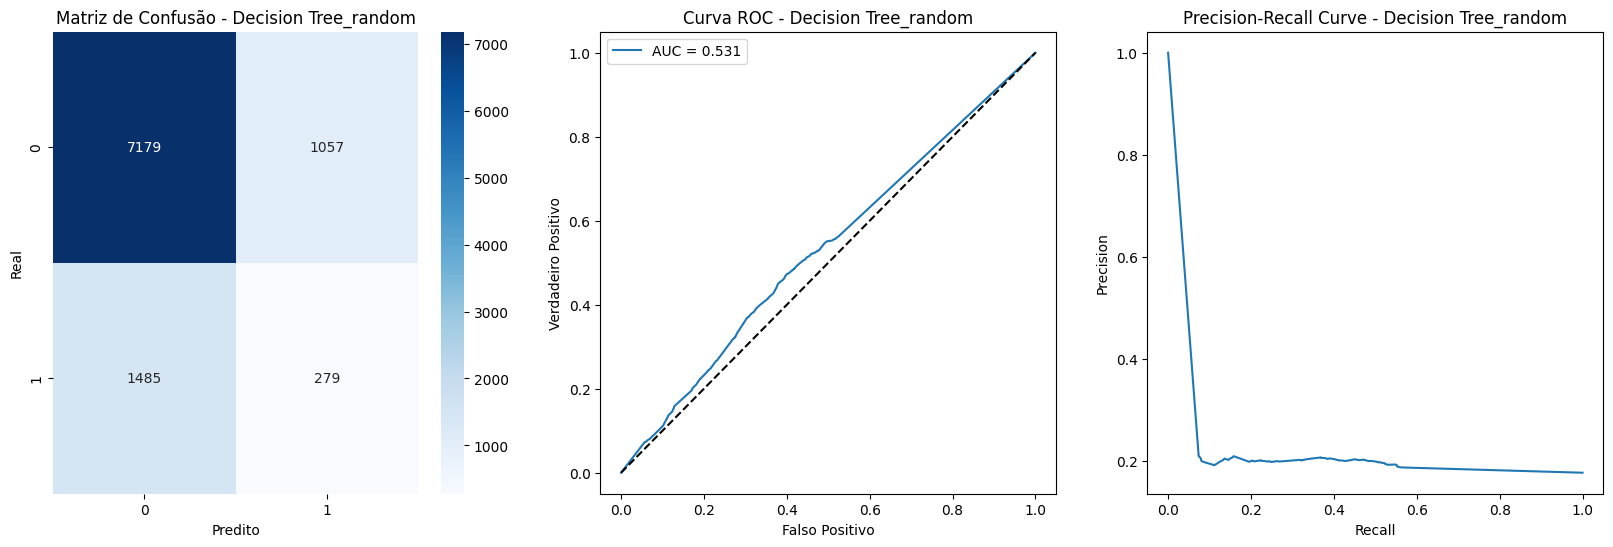

Rodando Decision Tree - bayes

Decision Tree_bayes
              precision    recall  f1-score   support

         0.0      0.826     0.960     0.888      8236
         1.0      0.238     0.059     0.095      1764

    accuracy                          0.801     10000
   macro avg      0.532     0.509     0.491     10000
weighted avg      0.723     0.801     0.748     10000



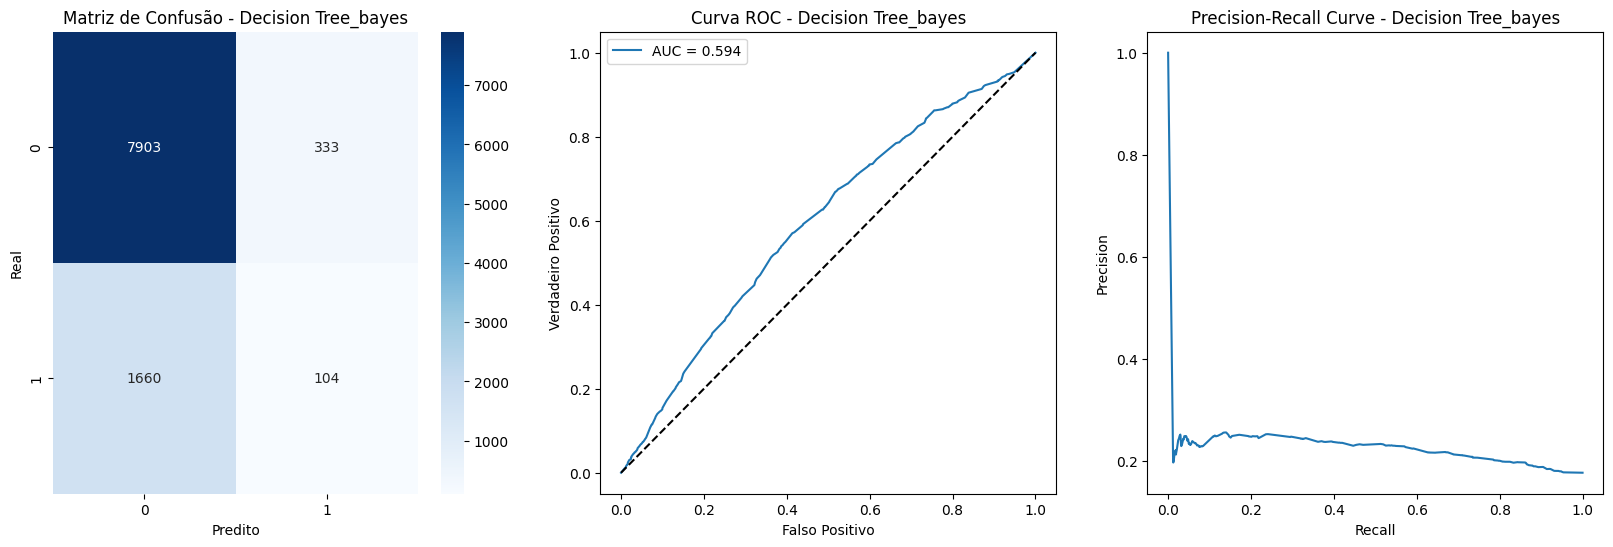

[I 2025-07-15 19:07:01,872] A new study created in memory with name: no-name-afac20dd-7cf4-49d4-b27c-acbe01d8fc51


Rodando Decision Tree - optuna


[I 2025-07-15 19:07:04,189] Trial 0 finished with value: 0.7932995034052435 and parameters: {'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.7932995034052435.
[I 2025-07-15 19:07:06,880] Trial 1 finished with value: 0.7926014395044092 and parameters: {'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.7932995034052435.
[I 2025-07-15 19:07:09,500] Trial 2 finished with value: 0.7966583335312799 and parameters: {'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.7966583335312799.
[I 2025-07-15 19:07:12,034] Trial 3 finished with value: 0.796509712391183 and parameters: {'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.7966583335312799.
[I 2025-07-15 19:07:15,263] Trial 4 finished with value: 0.7790871838677763 and parameters: {'max_depth': 19, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 2 wit


Decision Tree_optuna
              precision    recall  f1-score   support

         0.0      0.826     0.949     0.883      8236
         1.0      0.219     0.067     0.103      1764

    accuracy                          0.793     10000
   macro avg      0.523     0.508     0.493     10000
weighted avg      0.719     0.793     0.746     10000



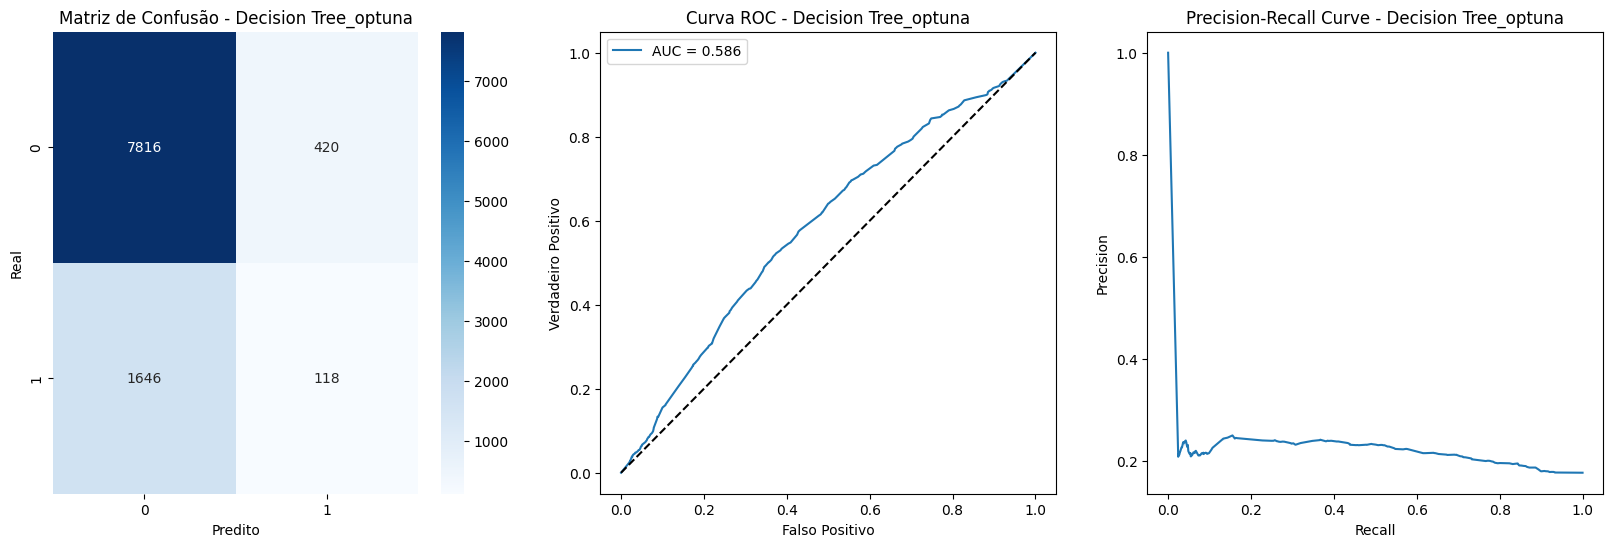

Rodando KNN - random

KNN_random
              precision    recall  f1-score   support

         0.0      0.829     0.831     0.830      8236
         1.0      0.204     0.202     0.203      1764

    accuracy                          0.720     10000
   macro avg      0.517     0.517     0.517     10000
weighted avg      0.719     0.720     0.720     10000



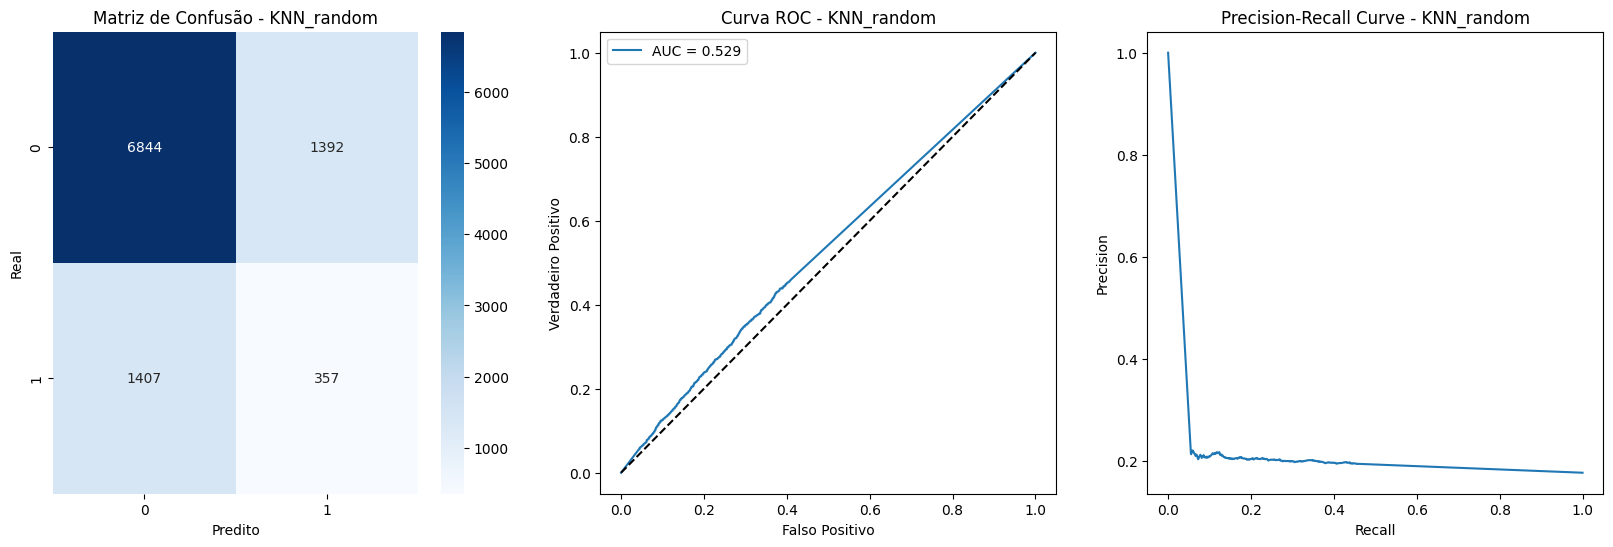

Rodando KNN - bayes

KNN_bayes
              precision    recall  f1-score   support

         0.0      0.829     0.906     0.866      8236
         1.0      0.226     0.128     0.163      1764

    accuracy                          0.769     10000
   macro avg      0.527     0.517     0.515     10000
weighted avg      0.723     0.769     0.742     10000



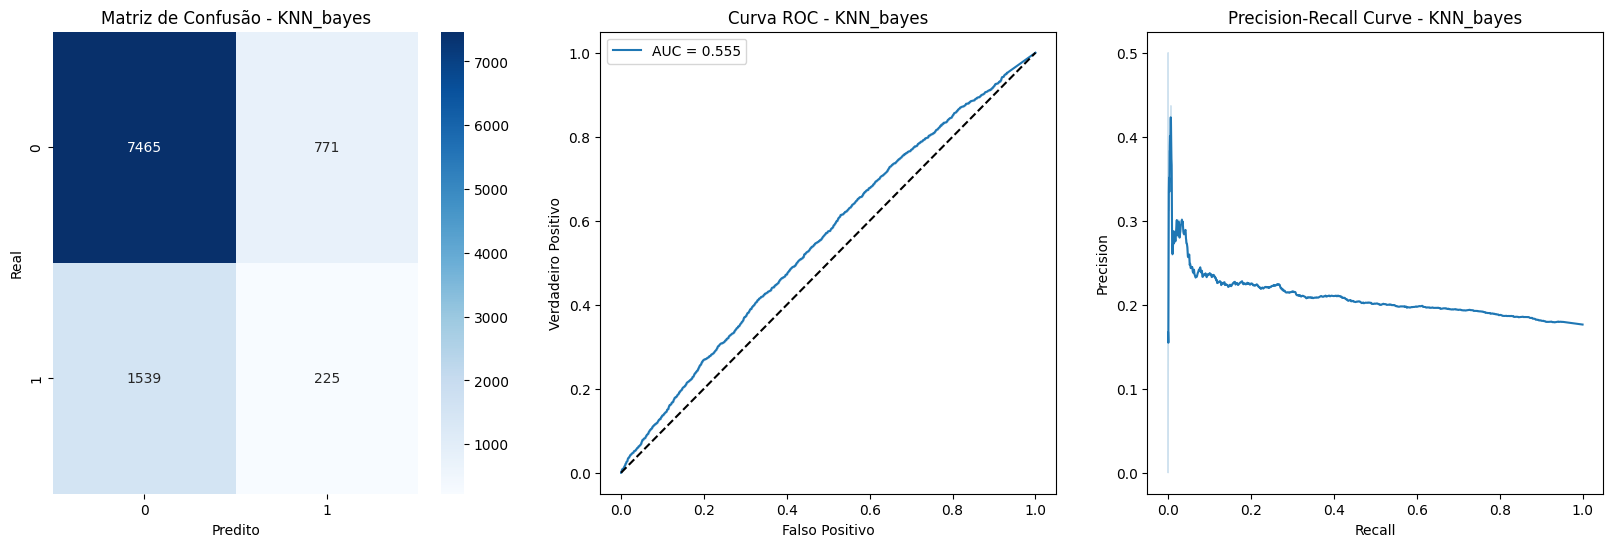

[I 2025-07-15 19:10:25,918] A new study created in memory with name: no-name-f5b1d5d7-b732-475e-a180-f54d0ad27466


Rodando KNN - optuna


[I 2025-07-15 19:10:39,437] Trial 0 finished with value: 0.8662019241843812 and parameters: {'n_neighbors': 5, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.8662019241843812.
[I 2025-07-15 19:10:53,886] Trial 1 finished with value: 0.7607306155264656 and parameters: {'n_neighbors': 19, 'weights': 'uniform', 'p': 1}. Best is trial 0 with value: 0.8662019241843812.
[I 2025-07-15 19:10:55,991] Trial 2 finished with value: 0.7475641649007377 and parameters: {'n_neighbors': 15, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 0.8662019241843812.
[I 2025-07-15 19:11:08,416] Trial 3 finished with value: 0.8864931146228572 and parameters: {'n_neighbors': 20, 'weights': 'distance', 'p': 1}. Best is trial 3 with value: 0.8864931146228572.
[I 2025-07-15 19:11:10,345] Trial 4 finished with value: 0.8187341119152851 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'p': 2}. Best is trial 3 with value: 0.8864931146228572.
[I 2025-07-15 19:11:12,300] Trial 5 finished 


KNN_optuna
              precision    recall  f1-score   support

         0.0      0.828     0.919     0.871      8236
         1.0      0.227     0.112     0.150      1764

    accuracy                          0.776     10000
   macro avg      0.528     0.515     0.510     10000
weighted avg      0.722     0.776     0.744     10000



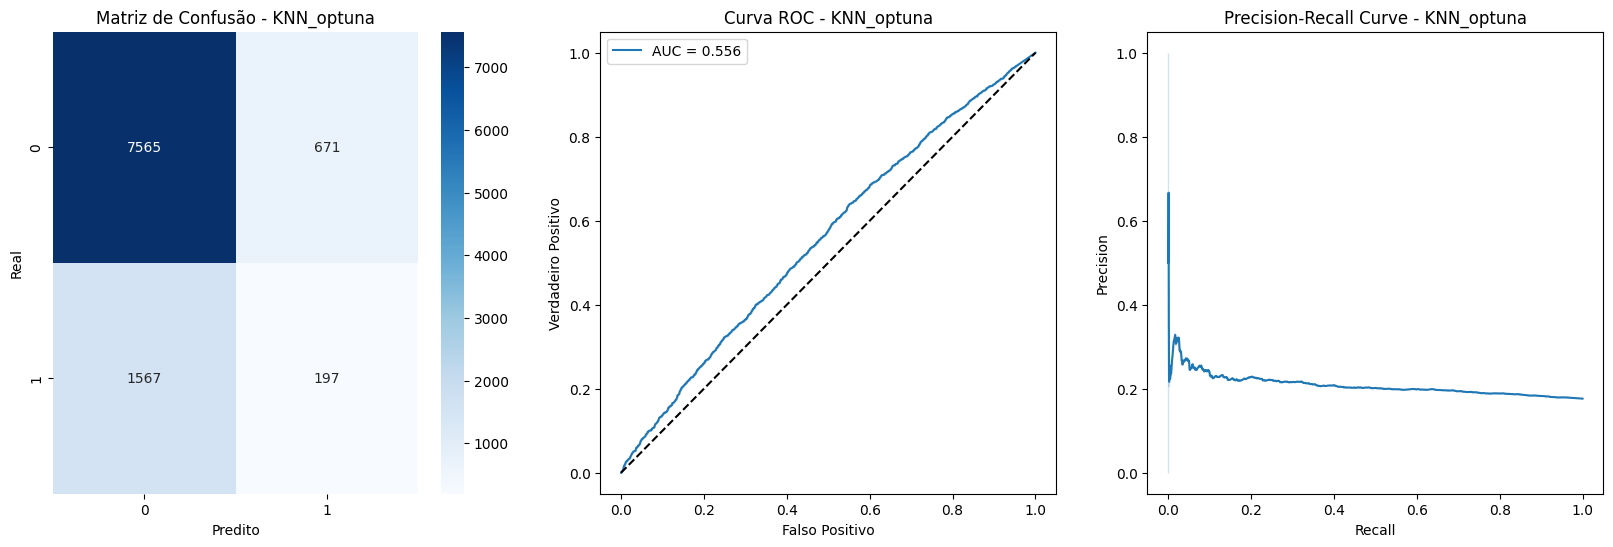

Rodando XGBoost - random


/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:12:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:12:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:12:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: User


XGBoost_random
              precision    recall  f1-score   support

         0.0      0.825     0.994     0.901      8236
         1.0      0.333     0.015     0.028      1764

    accuracy                          0.821     10000
   macro avg      0.579     0.504     0.465     10000
weighted avg      0.738     0.821     0.747     10000



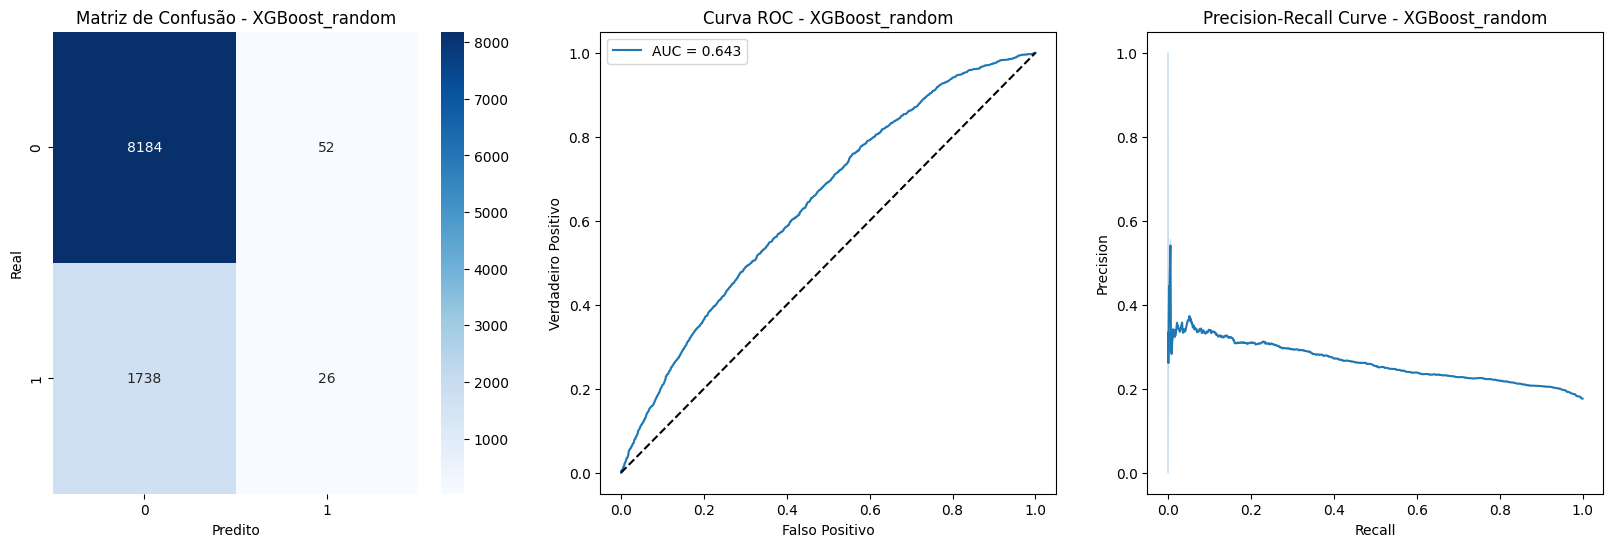

Rodando XGBoost - bayes


/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:12:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:12:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [19:12:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/hbarboza/Documents/projects/personal/scripts/venv/lib/python3.13/site-packages/xgboost/training.py:183: User


XGBoost_bayes
              precision    recall  f1-score   support

         0.0      0.824     1.000     0.903      8236
         1.0      0.333     0.001     0.002      1764

    accuracy                          0.823     10000
   macro avg      0.579     0.500     0.453     10000
weighted avg      0.737     0.823     0.744     10000



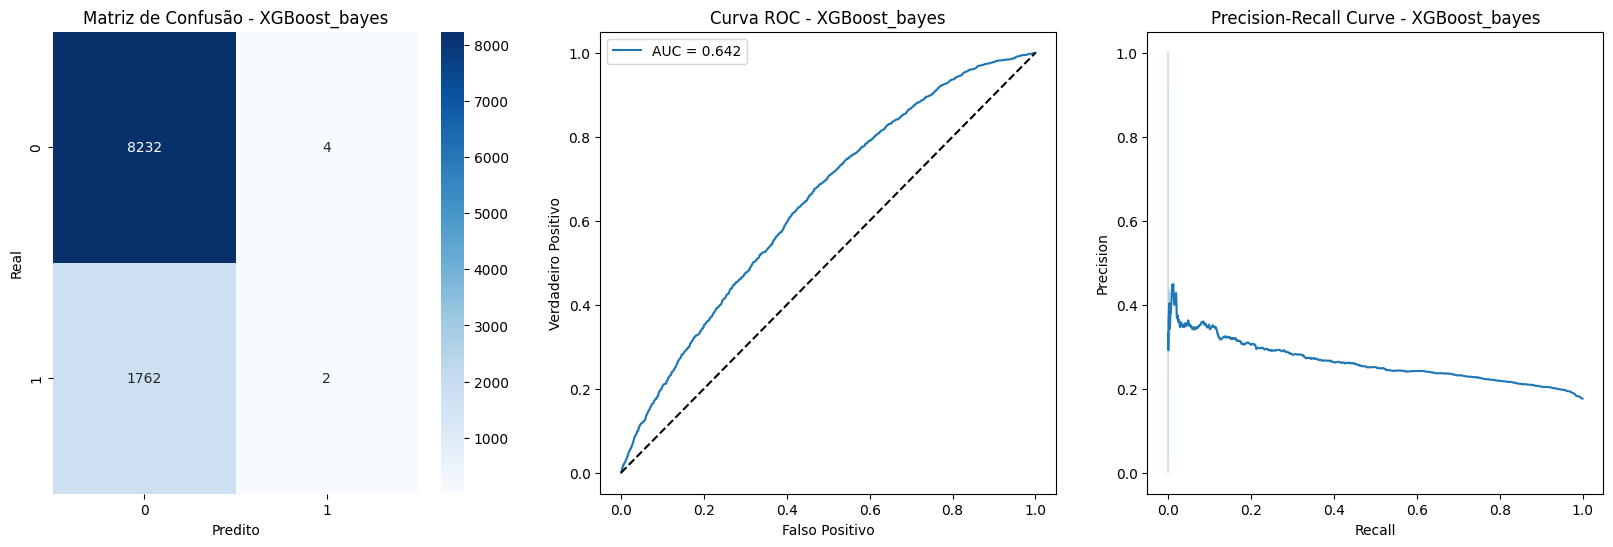

[I 2025-07-15 19:13:49,533] A new study created in memory with name: no-name-0ebefacf-bf2d-45c2-8cee-2c7a7eaf4b08


Rodando XGBoost - optuna


[I 2025-07-15 19:13:55,591] Trial 0 finished with value: 0.831287243301078 and parameters: {'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.010222807947820406, 'subsample': 0.8012301833143397}. Best is trial 0 with value: 0.831287243301078.
[I 2025-07-15 19:13:59,937] Trial 1 finished with value: 0.8337256009449354 and parameters: {'n_estimators': 294, 'max_depth': 6, 'learning_rate': 0.04122796506407054, 'subsample': 0.8064694990028212}. Best is trial 1 with value: 0.8337256009449354.
[I 2025-07-15 19:14:03,410] Trial 2 finished with value: 0.8322899824283851 and parameters: {'n_estimators': 174, 'max_depth': 7, 'learning_rate': 0.06930988589101589, 'subsample': 0.8649683404040456}. Best is trial 1 with value: 0.8337256009449354.
[I 2025-07-15 19:14:06,005] Trial 3 finished with value: 0.8294763204398677 and parameters: {'n_estimators': 168, 'max_depth': 5, 'learning_rate': 0.1770966074336916, 'subsample': 0.9935948521563562}. Best is trial 1 with value: 0.8337256009449354.
[


XGBoost_optuna
              precision    recall  f1-score   support

         0.0      0.824     1.000     0.903      8236
         1.0      1.000     0.002     0.003      1764

    accuracy                          0.824     10000
   macro avg      0.912     0.501     0.453     10000
weighted avg      0.855     0.824     0.745     10000



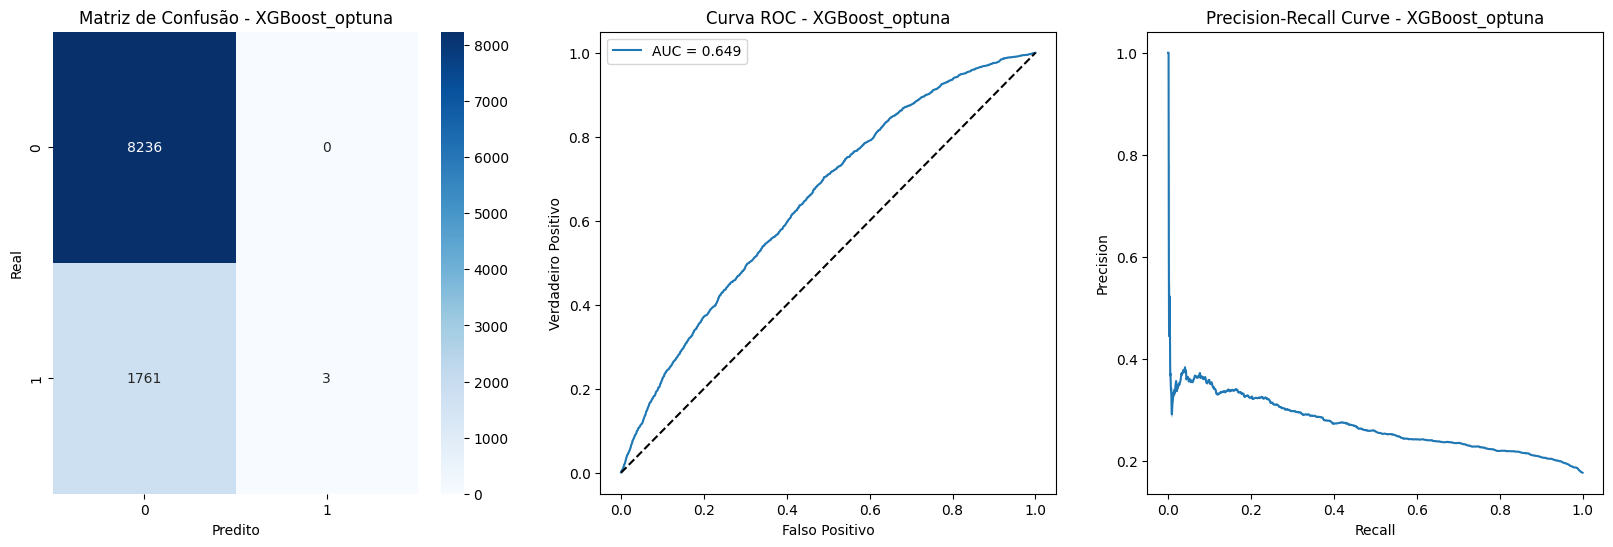

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  RandomizedSearchCV
from skopt import BayesSearchCV
import optuna
from sklearn.model_selection import cross_val_score

import xgboost as xgb

param_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
param_lr = {
    'C': (0.001, 10.0, 'log-uniform'),
    'solver': ['lbfgs', 'liblinear']
}
param_dt = {
    'max_depth': (3, 20),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 4)
}
param_knn = {
    'n_neighbors': (3, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
param_xgb = {
    'n_estimators': (100, 300),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3, 'log-uniform'),
    'subsample': (0.8, 1.0)
}

models = {
    'Random Forest': (RandomForestClassifier(random_state=42), param_rf),
    'Logistic Regression': (LogisticRegression(max_iter=1000, random_state=42), param_lr),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), param_dt),
    'KNN': (KNeighborsClassifier(), param_knn),
    'XGBoost': (xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_xgb),
}

resultados = []
for nome, (model, param_grid) in models.items():
    for search_type in [ 'random', 'bayes', 'optuna']:
        print(f'Rodando {nome} - {search_type}')
        best_model, best_params, best_score = tune_model(model, search_type, param_grid, X_train_minmax, y_train_over, n_iter=10)
        avaliar_modelo(best_model, X_train_minmax, X_test_minmax, y_train_over, y_test, nome=f'{nome}_{search_type}')
        y_pred = best_model.predict(X_test_minmax)
        acc = accuracy_score(y_test, y_pred)
        resultados.append({
            'modelo': nome,
            'search': search_type,
            'score_cv_f1': best_score,
            'score_acc': acc,
            'params': best_params
        })


In [119]:
resultados

[{'modelo': 'Random Forest',
  'search': 'grid',
  'score_cv_f1': np.float64(0.010938279647878515),
  'score_acc': 0.8215,
  'params': {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}},
 {'modelo': 'Random Forest',
  'search': 'random',
  'score_cv_f1': np.float64(0.008217067145638574),
  'score_acc': 0.82,
  'params': {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 20}},
 {'modelo': 'Random Forest',
  'search': 'bayes',
  'score_cv_f1': np.float64(0.0068619823221050215),
  'score_acc': 0.8205,
  'params': OrderedDict([('max_depth', 20),
               ('min_samples_split', 2),
               ('n_estimators', 160)])},
 {'modelo': 'Random Forest',
  'search': 'optuna',
  'score_cv_f1': np.float64(0.008217067145638574),
  'score_acc': 0.82,
  'params': {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 2}},
 {'modelo': 'Logistic Regression',
  'search': 'grid',
  'score_cv_f1': np.float64(0.037272291165914434),
  'score_acc': 0.8175,
  'params': {'C': 10

                 modelo  search  score_cv_f1  score_acc  \
0         Random Forest  random     0.840556     0.8236   
1         Random Forest   bayes     0.840454     0.8236   
2         Random Forest  optuna     0.840500     0.8236   
3   Logistic Regression  random     0.629335     0.5713   
4   Logistic Regression   bayes     0.629591     0.5787   
5   Logistic Regression  optuna     0.629522     0.5888   
6         Decision Tree  random     0.777088     0.7458   
7         Decision Tree   bayes     0.797077     0.8007   
8         Decision Tree  optuna     0.796658     0.7934   
9                   KNN  random     0.902833     0.7201   
10                  KNN   bayes     0.891116     0.7690   
11                  KNN  optuna     0.886493     0.7762   
12              XGBoost  random     0.832529     0.8210   
13              XGBoost   bayes     0.834426     0.8234   
14              XGBoost  optuna     0.836836     0.8239   

                                               params  

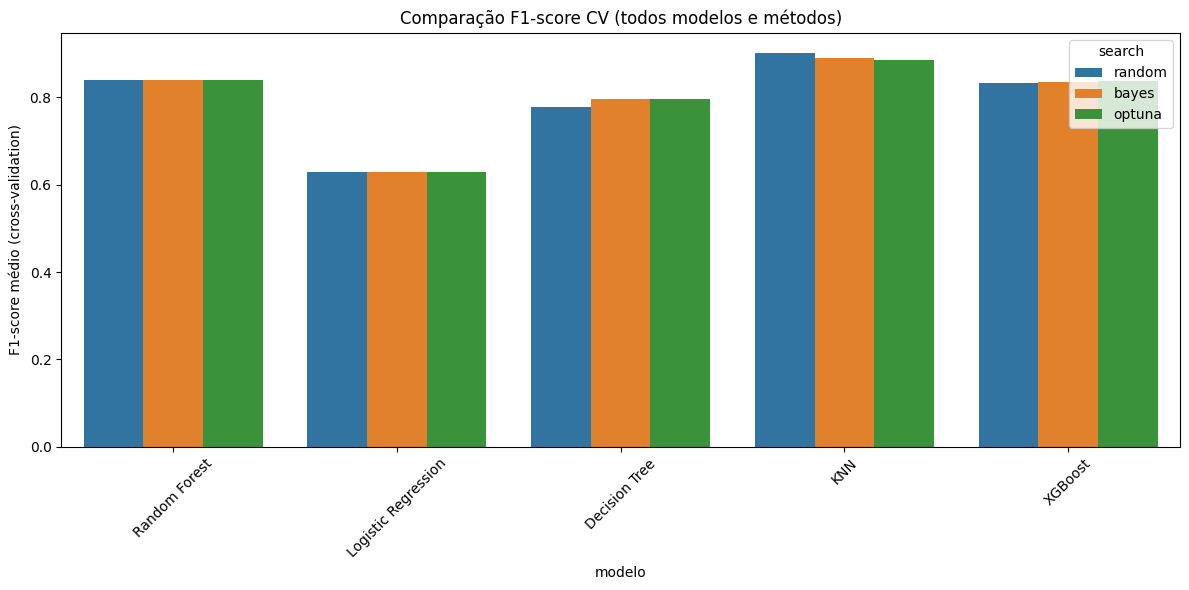

In [49]:
import pandas as pd
df_result = pd.DataFrame(resultados)
print(df_result)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=df_result, x='modelo', y='score_cv_f1', hue='search')
plt.title('Comparação F1-score CV (todos modelos e métodos)')
plt.ylabel('F1-score médio (cross-validation)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


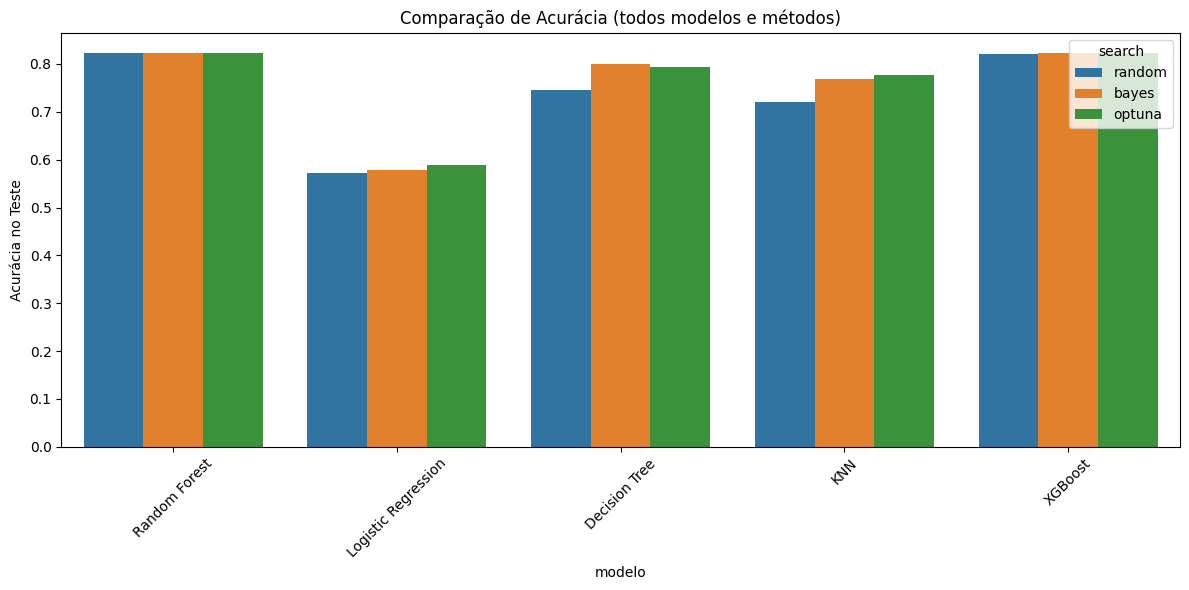

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_result, x='modelo', y='score_acc', hue='search')
plt.title('Comparação de Acurácia (todos modelos e métodos)')
plt.ylabel('Acurácia no Teste')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## HiperParametros e Tunnings
    Hiperparâmetros são atributos que controlam o treinamento do modelo de machine learning: com eles podemos tornar o modelo mais preparado para resolver um determinado problema da vida real. Fazendo a comparação com um carro, podemos associar os  parâmetros com o motor e a gasolina e os hiperparâmetros são como a direção, o sensor de velocidade e retrovisores. O carro funciona somente com motor e gasolina. Contudo, sem os outros equipamentos, podemos levar o veículo a um desastre porque não teríamos o controle dele.
[Fonte](https://blog.dsbrigade.com/hiperparametros-por-que-sao-importantes/)

### Random forest
    n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features

In [85]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

### XGBoost/LightGBM/CatBoost
    n_estimators, max_depth, learning_rate, subsample, colsample_bytree

### KNN
    n_neighbors, weights, p

### Decision Tree
    max_depth, min_samples_split, min_samples_leaf

### Logistic Regression
    C (regularização), penalty